#Imports, Cleaning, and Preprocessing

## Imports and Data Collection

In [1]:
#have the most important features = for all use adaboost feature importance since theoretically that works, for lda interpret top 3 , for tnse, interpret pca

#fundamentals
import torch
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr
import time

#scaling and normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle

#linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV


#linear model validation metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

#classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingClassifier

#classifaction model validaiton metrics

from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, precision_recall_curve, auc, accuracy_score

#neural networks
import torch.nn as nn

#dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE, MDS


#random_state

np.random.seed(19324476)
torch.manual_seed(19324476)


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
master_df = pd.read_csv("/content/drive/MyDrive/ML Capstone/musicData.csv")

In [4]:
master_df.shape

(50005, 18)

In [5]:
master_df

instance_id           artist_name                track_name  \
0          32894.0              Röyksopp      Röyksopp's Night Out   
1          46652.0  Thievery Corporation          The Shining Path   
2          30097.0        Dillon Francis                 Hurricane   
3          62177.0              Dubloadz                     Nitro   
4          24907.0           What So Not          Divide & Conquer   
...            ...                   ...                       ...   
50000      58878.0                 BEXEY                  GO GETTA   
50001      43557.0             Roy Woods       Drama (feat. Drake)   
50002      39767.0                Berner  Lovin' Me (feat. Smiggz)   
50003      57944.0             The-Dream         Shawty Is Da Shit   
50004      63470.0     Naughty By Nature            Hip Hop Hooray   

       popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652         -1.0   0.941   
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
50000        59.0       0.03340         0.913         -1.0   0.574   
50001        72.0       0.15700         0.709     251860.0   0.362   
50002        51.0       0.00597         0.693     189483.0   0.763   
50003        65.0       0.08310         0.782     262773.0   0.472   
50004        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness key  liveness  loudness   mode  speechiness  \
0               0.79200  A#     0.115    -5.201  Minor       0.0748   
1               0.95000   D     0.124    -7.043  Minor       0.0300   
2               0.01180  G#     0.534    -4.617  Major       0.0345   
3               0.00253  C#     0.157    -4.498  Major       0.2390   
4               0.90900  F#     0.157    -6.266  Major       0.0413   
...                 ...  ..       ...       ...    ...          ...   
50000           0.00000  C#     0.119    -7.022  Major       0.2980   
50001           0.00000   B     0.109    -9.814  Major       0.0550   
50002           0.00000   D     0.143    -5.443  Major       0.1460   
50003           0.00000   G     0.106    -5.016  Minor       0.0441   
50004           0.00000  F#     0.272   -13.652  Minor       0.1010   

                    tempo obtained_date  valence music_genre  
0                 100.889         4-Apr    0.759  Electronic  
1      115.00200000000001         4-Apr    0.531  Electronic  
2                 127.994         4-Apr    0.333  Electronic  
3                 128.014         4-Apr    0.270  Electronic  
4                 145.036         4-Apr    0.323  Electronic  
...                   ...           ...      ...         ...  
50000   98.02799999999999         4-Apr    0.330     Hip-Hop  
50001  122.04299999999999         4-Apr    0.113     Hip-Hop  
50002             131.079         4-Apr    0.395     Hip-Hop  
50003   75.88600000000001         4-Apr    0.354     Hip-Hop  
50004   99.20100000000001         4-Apr    0.765     Hip-Hop  

[50005 rows x 18 columns]

Master DF has been loaded.

## Handling NaN, Uniforming DTypes, Checking Outliers, Handling Duplicates, and Imputing Duration via Artists Average

In [6]:
nan_rows = master_df[master_df.isna().any(axis=1)]
nan_rows


#checking for na values
#as can be sen, these are of no value

instance_id artist_name track_name  popularity  acousticness  \
10000          NaN         NaN        NaN         NaN           NaN   
10001          NaN         NaN        NaN         NaN           NaN   
10002          NaN         NaN        NaN         NaN           NaN   
10003          NaN         NaN        NaN         NaN           NaN   
10004          NaN         NaN        NaN         NaN           NaN   

       danceability  duration_ms  energy  instrumentalness  key  liveness  \
10000           NaN          NaN     NaN               NaN  NaN       NaN   
10001           NaN          NaN     NaN               NaN  NaN       NaN   
10002           NaN          NaN     NaN               NaN  NaN       NaN   
10003           NaN          NaN     NaN               NaN  NaN       NaN   
10004           NaN          NaN     NaN               NaN  NaN       NaN   

       loudness mode  speechiness tempo obtained_date  valence music_genre  
10000       NaN  NaN          NaN   NaN           NaN      NaN         NaN  
10001       NaN  NaN          NaN   NaN           NaN      NaN         NaN  
10002       NaN  NaN          NaN   NaN           NaN      NaN         NaN  
10003       NaN  NaN          NaN   NaN           NaN      NaN         NaN  
10004       NaN  NaN          NaN   NaN           NaN      NaN         NaN

In [7]:
master_df.dropna(inplace = True)
master_df.shape

(50000, 18)

In [8]:
master_df.duplicated().sum()
#checking for duplicates, we good none found


0

In [9]:
#Imputing Negative Durations
master_df[master_df['duration_ms'] < 1]

instance_id           artist_name  \
0          32894.0              Röyksopp   
13         62039.0             DJ Shadow   
16         83926.0              San Holo   
24         40033.0           The Prodigy   
35         27048.0          Fabian Mazur   
...            ...                   ...   
49956      37037.0           empty_field   
49969      61010.0  Bone Thugs-N-Harmony   
49979      29598.0           Young Dolph   
49981      90232.0            Mac Miller   
50000      58878.0                 BEXEY   

                                              track_name  popularity  \
0                                   Röyksopp's Night Out        27.0   
13                                    Broken Levee Blues        31.0   
16                                             One Thing        59.0   
24                                          Diesel Power        56.0   
35                                        If U Wanted To        33.0   
...                                                  ...         ...   
49956  What You Like (feat. Ty Dolla $ign & Wiz Khalifa)        52.0   
49969                                       No Surrender        47.0   
49979                                  Thinking Out Loud        47.0   
49981                                Party On Fifth Ave.        60.0   
50000                                           GO GETTA        59.0   

       acousticness  danceability  duration_ms  energy  instrumentalness key  \
0           0.00468         0.652         -1.0   0.941          0.792000  A#   
13          0.86000         0.737         -1.0   0.405          0.036100   A   
16          0.13600         0.336         -1.0   0.746          0.000000  C#   
24          0.06800         0.725         -1.0   0.877          0.000036   C   
35          0.10800         0.493         -1.0   0.682          0.000000   A   
...             ...           ...          ...     ...               ...  ..   
49956       0.13300         0.867         -1.0   0.618          0.000002   B   
49969       0.01270         0.706         -1.0   0.787          0.000000   A   
49979       0.48300         0.789         -1.0   0.452          0.000000   B   
49981       0.06350         0.594         -1.0   0.823          0.000000   A   
50000       0.03340         0.913         -1.0   0.574          0.000000  C#   

       liveness  loudness   mode  speechiness              tempo  \
0        0.1150    -5.201  Minor       0.0748            100.889   
13       0.1730   -10.536  Minor       0.0424            154.745   
16       0.7370    -4.315  Minor       0.0685            151.756   
24       0.0900    -3.496  Major       0.0646            105.919   
35       0.1960    -5.781  Minor       0.2870                  ?   
...         ...       ...    ...          ...                ...   
49956    0.1280    -4.956  Minor       0.0614            140.005   
49969    0.2650    -5.314  Major       0.0888             85.963   
49979    0.0892    -7.538  Minor       0.4800            140.101   
49981    0.0950    -5.210  Major       0.3320             97.101   
50000    0.1190    -7.022  Major       0.2980  98.02799999999999   

      obtained_date  valence music_genre  
0             4-Apr   0.7590  Electronic  
13            4-Apr   0.6470  Electronic  
16            4-Apr   0.2100  Electronic  
24            4-Apr   0.0977  Electronic  
35            4-Apr   0.2390  Electronic  
...             ...      ...         ...  
49956         4-Apr   0.8570     Hip-Hop  
49969         4-Apr   0.2430     Hip-Hop  
49979         4-Apr   0.2840     Hip-Hop  
49981         4-Apr   0.6630     Hip-Hop  
50000         4-Apr   0.3300     Hip-Hop  

[4939 rows x 18 columns]

245503.54146601274
227360.0


<Axes: xlabel='duration_ms', ylabel='Count'>

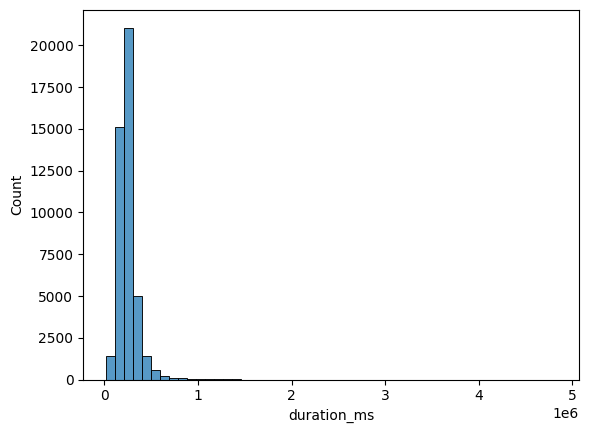

In [10]:
checking = master_df[master_df['duration_ms'] > 1]
print(checking['duration_ms'].mean())
print(checking['duration_ms'].median())
sns.histplot(checking['duration_ms'], bins = 50)

#we see major outliers

Mean duration: 245503.54146601274
Median duration: 227360.0


<Axes: xlabel='duration_ms', ylabel='Count'>

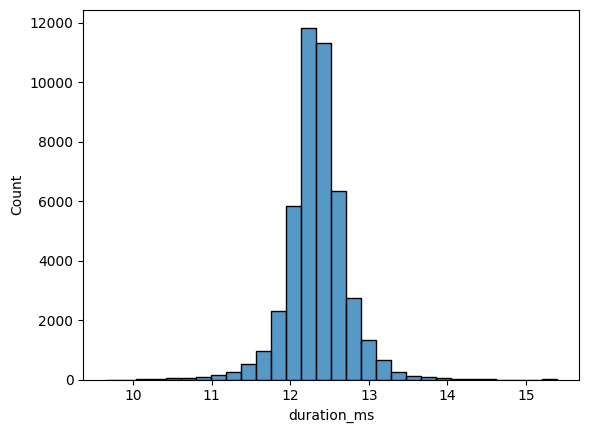

In [11]:
import numpy as np
import seaborn as sns

# Filter the DataFrame
checking = master_df[master_df['duration_ms'] > 1]

# Check for outliers and decide on handling them

# Calculate mean and median
print("Mean duration:", checking['duration_ms'].mean())
print("Median duration:", checking['duration_ms'].median())

# Plot histogram with log transformation and adjusted bins
sns.histplot(np.log(checking['duration_ms']), bins=30)  # Using log transformation for better visualization


In [12]:
checking_outliers = master_df[['duration_ms']].copy()
checking_outliers = checking_outliers.sort_values(by = ['duration_ms'], ascending = False)
print(pd.DataFrame(checking_outliers.head(100)))
master_df.iloc[2133]
#these seem to be real values, so i will not mess with them

       duration_ms
1410     4830606.0
2133     4497994.0
3759     4276000.0
43868    3195440.0
4593     2764934.0
...            ...
43993     988360.0
44175     978907.0
40218     973800.0
41321     968160.0
42419     967933.0

[100 rows x 1 columns]


instance_id                          31587.0
artist_name                           Bonobo
track_name          Late Night Tales: Bonobo
popularity                              37.0
acousticness                           0.528
danceability                           0.408
duration_ms                        4497994.0
energy                                 0.436
instrumentalness                      0.0995
key                                        E
liveness                               0.198
loudness                             -11.497
mode                                   Minor
speechiness                            0.164
tempo                                 76.868
obtained_date                          4-Apr
valence                               0.0778
music_genre                       Electronic
Name: 2133, dtype: object

In [13]:
median_durations = master_df[master_df['duration_ms'] >= 0].groupby('artist_name')['duration_ms'].median()
global_median_duration = master_df[master_df['duration_ms'] >= 0]['duration_ms'].median()



In [14]:
# Replace negative values with the artist-specific mean duration or fallback to global mean
def replace_negative(row):
    if row['duration_ms'] < 0:
        return median_durations.get(row['artist_name'], global_median_duration)  # Use get with fallback
    return row['duration_ms']

master_df['duration_ms'] = master_df.apply(replace_negative, axis=1)
master_df[master_df['duration_ms'] < 0]

Empty DataFrame
Columns: [instance_id, artist_name, track_name, popularity, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, obtained_date, valence, music_genre]
Index: []

In [15]:
#setting ? values for temp as NaN
master_df['tempo'] = master_df['tempo'].replace('?', np.nan)

In [16]:
#setting tempo as float
master_df.dtypes
master_df['tempo'] = master_df['tempo'].astype(float)

In [17]:
#getting a global list for float columns for ease
num_cols = [col for col in master_df.columns if master_df[col].dtype == float]
num_cols.remove('instance_id')
num_cols

['popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [18]:
master_df[['artist_name']].value_counts()

artist_name            
empty_field                2489
Nobuo Uematsu               429
Wolfgang Amadeus Mozart     402
Ludwig van Beethoven        317
Johann Sebastian Bach       314
                           ... 
Matanza                       1
Mathias Eick                  1
Matt Hammitt                  1
Matt Kennon                   1
Laura Misch                   1
Name: count, Length: 6863, dtype: int64

## Imputing Tempo via ML Models


In [19]:
#making a dupicate df for imputing and checking na values for tempo
imputer_df = master_df.copy()
nan_rows = imputer_df[imputer_df.isna().any(axis=1)]
nan_rows


#checking for na values

instance_id   artist_name               track_name  popularity  \
5          89064.0    Axel Boman                    Hello        47.0   
32         25836.0      PEEKABOO                  Arrival        45.0   
35         27048.0  Fabian Mazur           If U Wanted To        33.0   
36         55617.0    Wax Tailor       The Games You Play        45.0   
39         69685.0          Dahu                   Vessel        37.0   
...            ...           ...                      ...         ...   
49918      63058.0      Big Sean           Bigger Than Me        58.0   
49964      53387.0    Millonario          Rayas de Patrón        59.0   
49967      76585.0     MadeinTYO  I Want (feat. 2 Chainz)        62.0   
49976      79654.0      Big Sean   Sunday Morning Jetpack        52.0   
49977      63945.0     Nate Dogg               Music & Me        58.0   

       acousticness  danceability  duration_ms  energy  instrumentalness key  \
5           0.00523         0.755     519468.0   0.731          0.854000   D   
32          0.02330         0.729     274286.0   0.869          0.585000   F   
35          0.10800         0.493     185258.0   0.682          0.000000   A   
36          0.04780         0.646     253333.0   0.649          0.002520   G   
39          0.20300         0.769     429941.0   0.551          0.882000  A#   
...             ...           ...          ...     ...               ...  ..   
49918       0.29600         0.379     292520.0   0.644          0.000000  A#   
49964       0.08470         0.929     215200.0   0.737          0.000000  G#   
49967       0.17900         0.860     233293.0   0.625          0.000136   D   
49976       0.70000         0.462     225067.0   0.741          0.000000  A#   
49977       0.10500         0.905     240627.0   0.414          0.000366  G#   

       liveness  loudness   mode  speechiness  tempo obtained_date  valence  \
5        0.2160   -10.517  Minor       0.0412    NaN         4-Apr   0.6140   
32       0.0944    -7.569  Minor       0.1290    NaN         4-Apr   0.1380   
35       0.1960    -5.781  Minor       0.2870    NaN         4-Apr   0.2390   
36       0.3530    -5.259  Major       0.1170    NaN         4-Apr   0.7270   
39       0.1090   -12.520  Minor       0.0408    NaN         4-Apr   0.0618   
...         ...       ...    ...          ...    ...           ...      ...   
49918    0.3130    -7.933  Minor       0.1120    NaN         5-Apr   0.1440   
49964    0.8610    -6.424  Major       0.1020    NaN         4-Apr   0.8860   
49967    0.3000    -6.922  Major       0.1050    NaN         4-Apr   0.2210   
49976    0.3400    -8.008  Minor       0.1620    NaN         4-Apr   0.5890   
49977    0.0914    -8.112  Minor       0.0615    NaN         4-Apr   0.7580   

      music_genre  
5      Electronic  
32     Electronic  
35     Electronic  
36     Electronic  
39     Electronic  
...           ...  
49918     Hip-Hop  
49964     Hip-Hop  
49967     Hip-Hop  
49976     Hip-Hop  
49977     Hip-Hop  

[4980 rows x 18 columns]

In [20]:
#encoding data for impute
imputer_encoder = OrdinalEncoder()
imputer_df[['key', 'music_genre', 'mode']] = imputer_encoder.fit_transform(imputer_df[['key', 'music_genre', 'mode']])




In [21]:
#keeping only the relevant columns in the impute dataframe
imputer_relevant = list(imputer_df.columns)
bad_cols = ['instance_id', 'artist_name', 'track_name', 'obtained_date']
for item in bad_cols:
  imputer_relevant.remove(item)

In [22]:
imputer_df = imputer_df[imputer_relevant]
#imputer_df = imputer_df[['energy', 'loudness', 'acousticness', 'valence', 'tempo']]
imputer_df

popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652     319553.0   0.941   
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
50000        59.0       0.03340         0.913     139820.5   0.574   
50001        72.0       0.15700         0.709     251860.0   0.362   
50002        51.0       0.00597         0.693     189483.0   0.763   
50003        65.0       0.08310         0.782     262773.0   0.472   
50004        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness   key  liveness  loudness  mode  speechiness    tempo  \
0               0.79200   1.0     0.115    -5.201   1.0       0.0748  100.889   
1               0.95000   5.0     0.124    -7.043   1.0       0.0300  115.002   
2               0.01180  11.0     0.534    -4.617   0.0       0.0345  127.994   
3               0.00253   4.0     0.157    -4.498   0.0       0.2390  128.014   
4               0.90900   9.0     0.157    -6.266   0.0       0.0413  145.036   
...                 ...   ...       ...       ...   ...          ...      ...   
50000           0.00000   4.0     0.119    -7.022   0.0       0.2980   98.028   
50001           0.00000   2.0     0.109    -9.814   0.0       0.0550  122.043   
50002           0.00000   5.0     0.143    -5.443   0.0       0.1460  131.079   
50003           0.00000  10.0     0.106    -5.016   1.0       0.0441   75.886   
50004           0.00000   9.0     0.272   -13.652   1.0       0.1010   99.201   

       valence  music_genre  
0        0.759          5.0  
1        0.531          5.0  
2        0.333          5.0  
3        0.270          5.0  
4        0.323          5.0  
...        ...          ...  
50000    0.330          6.0  
50001    0.113          6.0  
50002    0.395          6.0  
50003    0.354          6.0  
50004    0.765          6.0  

[50000 rows x 14 columns]

In [23]:
#Standardizing the imputing df, except the targets.
#Keeping a copy of the target mean and std for de-normalization.
y_mean = np.mean(imputer_df['tempo'])
y_std = np.std(imputer_df['tempo'])
imputer_scaler = StandardScaler()
imputer_df[num_cols] = imputer_scaler.fit_transform(imputer_df[num_cols])
#imputer_df[imputer_df.columns] = imputer_scaler.fit_transform(imputer_df[imputer_df.columns])
imputer_df
print(y_mean)
print(y_std)


119.95296059529099
30.641360487829083


In [24]:
#seprating our predictors in a list
imputer_x = imputer_relevant.copy()
#imputer_x = list(imputer_df.columns)
imputer_x.remove('tempo')

In [25]:
imputer_test = imputer_df[imputer_df['tempo'].isnull()]
#test set is the set with missing values - reatinaing this set in a seperate vaariable
imputer_main = imputer_df.dropna()
#dropping the missing rows from the main imputer df, this will be our train and val set
imputer_x_train, imputer_x_val, imputer_y_train, imputer_y_val = train_test_split(imputer_main[imputer_x], imputer_main['tempo'], test_size = 0.2, random_state = 19324476)
#this is seperating the main, non_na imputer df in test and validation sets
print(imputer_test.shape)
print(imputer_x_train.shape)
print(imputer_x_val.shape)
print(imputer_y_train.shape)
print(imputer_y_val.shape)
#checking if everything is alright

(4980, 14)
(36016, 13)
(9004, 13)
(36016,)
(9004,)


In [26]:
#Fitting a LinReg
imputer = LinearRegression()
imputer.fit(imputer_x_train, imputer_y_train)
train_r2 = imputer.score(imputer_x_train, imputer_y_train)
imputer_pred = imputer.predict(imputer_x_val)
test_r2 = r2_score(imputer_y_val, imputer_pred)
test_rmse = mean_squared_error(imputer_y_val, imputer_pred)
print(f'Train R^2 is {train_r2} and Test R^2 is {test_r2} and Test MSE is {test_rmse}')

Train R^2 is 0.09221007217817812 and Test R^2 is 0.09218942963315657 and Test MSE is 0.9110155913923673


In [27]:
#Fitting a XGBoost Model
imputer_gradient_boost = GradientBoostingRegressor()
imputer_gradient_boost.fit(imputer_x_train, imputer_y_train)
train_r2 = imputer_gradient_boost.score(imputer_x_train, imputer_y_train)
imputer_pred = imputer_gradient_boost.predict(imputer_x_val)
test_r2 = r2_score(imputer_y_val, imputer_pred)
test_rmse = mean_squared_error(imputer_y_val, imputer_pred)
print(f'Train R^2 is {train_r2} and Test R^2 is {test_r2} and Test MSE is {test_rmse}')

Train R^2 is 0.17117051883502477 and Test R^2 is 0.14453317733724969 and Test MSE is 0.8584870443287795


In [28]:
#Fitting a RandomForest Model
imputer_random_forest = RandomForestRegressor(n_estimators= 50 )
imputer_random_forest.fit(imputer_x_train, imputer_y_train)
train_r2 = imputer_random_forest.score(imputer_x_train, imputer_y_train)
imputer_pred = imputer_random_forest.predict(imputer_x_val)
test_r2 = r2_score(imputer_y_val, imputer_pred)
test_rmse = mean_squared_error(imputer_y_val, imputer_pred)
print(f'Train R^2 is {train_r2} and Test R^2 is {test_r2} and Test MSE is {test_rmse}')

Train R^2 is 0.8860026476617197 and Test R^2 is 0.2101375903614029 and Test MSE is 0.7926510152274698


In [29]:
#Fitting an AdaBoost Regressor
imputer_random_forest = AdaBoostRegressor()
imputer_random_forest.fit(imputer_x_train, imputer_y_train)
train_r2 = imputer_random_forest.score(imputer_x_train, imputer_y_train)
imputer_pred = imputer_random_forest.predict(imputer_x_val)
test_r2 = r2_score(imputer_y_val, imputer_pred)
test_rmse = mean_squared_error(imputer_y_val, imputer_pred)
print(f'Train R^2 is {train_r2} and Test R^2 is {test_r2} and Test MSE is {test_rmse}')

Train R^2 is 0.09266561955998487 and Test R^2 is 0.08901910041418559 and Test MSE is 0.9141971134440021


In [30]:
#Fitting a Deep FC NN
#Converting arrays into Tensors
imputer_x_train = torch.tensor(np.array(imputer_x_train))
imputer_x_val = torch.tensor(np.array(imputer_x_val))
imputer_y_train = torch.tensor(np.array(imputer_y_train))
imputer_y_val = torch.tensor(np.array(imputer_y_val))
imputer_x_val

tensor([[-0.5933, -0.5343,  0.1554,  ..., -0.0847,  0.9701,  4.0000],
        [-1.3010, -0.7107, -0.6619,  ..., -0.2771, -0.3289,  1.0000],
        [ 2.2378, -0.2765,  1.7845,  ..., -0.2751, -0.7457,  6.0000],
        ...,
        [-2.0088, -0.8299, -0.3596,  ..., -0.6036, -0.9359,  1.0000],
        [-0.2072,  1.9647, -1.2106,  ..., -0.2465, -1.4546,  3.0000],
        [ 1.2083, -0.5519, -0.1637,  ...,  0.6058, -0.7457,  8.0000]],
       dtype=torch.float64)

In [31]:
class ImputerRegressor(nn.Module):
  def __init__(self, activation):
    super().__init__()
    self.fc1 = nn.Linear(13, 20, dtype = torch.double)
    self.fc2 = nn.Linear(20, 10, dtype = torch.double)
    self.fc3 = nn.Linear(10,7, dtype = torch.double)
    self.fc4 = nn.Linear(7,1, dtype = torch.double)

    if activation == 'relu':
      self.activation = nn.ReLU()
    elif activation =='sigmoid':
      self.activation = nn.Sigmoid()
    elif activation == 'softmax':
      self.activation = nn.Softmax(dim = 1)
    else:
      self.activation = None

  def forward(self, x):
      x = self.fc1(x)
      if self.activation != None:
        x = self.activation(x)
      x = self.fc2(x)
      if self.activation != None:
        x = self.activation(x)
      x = self.fc3(x)
      if self.activation != None:
        x = self.activation(x)
      x = self.fc4(x)

      return x

In [32]:
imputer_nn = ImputerRegressor('relu')
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params = imputer_nn.parameters(), lr = 0.01)

print(imputer_nn)

# AT NONE THIS MERGES WITH THE LINREG MODEL

ImputerRegressor(
  (fc1): Linear(in_features=13, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=7, bias=True)
  (fc4): Linear(in_features=7, out_features=1, bias=True)
  (activation): ReLU()
)


In [33]:
epochs = 100
train_losses = []
test_losses = []
train_r2s = []
test_r2s = []

epoch_list = list(range(0,100))


for epoch in range(epochs):
  imputer_nn.train()
  y_pred_train = imputer_nn(imputer_x_train)
  loss = criterion(y_pred_train.view(-1,1), imputer_y_train.view(-1,1))
  train_losses.append(loss.item())
  train_r2 = r2_score(imputer_y_train.detach().numpy(), y_pred_train.detach().numpy())
  train_r2s.append(train_r2.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    imputer_nn.eval()
    y_pred_test = imputer_nn(imputer_x_val)
    test_loss = criterion(y_pred_test.view(-1,1), imputer_y_val.view(-1,1))
    test_losses.append(test_loss.item())
    test_r2 = r2_score(imputer_y_val.detach().numpy(), y_pred_test.detach().numpy())
    test_r2s.append(test_r2.item())

    print(f'Epoch: {epoch} | Train Loss: {loss} | Test Loss : {test_loss} | Train R^2: {train_r2} | Test R^2 {test_r2}')


Epoch: 0 | Train Loss: 1.114317458345045 | Test Loss : 1.0351216685085936 | Train R^2: -0.11531483466298842 | Test R^2 -0.031480033016412
Epoch: 1 | Train Loss: 1.0280079832573048 | Test Loss : 1.0064500791116193 | Train R^2: -0.028928107777906442 | Test R^2 -0.0029093124165475714
Epoch: 2 | Train Loss: 1.001372884016638 | Test Loss : 0.9977525625340182 | Train R^2: -0.0022691686368507824 | Test R^2 0.0057576056468626735
Epoch: 3 | Train Loss: 0.9936769274978378 | Test Loss : 0.9921059291829074 | Train R^2: 0.00543367619256363 | Test R^2 0.011384373719283691
Epoch: 4 | Train Loss: 0.9884255784898257 | Test Loss : 0.9872011836149232 | Train R^2: 0.010689725451028198 | Test R^2 0.01627186402531766
Epoch: 5 | Train Loss: 0.98343144128005 | Test Loss : 0.981209295137006 | Train R^2: 0.0156883326923416 | Test R^2 0.022242672591172075
Epoch: 6 | Train Loss: 0.977357452082206 | Test Loss : 0.973536087547845 | Train R^2: 0.02176775844952139 | Test R^2 0.02988888526181699
Epoch: 7 | Train Loss:

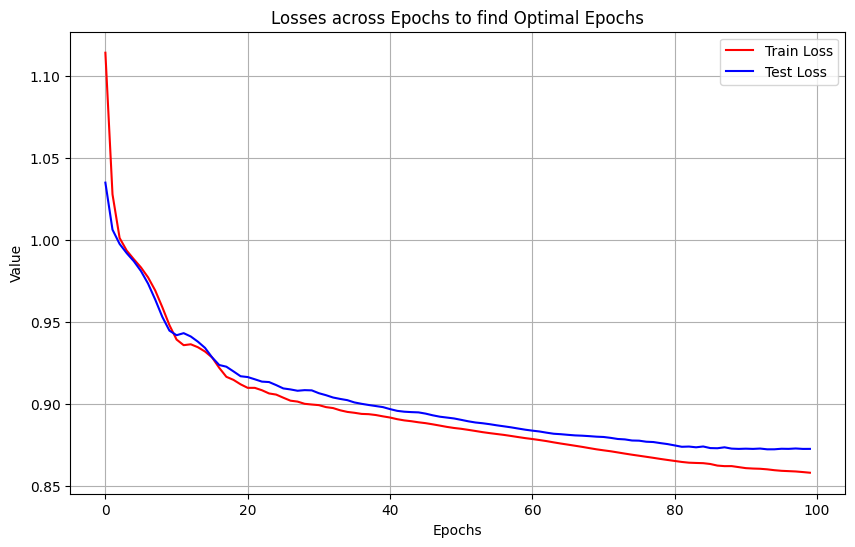

In [34]:

plt.figure(figsize=(10, 6))

# Plotting AUPRCs against epochs
plt.plot(epoch_list, train_losses, label='Train Loss', color ='red')

# Plotting losses against epochs
plt.plot(epoch_list, test_losses, label='Test Loss', color ='blue')


plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Losses across Epochs to find Optimal Epochs')
plt.legend()
plt.grid(True)
plt.show()



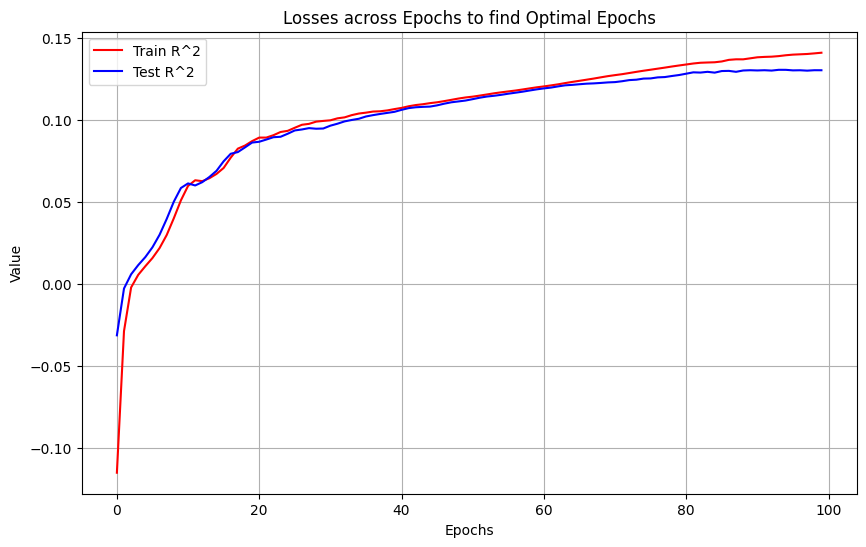

In [35]:

plt.figure(figsize=(10, 6))

# Plotting AUPRCs against epochs
plt.plot(epoch_list, train_r2s, label='Train R^2', color ='red')

# Plotting losses against epochs
plt.plot(epoch_list, test_r2s, label='Test R^2', color ='blue')


plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Losses across Epochs to find Optimal Epochs')
plt.legend()
plt.grid(True)
plt.show()

# WE FINALLY CHOOSE THE NN MODEL WITH 40 EPOCHS ARE THE TREES ARE OVRFITTING AND NN MODEL IS THE BEST WE CAN DO

In [36]:
#Retraining th final model for 40 Epochs
final_imputer = ImputerRegressor('relu')
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params = final_imputer.parameters(), lr = 0.01)

print(final_imputer)

# AT NONE THIS MERGES WITH THE LINREG MODEL

ImputerRegressor(
  (fc1): Linear(in_features=13, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=7, bias=True)
  (fc4): Linear(in_features=7, out_features=1, bias=True)
  (activation): ReLU()
)


In [37]:
epochs = 40
train_losses = []
test_losses = []
train_r2s = []
test_r2s = []

epoch_list = list(range(0,40))


for epoch in range(epochs):
  final_imputer.train()
  y_pred_train = final_imputer(imputer_x_train)
  loss = criterion(y_pred_train.view(-1,1), imputer_y_train.view(-1,1))
  train_losses.append(loss.item())
  train_r2 = r2_score(imputer_y_train.detach().numpy(), y_pred_train.detach().numpy())
  train_r2s.append(train_r2.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    final_imputer.eval()
    y_pred_test = final_imputer(imputer_x_val)
    test_loss = criterion(y_pred_test.view(-1,1), imputer_y_val.view(-1,1))
    test_losses.append(test_loss.item())
    test_r2 = r2_score(imputer_y_val.detach().numpy(), y_pred_test.detach().numpy())
    test_r2s.append(test_r2.item())

    print(f'Epoch: {epoch} | Train Loss: {loss} | Test Loss : {test_loss} | Train R^2: {train_r2} | Test R^2 {test_r2}')


Epoch: 0 | Train Loss: 1.016401374812888 | Test Loss : 1.0038587127771867 | Train R^2: -0.01731111077113945 | Test R^2 -0.0003270627028022499
Epoch: 1 | Train Loss: 0.9997202608956542 | Test Loss : 1.0036170322591869 | Train R^2: -0.0006150663259369971 | Test R^2 -8.623243495065047e-05
Epoch: 2 | Train Loss: 0.998088998834313 | Test Loss : 1.002208220314535 | Train R^2: 0.001017655805993889 | Test R^2 0.001317623203852758
Epoch: 3 | Train Loss: 0.9962634366492623 | Test Loss : 0.9977020751677438 | Train R^2: 0.0028448519710893017 | Test R^2 0.005807915394804408
Epoch: 4 | Train Loss: 0.9918446385138256 | Test Loss : 0.9915584502845779 | Train R^2: 0.007267605177480596 | Test R^2 0.011929926545878766
Epoch: 5 | Train Loss: 0.9861473261967161 | Test Loss : 0.9849419938422637 | Train R^2: 0.01297001690709465 | Test R^2 0.01852310579929284
Epoch: 6 | Train Loss: 0.9802221980366937 | Test Loss : 0.9783082014090859 | Train R^2: 0.018900448387516033 | Test R^2 0.02513356005425671
Epoch: 7 | T

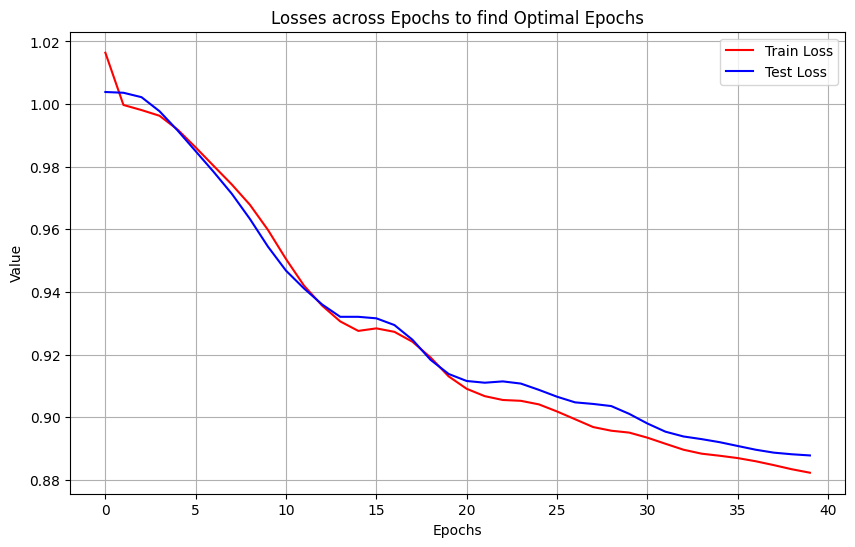

In [38]:
plt.figure(figsize=(10, 6))

# Plotting AUPRCs against epochs
plt.plot(epoch_list, train_losses, label='Train Loss', color ='red')

# Plotting losses against epochs
plt.plot(epoch_list, test_losses, label='Test Loss', color ='blue')


plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Losses across Epochs to find Optimal Epochs')
plt.legend()
plt.grid(True)
plt.show()



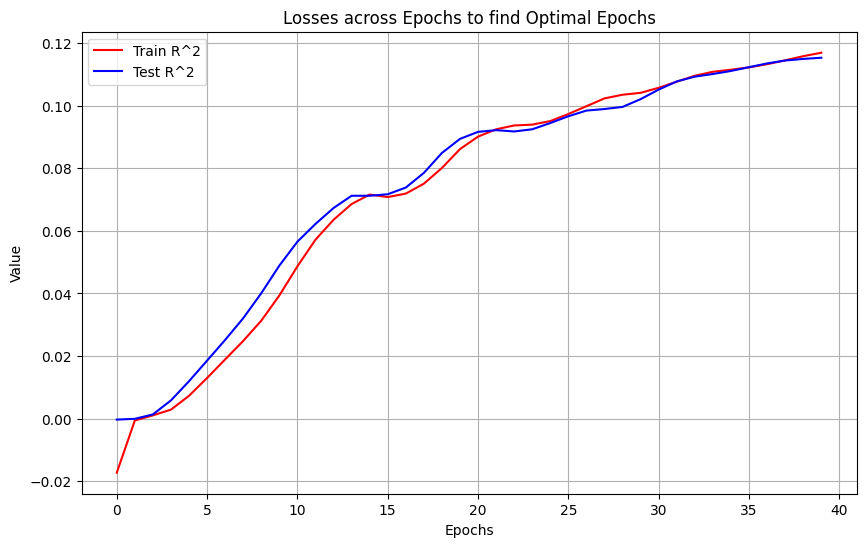

In [39]:

plt.figure(figsize=(10, 6))

# Plotting AUPRCs against epochs
plt.plot(epoch_list, train_r2s, label='Train R^2', color ='red')

# Plotting losses against epochs
plt.plot(epoch_list, test_r2s, label='Test R^2', color ='blue')


plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Losses across Epochs to find Optimal Epochs')
plt.legend()
plt.grid(True)
plt.show()

# WE FINALLY CHOOSE THE NN MODEL WITH 40 EPOCHS ARE THE TREES ARE OVRFITTING AND NN MODEL IS THE BEST WE CAN DO

In [40]:
#getting the inputs from the held out na set ready to be passed through the model
input_x = imputer_test[imputer_x]
input_x
input_x = torch.tensor(input_x.values)


In [41]:
#making sure that the original na tempo values in the main_df and the test hold out are in the same order
check_df_1 = master_df[master_df['tempo'].isna()]
check_df_2 = imputer_test
check1 = list(check_df_2.iloc[0])
check2 = [item for item in check1 if not np.isnan(item) ]
print(check1)
print(check2)

[0.17884482615980707, -0.882274922865571, 1.1014884334744957, 2.5551189545209425, 0.49609498305867117, 2.0663407896747286, 5.0, 0.13674944661890112, -0.22444508498691088, 1.0, -0.5167737406098003, nan, 0.6383048654957955, 5.0]
[0.17884482615980707, -0.882274922865571, 1.1014884334744957, 2.5551189545209425, 0.49609498305867117, 2.0663407896747286, 5.0, 0.13674944661890112, -0.22444508498691088, 1.0, -0.5167737406098003, 0.6383048654957955, 5.0]


In [42]:
#predicting one value to see if the addition corresponds to the addition in the main df later
final_imputer.eval()
with torch.no_grad():
  pred = final_imputer(torch.tensor(check2, dtype = torch.double))

print(pred.item()* y_std + y_mean)

114.28280749231182


In [43]:
#imputing using the set set for predictions and imputing them into the main df
mask = master_df['tempo'].isna()



# Predict
with torch.no_grad():
    predictions = final_imputer(input_x).numpy()

# De-normalizing and then replaceing missing values
predictions = predictions*y_std + y_mean
master_df.loc[mask, 'tempo'] = predictions.flatten()
print(predictions)



[[114.28280749]
 [117.15867077]
 [131.50900242]
 ...
 [116.60299703]
 [120.97790602]
 [111.64959036]]


In [44]:
master_df.iloc[5][-4]
#the right value is where it should be

114.28280749231182

In [45]:
# all na values are imputed now
master_df.isna().sum()


instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

## Ordinal Encoding for the Main DataFrame

In [46]:
#getting variable lists for encoding
keys = [key for key in master_df['key'].unique()]
genres = [genre for genre in master_df['music_genre'].unique()]
mode = ['Major', 'Minor']

In [47]:
master_df_encoded = master_df.copy()
#copy df to not mess up the main one

In [48]:
encoder = OrdinalEncoder(categories = [mode, keys, genres])
master_df_encoded[['mode', 'key', 'music_genre']] = encoder.fit_transform(master_df[['mode', 'key', 'music_genre']])


In [49]:
encoder.categories_

[array(['Major', 'Minor'], dtype=object),
 array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#'],
       dtype=object),
 array(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap',
        'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)]

##Standardization Pre-Split - Just to Compare

In [50]:
#LET'S NOT CALE HERE
#standardizing all discrete columns
#scaler = StandardScaler()
#master_df_scaled[num_cols] = scaler.fit_transform(master_df[num_cols])

#MIGHT HAVE TO CHECK FOR LEAKAGE HERE

In [51]:
master_df_encoded
# we have the final cleaned (duplicates and NaN), ordinally encoded, and standardized dataset - DID NOT STANDARDIZE ORDINALLY ENCODED VARIABLES
# AS THEY WILL LOSE MEANING

instance_id           artist_name                track_name  \
0          32894.0              Röyksopp      Röyksopp's Night Out   
1          46652.0  Thievery Corporation          The Shining Path   
2          30097.0        Dillon Francis                 Hurricane   
3          62177.0              Dubloadz                     Nitro   
4          24907.0           What So Not          Divide & Conquer   
...            ...                   ...                       ...   
50000      58878.0                 BEXEY                  GO GETTA   
50001      43557.0             Roy Woods       Drama (feat. Drake)   
50002      39767.0                Berner  Lovin' Me (feat. Smiggz)   
50003      57944.0             The-Dream         Shawty Is Da Shit   
50004      63470.0     Naughty By Nature            Hip Hop Hooray   

       popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652     319553.0   0.941   
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
50000        59.0       0.03340         0.913     139820.5   0.574   
50001        72.0       0.15700         0.709     251860.0   0.362   
50002        51.0       0.00597         0.693     189483.0   0.763   
50003        65.0       0.08310         0.782     262773.0   0.472   
50004        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0               0.79200  0.0     0.115    -5.201   1.0       0.0748  100.889   
1               0.95000  1.0     0.124    -7.043   1.0       0.0300  115.002   
2               0.01180  2.0     0.534    -4.617   0.0       0.0345  127.994   
3               0.00253  3.0     0.157    -4.498   0.0       0.2390  128.014   
4               0.90900  4.0     0.157    -6.266   0.0       0.0413  145.036   
...                 ...  ...       ...       ...   ...          ...      ...   
50000           0.00000  3.0     0.119    -7.022   0.0       0.2980   98.028   
50001           0.00000  5.0     0.109    -9.814   0.0       0.0550  122.043   
50002           0.00000  1.0     0.143    -5.443   0.0       0.1460  131.079   
50003           0.00000  6.0     0.106    -5.016   1.0       0.0441   75.886   
50004           0.00000  4.0     0.272   -13.652   1.0       0.1010   99.201   

      obtained_date  valence  music_genre  
0             4-Apr    0.759          0.0  
1             4-Apr    0.531          0.0  
2             4-Apr    0.333          0.0  
3             4-Apr    0.270          0.0  
4             4-Apr    0.323          0.0  
...             ...      ...          ...  
50000         4-Apr    0.330          9.0  
50001         4-Apr    0.113          9.0  
50002         4-Apr    0.395          9.0  
50003         4-Apr    0.354          9.0  
50004         4-Apr    0.765          9.0  

[50000 rows x 18 columns]

## Splitting the Data into Train and Test Datasets Based on SpecSheet

In [52]:
#for all algorithms to classify genre, we will use only the relevant features
relevant_features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']

In [53]:
shuffled_train = master_df_encoded.copy()
#making a copy so that we dont mess the main scaled_df
#shuffling the df so that there are no sequential relationships
shuffled_train = shuffled_train.sample(frac = 1, random_state = 19324476)
print(shuffled_train['music_genre'].value_counts())

music_genre
6.0    5000
5.0    5000
4.0    5000
7.0    5000
0.0    5000
8.0    5000
2.0    5000
9.0    5000
1.0    5000
3.0    5000
Name: count, dtype: int64


In [54]:
#splitting the data per the spec sheet
data = []
max_rows_per_genre = 500
shuffled_train_copy = shuffled_train.copy()  # Create a copy to avoid modifying the original DataFrame, will iteratively drop rows to make this a limited train set

for genre in shuffled_train['music_genre'].unique():
    counter = 0
    for index, row in shuffled_train_copy.iterrows():
        if counter >= max_rows_per_genre:
            break  # Exit loop if 500 rows for this genre have been collected
        if row['music_genre'] == genre:
            data.append(row)
            counter += 1
            shuffled_train_copy.drop(index, inplace=True)  # Drop the row from the copy


In [55]:
train_set = pd.DataFrame(shuffled_train_copy, columns = master_df.columns)
test_set = pd.DataFrame(data, columns = master_df.columns)

#since we iteratively added and removed rows, shuffling again to remove sequential dependencies
train_set = train_set.sample(frac = 1, random_state = 19324476)
test_set = test_set.sample(frac = 1, random_state = 19324476)
#getting x_train, x_test, y_train, y_test ready
x_train = train_set[relevant_features]
x_test = test_set[relevant_features]
y_train = train_set['music_genre']
y_test = test_set['music_genre']

#getting nlp features ready
words_train = train_set[['artist_name', 'track_name']].copy()
words_test = test_set[['artist_name', 'track_name']].copy()






In [56]:
print(master_df['artist_name'].nunique())

6863


## Standardization - Post Split

In [57]:
scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])
x_train
x_test

<ipython-input-57-938cadea8e00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
<ipython-input-57-938cadea8e00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[num_cols] = scaler.transform(x_test[num_cols])


popularity  acousticness  danceability  duration_ms    energy  \
8741     1.015022     -0.851773      0.760522    -0.175101  0.734682   
37086    0.628877     -0.767916     -0.724234    -0.182169  0.908825   
44752   -1.044417      2.015779     -2.169771    -0.878234 -2.231421   
29101    0.757592     -0.856758      0.721302    -0.017294  1.022396   
6425    -2.009780      1.971798     -0.449695    -0.201015 -1.593529   
...           ...           ...           ...          ...       ...   
27440    1.208094      1.329678     -0.388063     0.266400 -0.117102   
37604    1.336809     -0.895529     -1.032391    -0.156587  1.400967   
22810   -0.529558      0.939714      0.161016    -0.308188 -0.556245   
5814    -1.301847     -0.894655     -0.976363     0.143541  1.329038   
21284    0.114017      1.329678     -0.785866     0.746133 -1.055958   

       instrumentalness  key  liveness  loudness  mode  speechiness     tempo  \
8741          -0.557436  9.0 -0.495441  0.726429   1.0    -0.010798  0.274832   
37086         -0.557436  1.0 -0.597160  0.425316   0.0    -0.377536  0.491277   
44752          2.340726  9.0 -0.686474 -2.884651   1.0    -0.468479 -1.950618   
29101         -0.557436  4.0 -0.445822  0.593106   0.0     0.766171 -0.922486   
6425           2.263892  3.0 -0.804939 -1.776126   0.0    -0.361720 -0.636911   
...                 ...  ...       ...       ...   ...          ...       ...   
27440         -0.557430  3.0 -0.092286 -0.190893   0.0     2.100661  2.239037   
37604         -0.557436  5.0  0.794654  0.785773   1.0    -0.235190 -0.764372   
22810         -0.557436  4.0  4.516082  0.052014   0.0    -0.508019 -0.271247   
5814          -0.557429  5.0 -0.723068  0.820730   0.0    -0.089879  1.945226   
21284         -0.557436  6.0 -0.526453  0.150867   0.0    -0.492203  1.051458   

        valence  
8741   0.403548  
37086 -0.511508  
44752 -1.559368  
29101  0.699119  
6425  -1.236265  
...         ...  
27440  0.516918  
37604  0.990641  
22810  0.670777  
5814   0.164662  
21284 -0.491263  

[5000 rows x 13 columns]

In [58]:
#finding common artists between train and test sets
train_artists = set(train_set['artist_name'])
test_artists = set(test_set['artist_name'])


common_artists = train_artists.intersection(test_artists)

# Print the number of common artists
print(f"Number of common artists: {len(common_artists)}")


train_set.shape
test_set.shape

master_df['artist_name'].nunique()
master_df['artist_name'].value_counts()

#there is an overlap of 2100 artists, but since there are only about 6000 artists in the dataframe this is inevitable

Number of common artists: 2100


artist_name
empty_field                2489
Nobuo Uematsu               429
Wolfgang Amadeus Mozart     402
Ludwig van Beethoven        317
Johann Sebastian Bach       314
                           ... 
Ward Davis                    1
A.A. Bondy                    1
Iris DeMent                   1
Mac Davis                     1
Millonario                    1
Name: count, Length: 6863, dtype: int64

In [59]:
#checking to see if everything is okay
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
y_test

(45000, 13)
(45000,)
(5000, 13)
(5000,)


8741     1.0
37086    7.0
44752    8.0
29101    5.0
6425     1.0
        ... 
27440    5.0
37604    7.0
22810    4.0
5814     1.0
21284    4.0
Name: music_genre, Length: 5000, dtype: float64

In [60]:
print(y_test.value_counts())

music_genre
1.0    500
7.0    500
8.0    500
5.0    500
2.0    500
6.0    500
9.0    500
4.0    500
3.0    500
0.0    500
Name: count, dtype: int64


In [61]:
#WE HAVE OUR FINAL TRAIN AND TEST SETS READY


# Exploratory Data Analysis

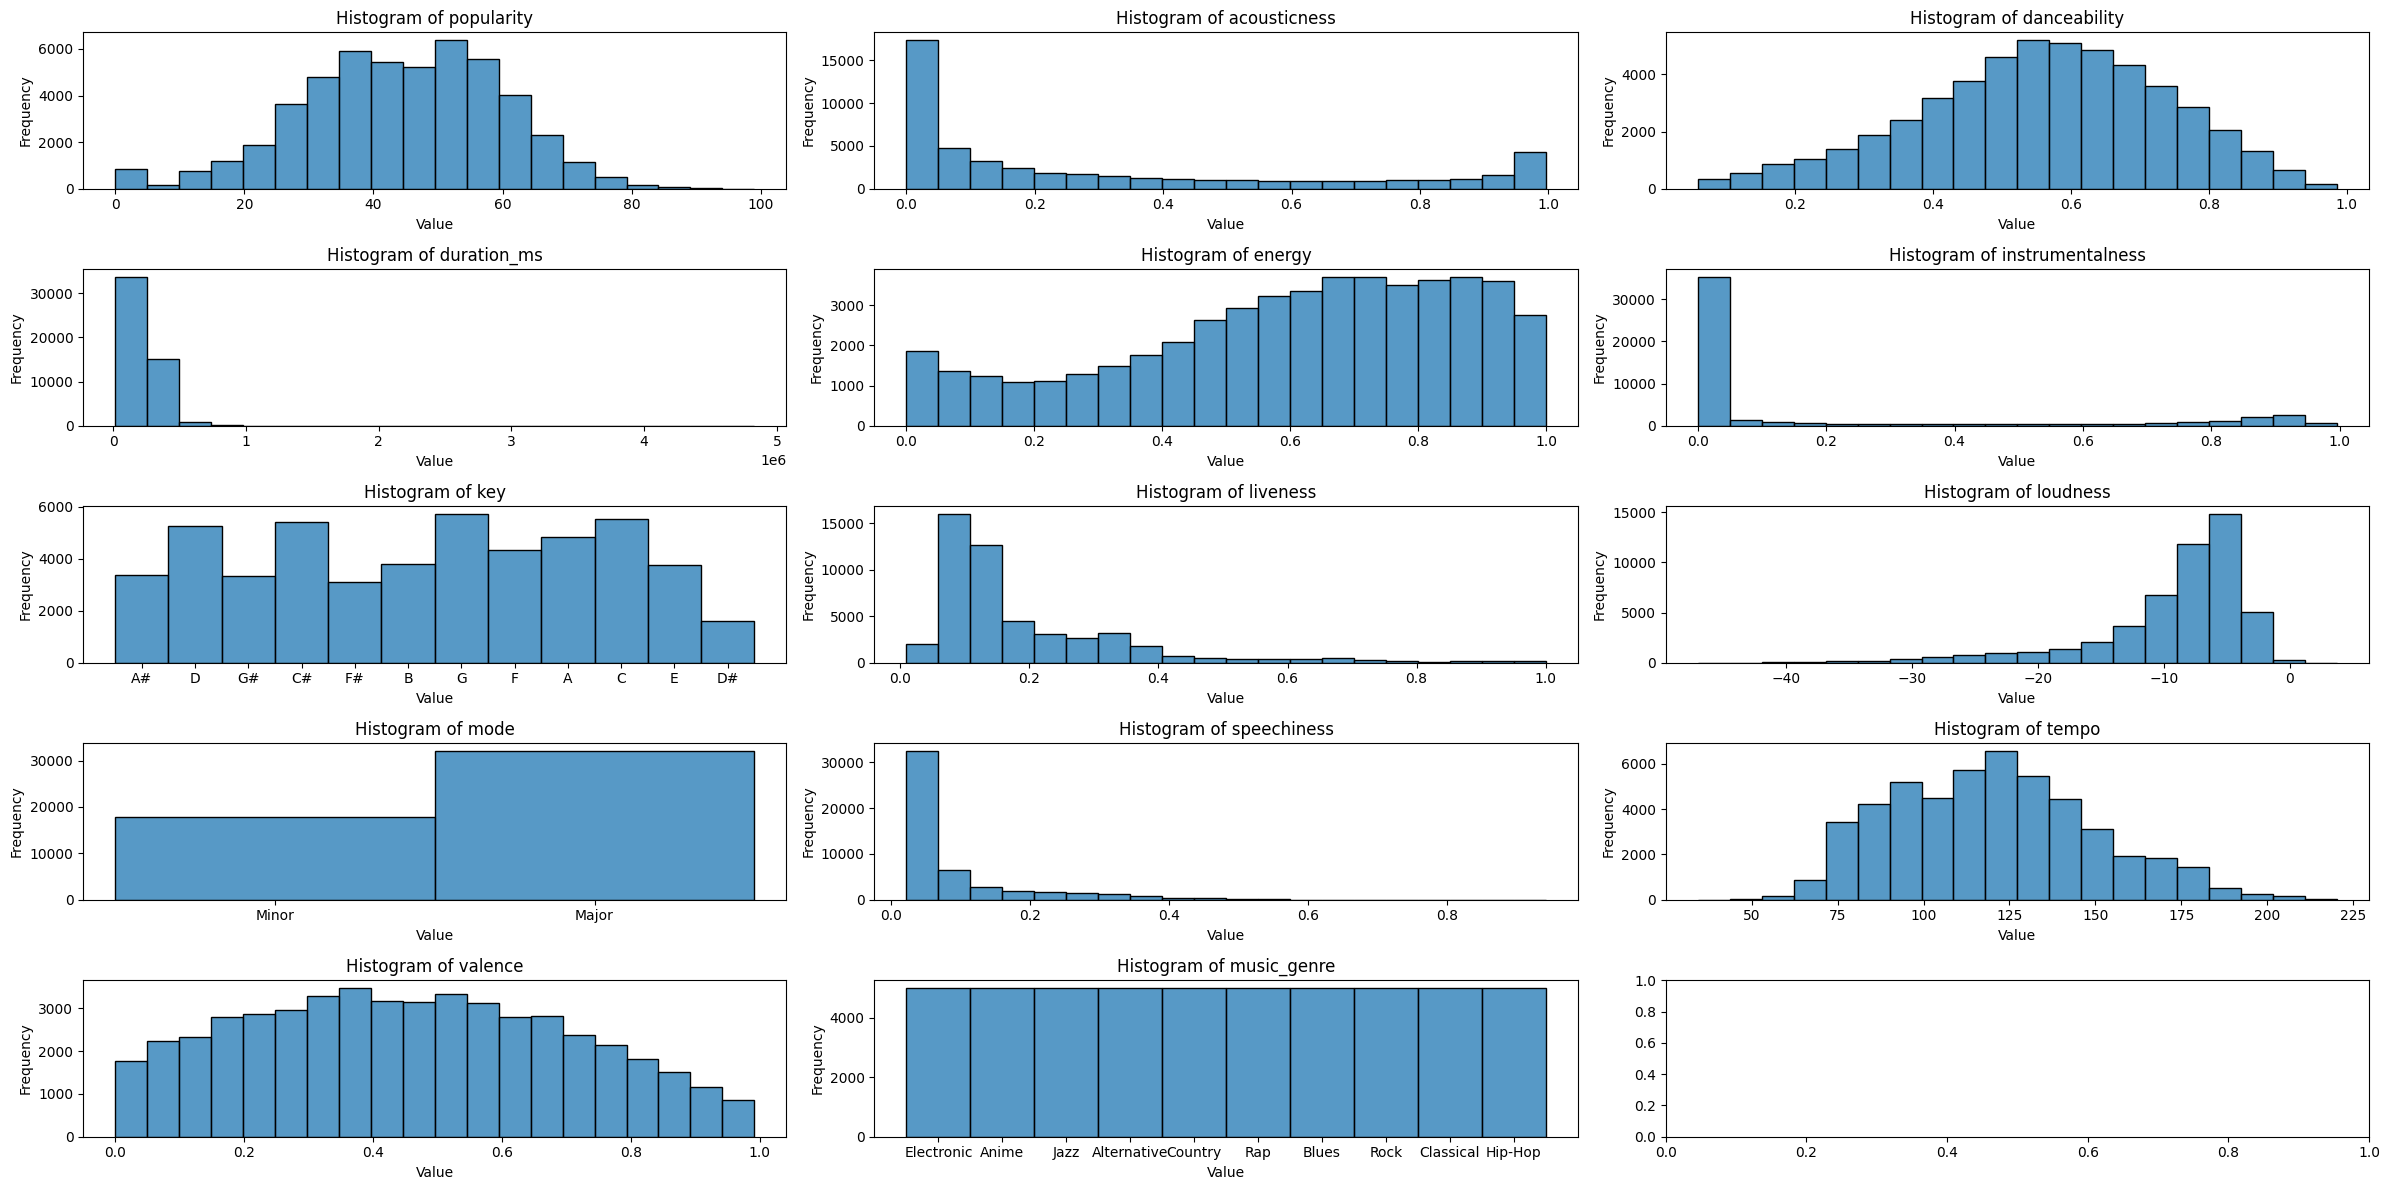

In [62]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(24, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, col in enumerate(master_df[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'music_genre']]):
    sns.histplot(master_df[col], bins=20, kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout and show
plt.tight_layout()
plt.show()


0        319553.0
1        218293.0
2        215613.0
3        166875.0
4        222369.0
           ...   
50000    139820.5
50001    251860.0
50002    189483.0
50003    262773.0
50004    267267.0
Name: duration_ms, Length: 50000, dtype: float64

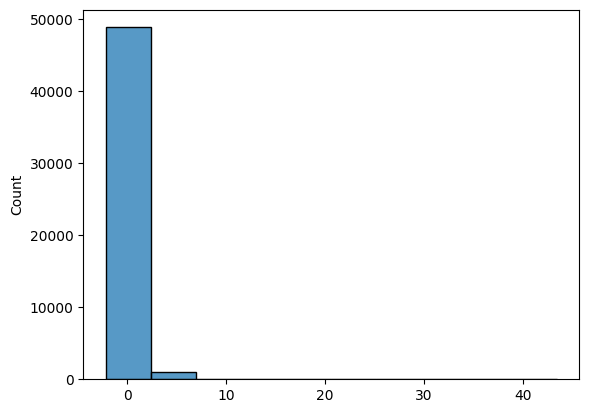

In [63]:
sns.histplot(np.append(x_train['duration_ms'], x_test['duration_ms'], axis = 0), bins = 10)
master_df['duration_ms'].copy()

In [64]:
corr_features = relevant_features.copy()
corr_features.append('music_genre')
corr_features

['popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'valence',
 'music_genre']

In [65]:
corr_matrix_spearman = master_df_encoded[corr_features].corr('spearman')
corr_matrix_spearman

popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.193412      0.338383    -0.101701   
acousticness       -0.193412      1.000000     -0.165430    -0.021739   
danceability        0.338383     -0.165430      1.000000    -0.149555   
duration_ms        -0.101701     -0.021739     -0.149555     1.000000   
energy              0.142534     -0.729733      0.131356     0.010244   
instrumentalness   -0.408293      0.203607     -0.295445     0.167919   
key                -0.050607      0.058044     -0.073005     0.018549   
liveness            0.003853     -0.130968     -0.047838    -0.034700   
loudness            0.235177     -0.646194      0.199070    -0.048261   
mode                0.012968     -0.018003      0.057996     0.018530   
speechiness         0.192254     -0.190512      0.255522    -0.115927   
tempo               0.034772     -0.252571     -0.027038    -0.026220   
valence             0.116916     -0.186892      0.411219    -0.141209   
music_genre         0.346821      0.196962     -0.020066    -0.063357   

                    energy  instrumentalness       key  liveness  loudness  \
popularity        0.142534         -0.408293 -0.050607  0.003853  0.235177   
acousticness     -0.729733          0.203607  0.058044 -0.130968 -0.646194   
danceability      0.131356         -0.295445 -0.073005 -0.047838  0.199070   
duration_ms       0.010244          0.167919  0.018549 -0.034700 -0.048261   
energy            1.000000         -0.260409 -0.045796  0.205534  0.824023   
instrumentalness -0.260409          1.000000  0.041621 -0.106659 -0.433928   
key              -0.045796          0.041621  1.000000 -0.000073 -0.053149   
liveness          0.205534         -0.106659 -0.000073  1.000000  0.162643   
loudness          0.824023         -0.433928 -0.053149  0.162643  1.000000   
mode              0.013409          0.058933  0.035499 -0.005471  0.000904   
speechiness       0.263302         -0.216559 -0.094613  0.112529  0.217654   
tempo             0.269379         -0.111655  0.003217  0.058399  0.240638   
valence           0.359295         -0.252144 -0.015908  0.050119  0.266401   
music_genre      -0.220550         -0.184274 -0.000472 -0.020014 -0.160749   

                      mode  speechiness     tempo   valence  music_genre  
popularity        0.012968     0.192254  0.034772  0.116916     0.346821  
acousticness     -0.018003    -0.190512 -0.252571 -0.186892     0.196962  
danceability      0.057996     0.255522 -0.027038  0.411219    -0.020066  
duration_ms       0.018530    -0.115927 -0.026220 -0.141209    -0.063357  
energy            0.013409     0.263302  0.269379  0.359295    -0.220550  
instrumentalness  0.058933    -0.216559 -0.111655 -0.252144    -0.184274  
key               0.035499    -0.094613  0.003217 -0.015908    -0.000472  
liveness         -0.005471     0.112529  0.058399  0.050119    -0.020014  
loudness          0.000904     0.217654  0.240638  0.266401    -0.160749  
mode              1.000000     0.123911 -0.021685 -0.024644    -0.052236  
speechiness       0.123911     1.000000  0.113887  0.071361     0.107894  
tempo            -0.021685     0.113887  1.000000  0.101642    -0.093915  
valence          -0.024644     0.071361  0.101642  1.000000    -0.030928  
music_genre      -0.052236     0.107894 -0.093915 -0.030928     1.000000

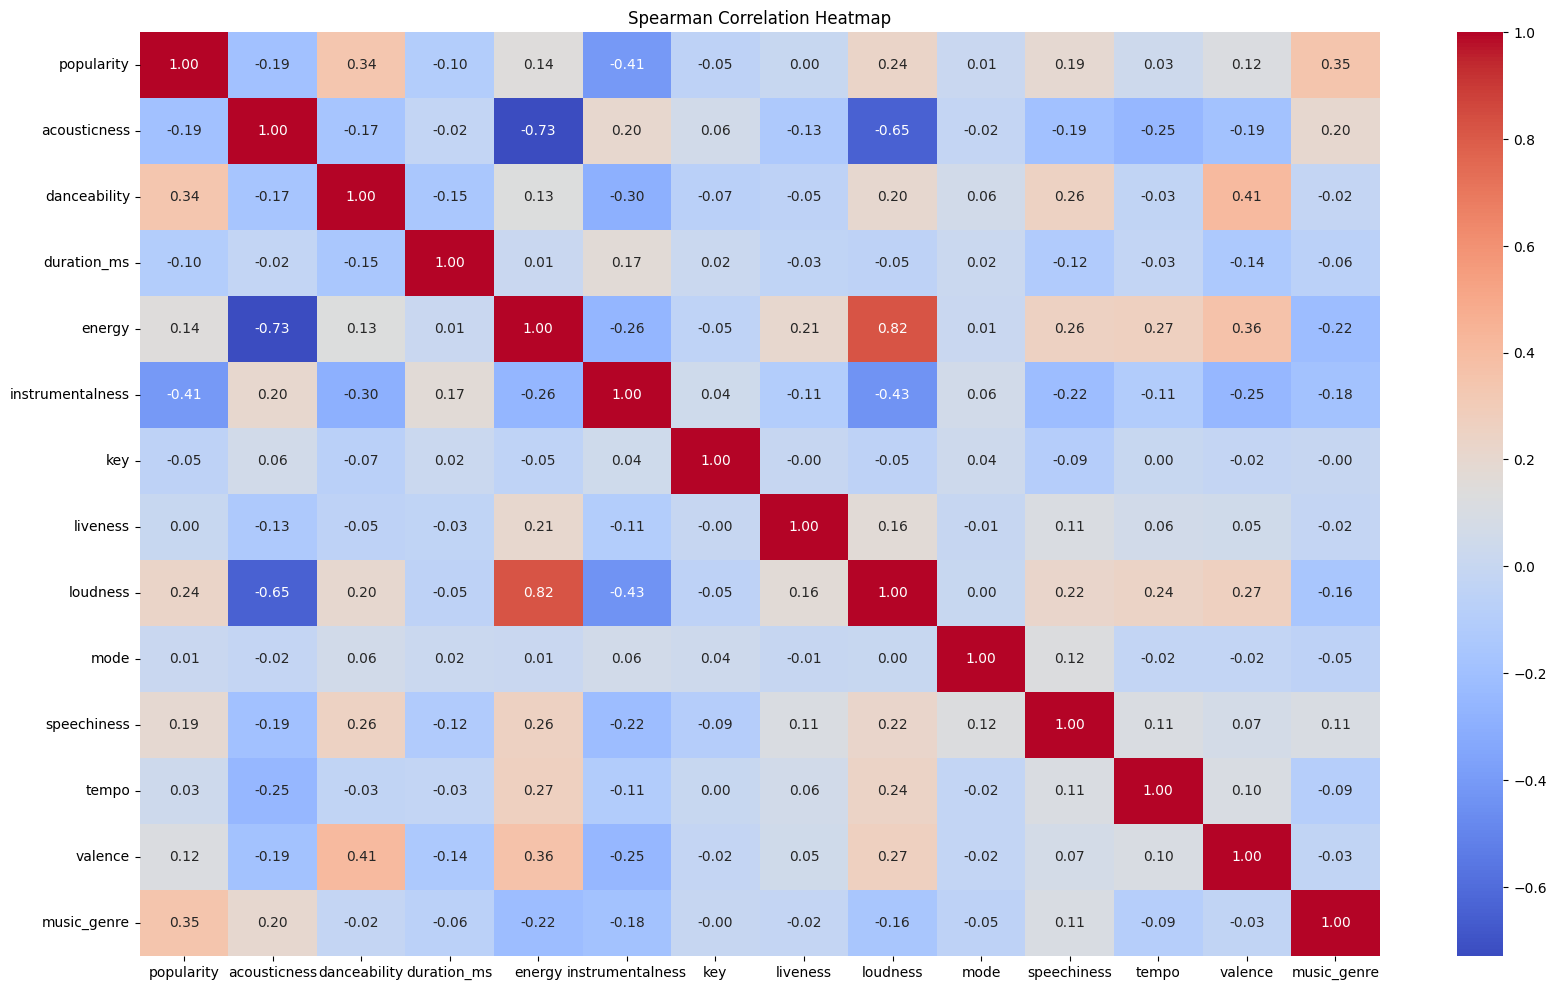

In [66]:
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()

In [67]:
corr_matrix_pearson= master_df_encoded[corr_features].corr('pearson')
corr_matrix_pearson

popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.290453      0.356420    -0.110916   
acousticness       -0.290453      1.000000     -0.347681     0.083255   
danceability        0.356420     -0.347681      1.000000    -0.197462   
duration_ms        -0.110916      0.083255     -0.197462     1.000000   
energy              0.216345     -0.791250      0.263934    -0.090507   
instrumentalness   -0.364960      0.387970     -0.301277     0.166642   
key                -0.048255      0.060576     -0.072727     0.016263   
liveness           -0.039468     -0.109220     -0.051465     0.025295   
loudness            0.317941     -0.730401      0.390859    -0.135990   
mode                0.013427     -0.025161      0.049634     0.010920   
speechiness         0.224309     -0.163377      0.279767    -0.108116   
tempo               0.035639     -0.244437     -0.014800    -0.049354   
valence             0.124913     -0.270238      0.434557    -0.167810   
music_genre         0.313268      0.175039     -0.040111     0.001330   

                    energy  instrumentalness       key  liveness  loudness  \
popularity        0.216345         -0.364960 -0.048255 -0.039468  0.317941   
acousticness     -0.791250          0.387970  0.060576 -0.109220 -0.730401   
danceability      0.263934         -0.301277 -0.072727 -0.051465  0.390859   
duration_ms      -0.090507          0.166642  0.016263  0.025295 -0.135990   
energy            1.000000         -0.389730 -0.048856  0.186731  0.838399   
instrumentalness -0.389730          1.000000  0.028532 -0.093537 -0.529030   
key              -0.048856          0.028532  1.000000 -0.000160 -0.051146   
liveness          0.186731         -0.093537 -0.000160  1.000000  0.126504   
loudness          0.838399         -0.529030 -0.051146  0.126504  1.000000   
mode              0.017878          0.060924  0.036831 -0.013550  0.008744   
speechiness       0.158180         -0.199137 -0.087915  0.114475  0.165578   
tempo             0.276103         -0.133893  0.002448  0.042283  0.252125   
valence           0.396317         -0.272780 -0.013719  0.052110  0.340664   
music_genre      -0.229721         -0.116173 -0.001137 -0.012630 -0.228094   

                      mode  speechiness     tempo   valence  music_genre  
popularity        0.013427     0.224309  0.035639  0.124913     0.313268  
acousticness     -0.025161    -0.163377 -0.244437 -0.270238     0.175039  
danceability      0.049634     0.279767 -0.014800  0.434557    -0.040111  
duration_ms       0.010920    -0.108116 -0.049354 -0.167810     0.001330  
energy            0.017878     0.158180  0.276103  0.396317    -0.229721  
instrumentalness  0.060924    -0.199137 -0.133893 -0.272780    -0.116173  
key               0.036831    -0.087915  0.002448 -0.013719    -0.001137  
liveness         -0.013550     0.114475  0.042283  0.052110    -0.012630  
loudness          0.008744     0.165578  0.252125  0.340664    -0.228094  
mode              1.000000     0.077379 -0.021160 -0.025427    -0.052236  
speechiness       0.077379     1.000000  0.070825  0.059847     0.144023  
tempo            -0.021160     0.070825  1.000000  0.110822    -0.094428  
valence          -0.025427     0.059847  0.110822  1.000000    -0.031769  
music_genre      -0.052236     0.144023 -0.094428 -0.031769     1.000000

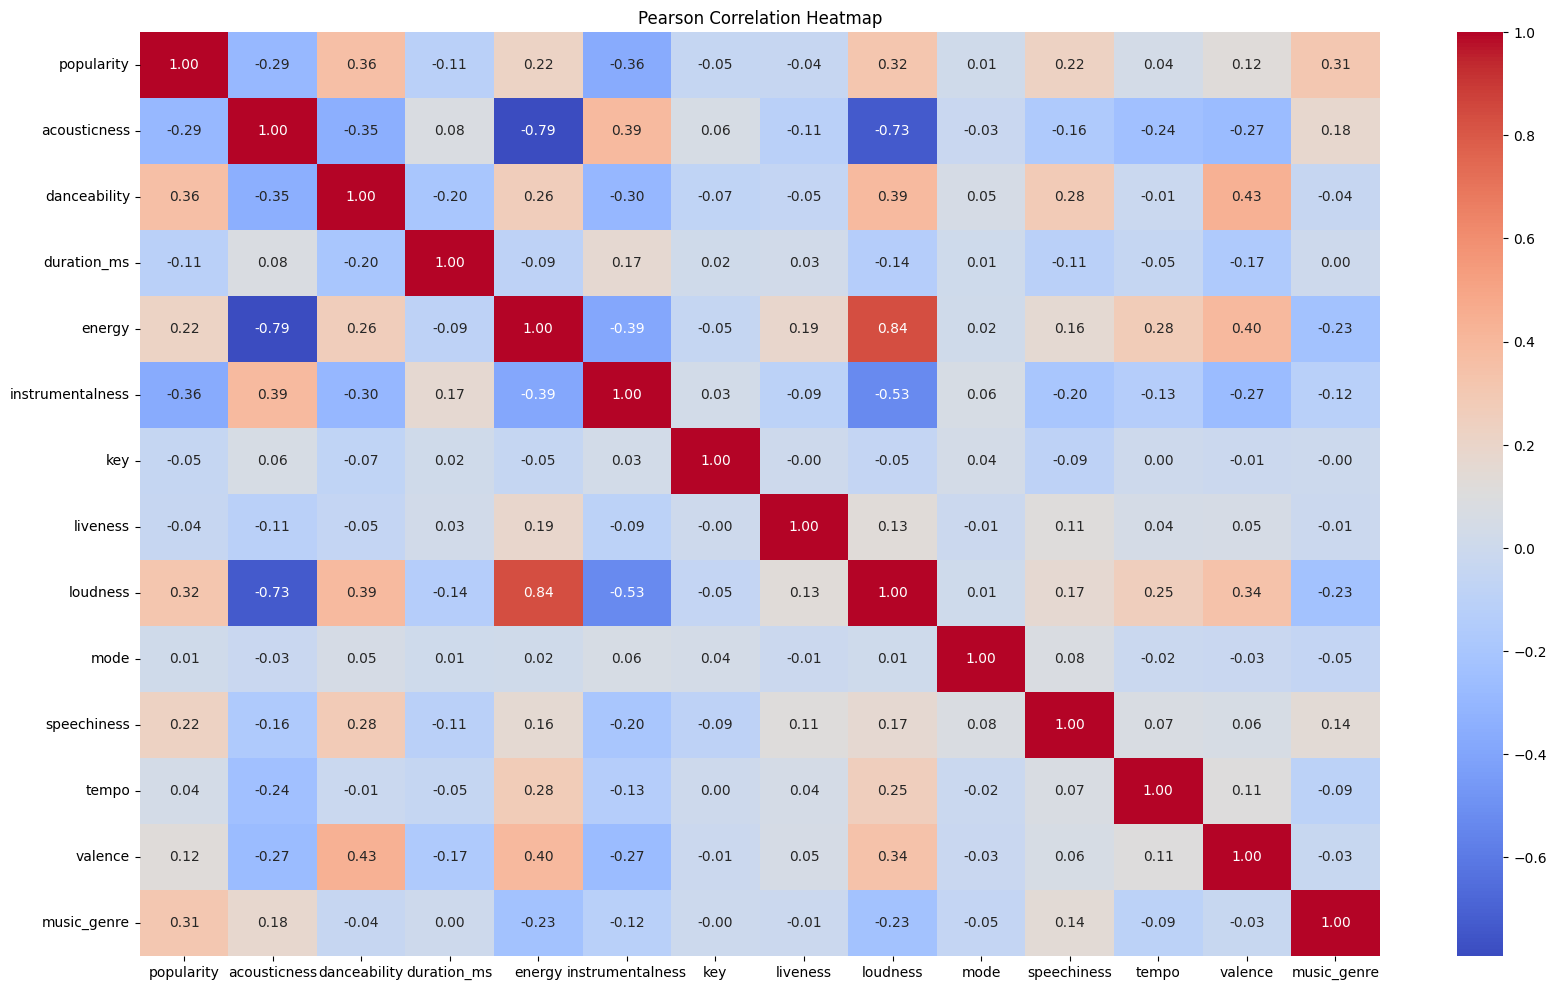

In [68]:
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

# Linear Dimensionality Reduction

##PCA

In [69]:
pca_scaler = StandardScaler()

In [70]:
pca_x_train = x_train.copy()
pca_x_test = x_test.copy()
pca_x_train['key']

12176     3.0
34223     2.0
23604     4.0
8566      7.0
5299      6.0
         ... 
18190     7.0
27636     0.0
47250     8.0
44827    11.0
23053     8.0
Name: key, Length: 45000, dtype: float64

In [71]:
# We are forced to standardize key since without it, Key will get the highest eigenvalue due to scale
#pca_x_train['key'] = pca_scaler.fit_transform(pca_x_train[['key']])
#pca_x_test['key'] = pca_scaler.transform(pca_x_test[['key']])
#Theoretically, these should be discrete, hence, scaling here retains the encoded values kinda, just scaled it with everything else.
#pca_x_test['key'].nunique()

pca_x_train = pca_x_train.drop(columns = ['key'])
pca_x_test = pca_x_test.drop(columns =['key'])
pca_columns = pca_x_train.columns

In [72]:
pca = PCA()

In [73]:
pca_x_train = pca.fit_transform(pca_x_train)
pca_x_test = pca.transform(pca_x_test)

In [74]:
eigVals = pca.explained_variance_
var_explained = pca.explained_variance_ratio_
loadings = pca.components_
loadings.shape

(12, 12)

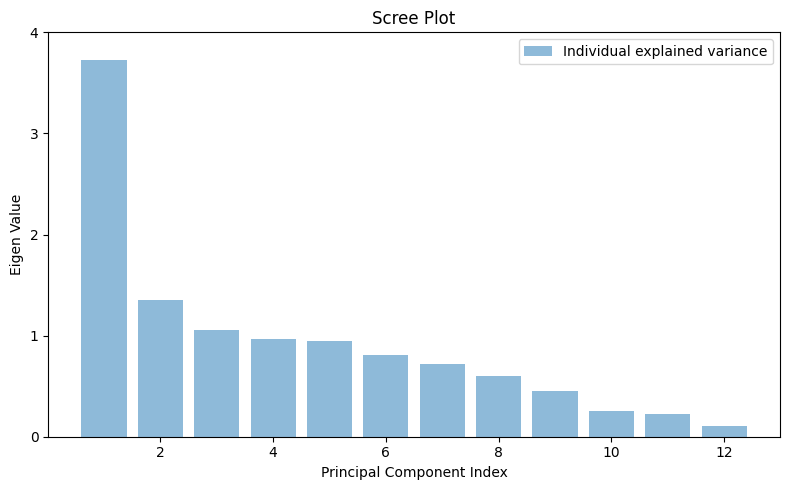

In [75]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(eigVals)+1), eigVals, alpha=0.5, align='center',
        label='Individual explained variance')

plt.ylabel('Eigen Value')
plt.yticks(np.arange(0, int(max(eigVals)) + 2, 1))
plt.xlabel('Principal Component Index')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [76]:
count = 0
for eigval in eigVals:
  if eigval > 1:
    count+=1
count

print(eigVals[0:4])
print(count)

[3.72623419 1.35455796 1.05431759 0.97105118]
3


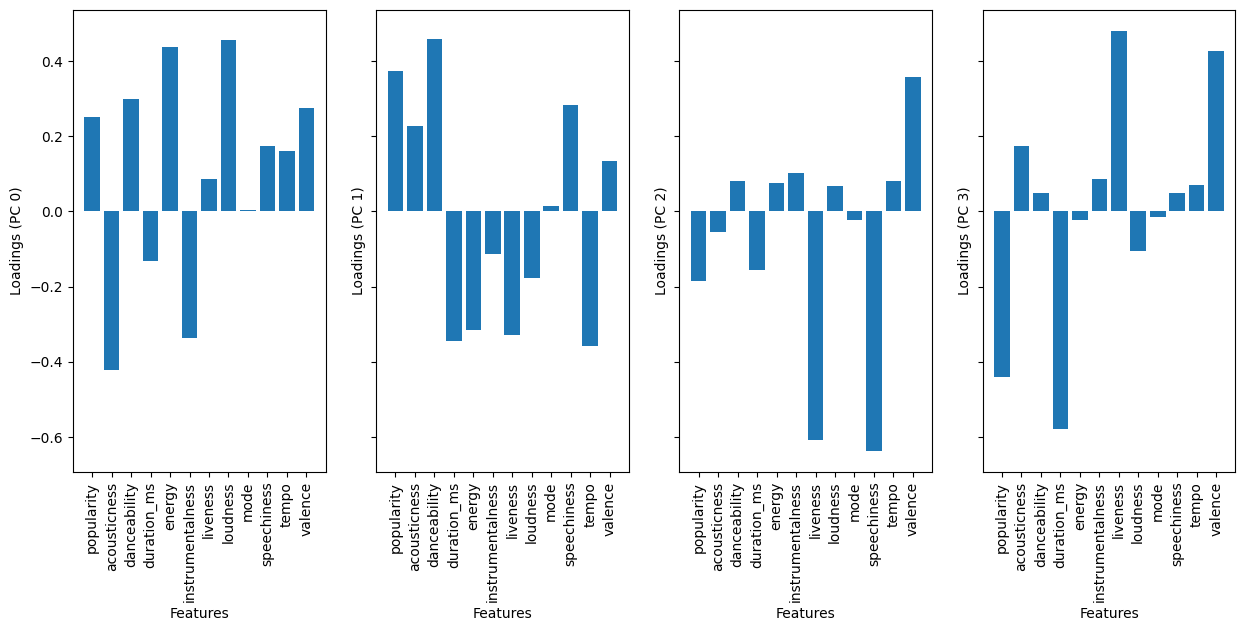

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming loadings is a matrix with shape (num_principal_components, num_features)
which_principal_components = [0, 1, 2, 3]  # Select the principal components of interest

# Create subplots
fig, axes = plt.subplots(1, len(which_principal_components), figsize=(15, 6), sharey=True)

# Iterate over each principal component
for i, which_component in enumerate(which_principal_components):
    # Flip the sign of loadings because the direction is arbitrary
    loadings_for_plot = loadings[which_component, :]*-1 #basically how components_ is is it is (components, features)
    # therefore each row is the weight of each feature in a new component

    # Create an array of indices for the bar plot
    x1 = np.arange(len(loadings_for_plot))

    # Plot the loadings with column names as labels
    axes[i].bar(x1, loadings_for_plot)
    axes[i].set_xlabel(f'Features')
    axes[i].set_ylabel(f'Loadings (PC {which_component})')

    # Set x-axis labels for all subplots
    axes[i].set_xticks(x1)
    axes[i].set_xticklabels(pca_columns, rotation='vertical')

plt.show()



In [78]:
print(f"The variance explained by the first four principal components is {sum(val for val in var_explained[0:4])}.")


The variance explained by the first four principal components is 0.632784217249158.


In [79]:
print(pca_x_train.shape)
print(pca_x_test.shape)

(45000, 12)
(5000, 12)


In [80]:
pca_x_train = pca_x_train[:, 0:4]
pca_x_test = pca_x_test[:, 0:4]
#appending y_train and y_test from the specsheet y_train and test
pca_visualization_labels = np.append(y_train, y_test, axis = 0)
#appending pca_x_train and pca_x_test from the specsheet df
visualization_pca_df = np.append(pca_x_train, pca_x_test, axis= 0)
visualization_pca_df = pd.DataFrame(visualization_pca_df, columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4'])
visualization_pca_df['labels'] = pca_visualization_labels



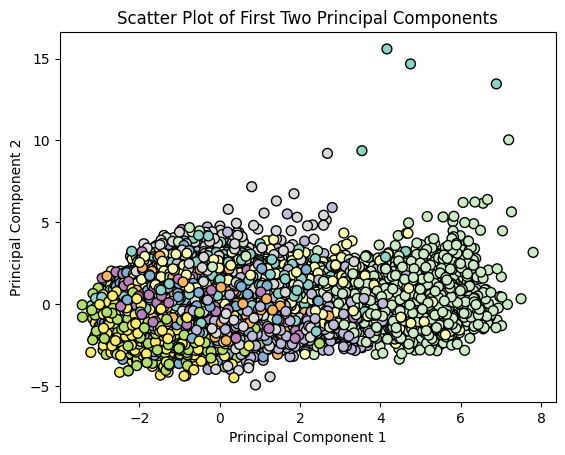

In [81]:
import matplotlib.pyplot as plt

# Assuming pca_2d is your DataFrame containing the first two principal components

plt.scatter(visualization_pca_df['PCA1'],visualization_pca_df['PCA2'], c= visualization_pca_df['labels'], cmap='Set3', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.show()


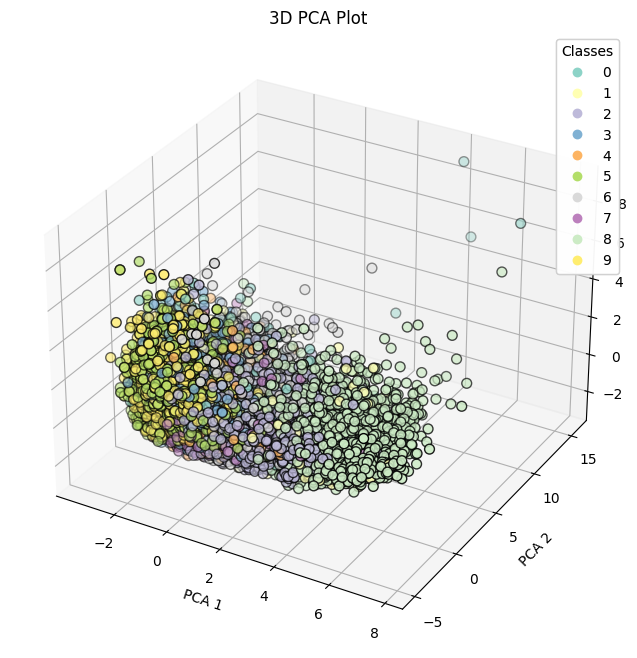

In [82]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(visualization_pca_df['PCA1'], visualization_pca_df['PCA2'], visualization_pca_df['PCA3'], c= visualization_pca_df['labels'], cmap='Set3', edgecolor='k', s=50)

# Labeling the axes
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

# Legend
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.add_artist(legend)

plt.title('3D PCA Plot')
plt.show()


In [83]:
y_test

8741     1.0
37086    7.0
44752    8.0
29101    5.0
6425     1.0
        ... 
27440    5.0
37604    7.0
22810    4.0
5814     1.0
21284    4.0
Name: music_genre, Length: 5000, dtype: float64

In [84]:


pca_x_train = torch.tensor(np.array(pca_x_train), dtype=torch.double)
pca_x_test = torch.tensor(np.array(pca_x_test), dtype=torch.double)
pca_y_train = torch.tensor(np.array(y_train), dtype=torch.long)  # Assuming y_train contains class labels (integers)
pca_y_test = torch.tensor(np.array(y_test), dtype=torch.long)  # Assuming y_test contains class labels (integers)


# Apply one-hot encoding to y_train and y_test
pca_y_train_one_hot = torch.nn.functional.one_hot(pca_y_train, num_classes=10)
pca_y_test_one_hot = torch.nn.functional.one_hot(pca_y_test, num_classes=10)

# Print shapes to verify
print("Shape of y_train_one_hot:", pca_y_train_one_hot.shape)
print("Shape of y_test_one_hot:", pca_y_test_one_hot.shape)



pca_y_train = pca_y_train.to(torch.long)
pca_y_test = pca_y_test.to(torch.long)



Shape of y_train_one_hot: torch.Size([45000, 10])
Shape of y_test_one_hot: torch.Size([5000, 10])


##LDA

In [85]:
lda = LinearDiscriminantAnalysis()

In [86]:
lda_x_train = x_train.copy()
lda_x_test = x_test.copy()


In [87]:
# Standardizing key because it might be an issie
#lda_scaler = StandardScaler()
#lda_x_train['key'] = lda_scaler.fit_transform(lda_x_train[['key']])
#lda_x_test['key'] = lda_scaler.transform(lda_x_test[['key']])
#Theoretically, these should be discrete, hence, scaling here retains the encoded values kinda, just scaled it with everything else.
#lda_x_test['key']

#DO NOT DO THIS

#I FINALLY USED THE KEY AS IS FOR LDA AND IT DID NOT HAVE AN IMPACT ON THE LOADINGS. Hence key was not important for seperation

In [88]:
lda_x_train = lda.fit_transform(lda_x_train, y_train)
lda_x_test = lda.transform(x_test)


In [89]:
print(lda_x_train.shape)
print(lda_x_test.shape)


(45000, 9)
(5000, 9)


In [90]:
lda_x_train = lda_x_train[:, 0:4]
lda_x_test = lda_x_test[:, 0:4]
#appending y_train and y_test from the specsheet y_train and test
lda_visualization_labels = np.append(y_train, y_test, axis = 0)
#appending pca_x_train and pca_x_test from the specsheet df
visualization_lda_df = np.append(lda_x_train, lda_x_test, axis= 0)
visualization_lda_df = pd.DataFrame(visualization_lda_df, columns = ['LDA1', 'LDA2', 'LDA3', 'LDA4'])
visualization_lda_df['labels'] = lda_visualization_labels



In [91]:
visualization_lda_df

LDA1      LDA2      LDA3      LDA4  labels
0      0.009007  1.227781 -0.544638  0.117908     2.0
1      0.598733  0.681651  0.384046 -1.995804     6.0
2     -0.244146  0.624254  0.473785  0.163313     4.0
3      2.395097  3.111590  0.133216  0.833478     1.0
4      1.398322  2.466923 -0.180234 -0.297465     1.0
...         ...       ...       ...       ...     ...
49995 -1.383490 -2.086216  0.121464  0.942781     5.0
49996 -1.263902 -0.396483  1.854294 -1.136802     7.0
49997  0.508164  0.518382  0.923876  1.984279     4.0
49998  1.520262  2.252567  0.441939 -0.596074     1.0
49999  0.366145 -0.240366  1.285856  0.997640     4.0

[50000 rows x 5 columns]

In [92]:
# Eigenvalues can be approximated from explained variance ratios

explained_variance = lda.explained_variance_ratio_
eigenvalues = explained_variance
#* (lda_x_train.shape[0] - len(np.unique(y_train)))


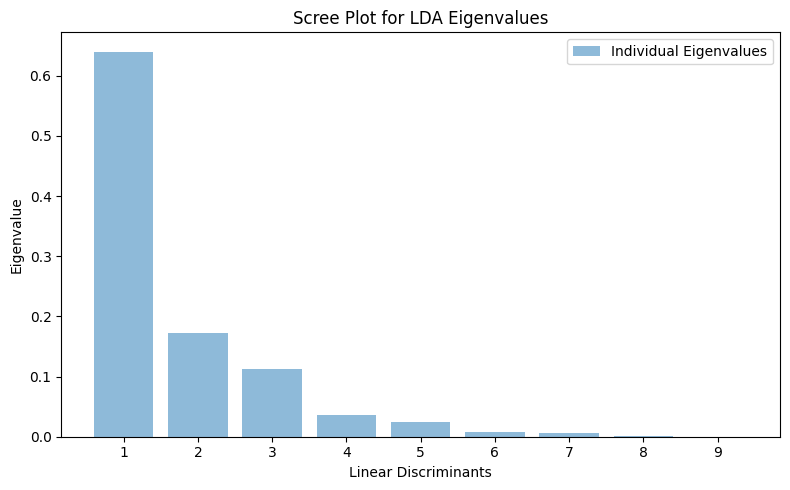

In [93]:
# Creating the scree plot for LDA eigenvalues
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.5, align='center', label='Individual Eigenvalues')
plt.ylabel('Eigenvalue')
plt.xlabel('Linear Discriminants')
plt.title('Scree Plot for LDA Eigenvalues')
plt.legend(loc='best')
plt.xticks(range(1, len(eigenvalues) + 1))  # ensure ticks correspond to number of discriminants
plt.tight_layout()
plt.show()


In [94]:
top_3_var = eigenvalues[0:3].sum()
top_3_var

0.9255649605094807

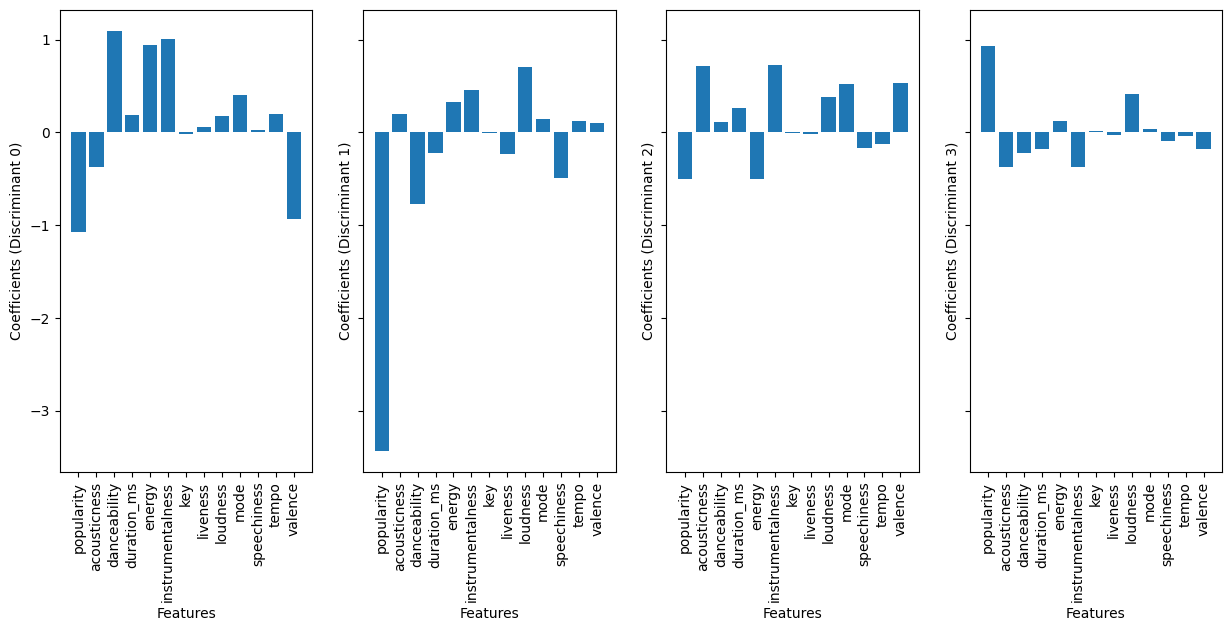

In [95]:
# Select discriminants of interest, assuming lda.n_components_ components were calculated
coefficients = lda.coef_
which_discriminants = range(min(len(coefficients), 4))  # Adjust based on available discriminants

# Create subplots
fig, axes = plt.subplots(1, len(which_discriminants), figsize=(15, 6), sharey=True)

# Iterate over each discriminant
for i, which_discriminant in enumerate(which_discriminants):
    # Coefficients for the discriminant
    coefficients_for_plot = coefficients[which_discriminant, :]

    # Create an array of indices for the bar plot
    x1 = np.arange(len(coefficients_for_plot))

    # Plot the coefficients
    axes[i].bar(x1, coefficients_for_plot)
    axes[i].set_xlabel('Features')
    axes[i].set_ylabel(f'Coefficients (Discriminant {which_discriminant})')

    # Set x-axis labels for all subplots
    axes[i].set_xticks(x1)
    axes[i].set_xticklabels(x_train.columns, rotation='vertical')

plt.show()


In [96]:
visualization_lda_df.idxmax()
test_set.iloc[4438]

instance_id                       26444.0
artist_name                Franz Schubert
track_name          No. 3 in G-Flat Major
popularity                            0.0
acousticness                        0.991
danceability                        0.148
duration_ms                      377507.0
energy                            0.00261
instrumentalness                    0.918
key                                   4.0
liveness                            0.111
loudness                          -36.152
mode                                  0.0
speechiness                        0.0367
tempo                              68.931
obtained_date                       4-Apr
valence                            0.0762
music_genre                           8.0
Name: 44406, dtype: object

In [97]:
visualization_lda_df.idxmin()
train_set.iloc[40086]

instance_id                                                   64767.0
artist_name                                          Olivier Messiaen
track_name          Turangalîla Symphonie: 6. Jardin du sommeil d'...
popularity                                                       47.0
acousticness                                                    0.949
danceability                                                    0.142
duration_ms                                                  759200.0
energy                                                        0.00336
instrumentalness                                                0.318
key                                                               4.0
liveness                                                       0.0652
loudness                                                       -42.32
mode                                                              0.0
speechiness                                                    0.0435
tempo               

In [98]:

lda_encoder = OrdinalEncoder(categories = [genres])
lda_encoder.fit(master_df[['music_genre']])

OrdinalEncoder(categories=[['Electronic', 'Anime', 'Jazz', 'Alternative',
                            'Country', 'Rap', 'Blues', 'Rock', 'Classical',
                            'Hip-Hop']])

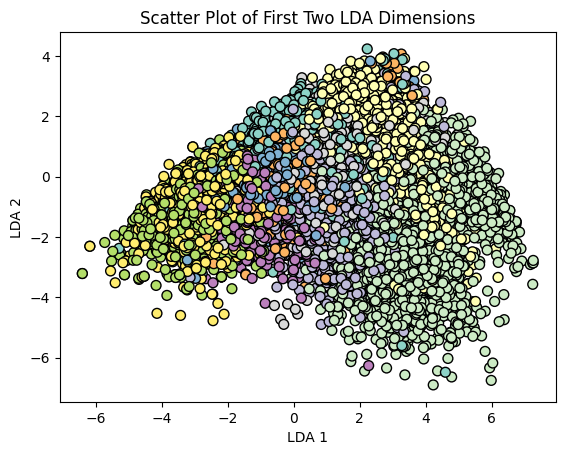

In [99]:

# Assuming pca_2d is your DataFrame containing the first two principal components

plt.scatter(visualization_lda_df['LDA1'], visualization_lda_df['LDA2'], c= lda_visualization_labels, cmap='Set3', edgecolor='k', s=50)


handles, labels = scatter.legend_elements()
# Use unique labels from lda_visualization_labels for the legend
unique_labels = sorted(set(lda_visualization_labels))
custom_labels = lda_encoder.inverse_transform(np.array(unique_labels).reshape(-1,1))

legend = ax.legend(handles, custom_labels, loc="upper right", title="Classes")
ax.add_artist(legend)


plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.title('Scatter Plot of First Two LDA Dimensions')
plt.show()


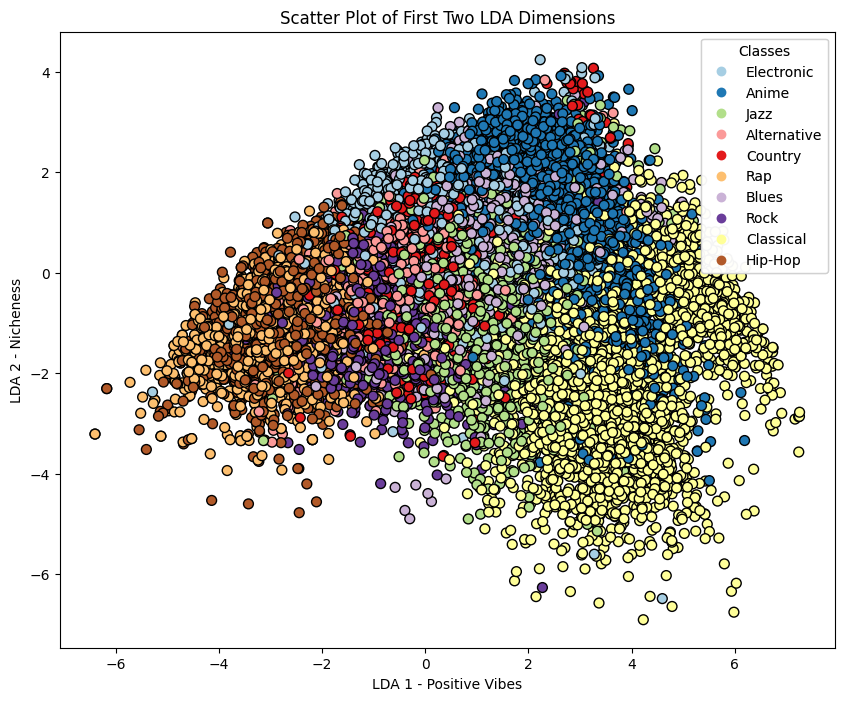

In [100]:
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot
scatter = ax.scatter(visualization_lda_df['LDA1'], visualization_lda_df['LDA2'],
                     c=lda_visualization_labels, cmap='Paired', edgecolor='k', s=50)

# Create custom legend
handles, labels = scatter.legend_elements()
custom_labels = [label[0] for label in lda_encoder.inverse_transform(np.array(unique_labels).reshape(-1, 1))]
legend = ax.legend(handles, custom_labels, loc="upper right", title="Classes")
ax.add_artist(legend)

plt.xlabel('LDA 1 - Positive Vibes')
plt.ylabel('LDA 2 - Nicheness')
plt.title('Scatter Plot of First Two LDA Dimensions')
plt.show()

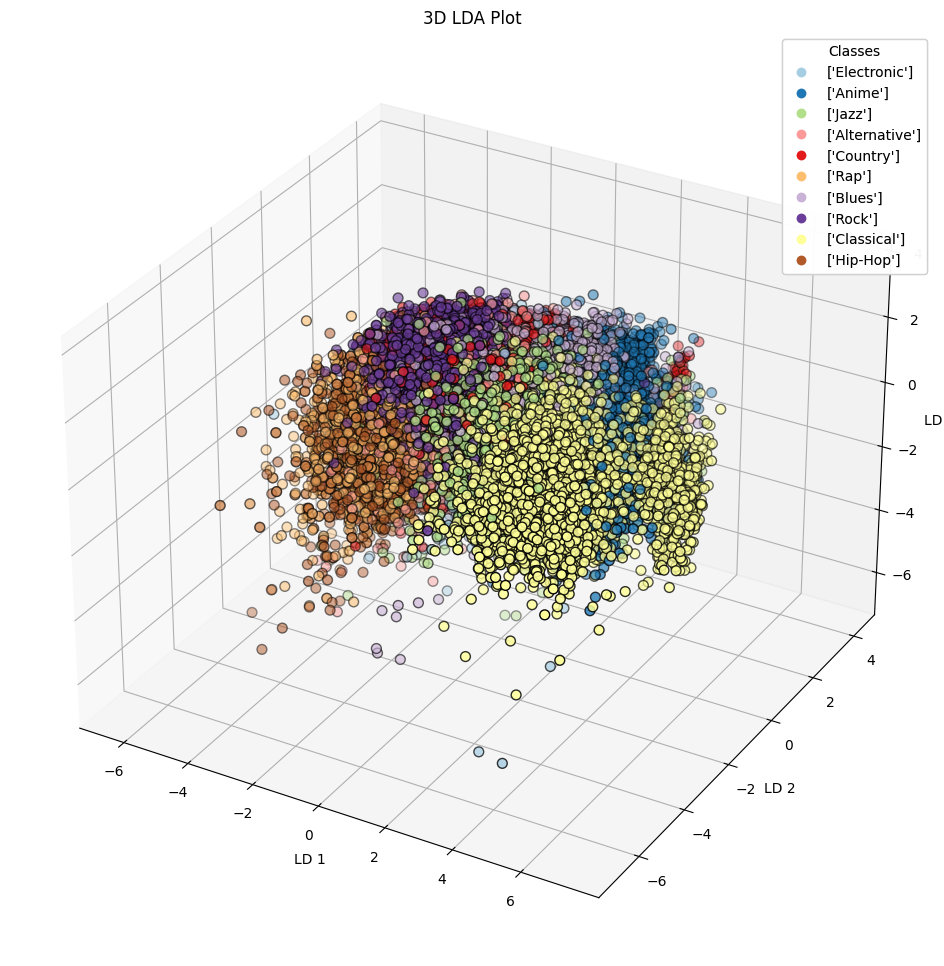

In [101]:


fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(visualization_lda_df['LDA1'], visualization_lda_df['LDA2'], visualization_lda_df['LDA3'], c = lda_visualization_labels, cmap='Paired', edgecolor='k', s=50)

# Labeling the axes
ax.set_xlabel("LD 1")
ax.set_ylabel("LD 2")
ax.set_zlabel("LD 3")



handles, labels = scatter.legend_elements()
# Use unique labels from lda_visualization_labels for the legend
unique_labels = sorted(set(lda_visualization_labels))
custom_labels = lda_encoder.inverse_transform(np.array(unique_labels).reshape(-1,1))



#Add encoded genres in this legend

legend = ax.legend(handles, custom_labels, loc="upper right", title="Classes")
ax.add_artist(legend)

plt.title('3D LDA Plot')
plt.show()




In [102]:
print(lda_x_train.shape)
print(y_train.shape)
print(lda_x_test.shape)
print(y_test.shape)
y_test.value_counts()

(45000, 4)
(45000,)
(5000, 4)
(5000,)


music_genre
1.0    500
7.0    500
8.0    500
5.0    500
2.0    500
6.0    500
9.0    500
4.0    500
3.0    500
0.0    500
Name: count, dtype: int64

In [103]:
lda_x_train = torch.tensor(lda_x_train[:, 0:3], dtype=torch.double)
lda_x_test = torch.tensor(lda_x_test[:, 0:3], dtype=torch.double)
lda_y_train = torch.tensor(y_train, dtype=torch.long)  # Assuming y_train contains class labels (integers)
lda_y_test = torch.tensor(y_test.values, dtype=torch.long)  # Assuming y_test contains class labels (integers)


# Apply one-hot encoding to y_train and y_test
lda_y_train_one_hot = torch.nn.functional.one_hot(lda_y_train, num_classes=10)
lda_y_test_one_hot = torch.nn.functional.one_hot(lda_y_test, num_classes=10)

# Print shapes to verify
print("Shape of y_train_one_hot:", lda_y_train_one_hot.shape)
print("Shape of y_test_one_hot:", lda_y_test_one_hot.shape)







Shape of y_train_one_hot: torch.Size([45000, 10])
Shape of y_test_one_hot: torch.Size([5000, 10])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is 0.3203


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is 0.3250


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is 0.3191


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is 0.2792


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is 0.2826


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is 0.2748


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is 0.2713


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette_score is 0.2607


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the average silhouette_score is 0.2571


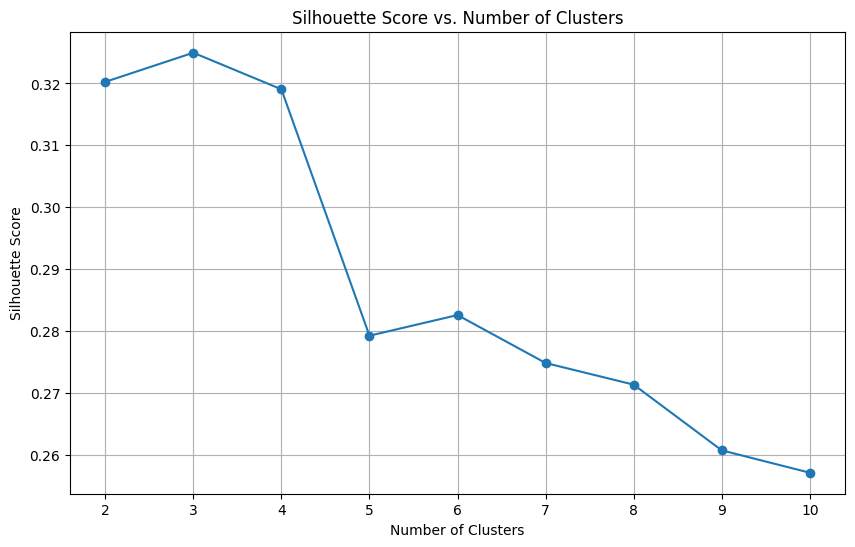

In [104]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate sample data with 3 features
X, _ = make_blobs(n_samples=300, centers=4, n_features=3, random_state=19324476)

# Initialize variables to store silhouette scores
silhouette_scores = []

# Range of clusters to try
range_n_clusters = list(range(2, 11))

# Loop over the range of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=19324476)
    cluster_labels = kmeans.fit_predict(visualization_lda_df[['LDA1', 'LDA2', 'LDA3']])

    # Calculate silhouette score
    silhouette_avg = silhouette_score(visualization_lda_df[['LDA1', 'LDA2', 'LDA3']], cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is {silhouette_avg:.4f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is 0.3528


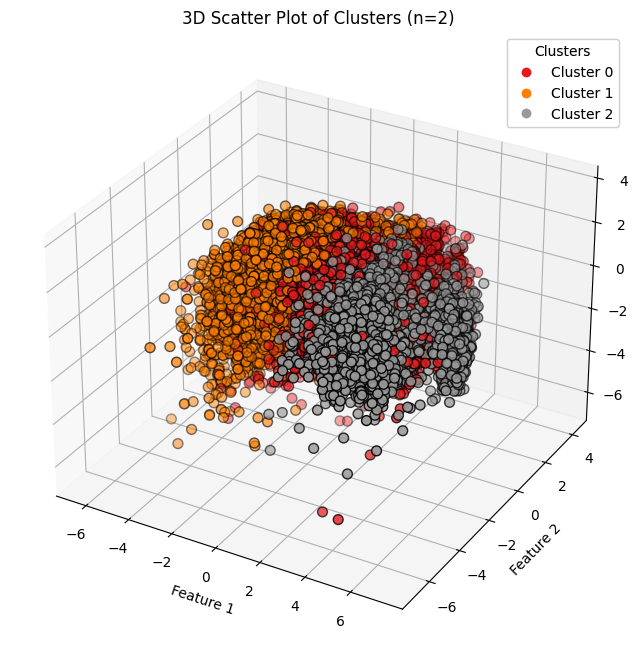

In [105]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Set the number of clusters to 2
n_clusters = 3

# Fit KMeans with 2 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=19324476)
cluster_labels = kmeans.fit_predict(visualization_lda_df)

# Calculate silhouette score for 2 clusters
silhouette_avg = silhouette_score(visualization_lda_df, cluster_labels)
print(f"For n_clusters = {n_clusters}, the average silhouette_score is {silhouette_avg:.4f}")

# 3D Plot of clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(visualization_lda_df[['LDA1']], visualization_lda_df[['LDA2']], visualization_lda_df[['LDA3']], c=cluster_labels, cmap='Set1', s=50, edgecolor='k')

# Labeling the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Adding legend
handles, labels = scatter.legend_elements()
legend = ax.legend(handles, [f"Cluster {i}" for i in range(n_clusters)], loc="upper right", title="Clusters")
ax.add_artist(legend)

plt.title('3D Scatter Plot of Clusters (n=2)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is 0.4026


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is 0.4423


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is 0.3636


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is 0.3630


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is 0.3465


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is 0.3473


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is 0.3601


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette_score is 0.3366


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the average silhouette_score is 0.3390


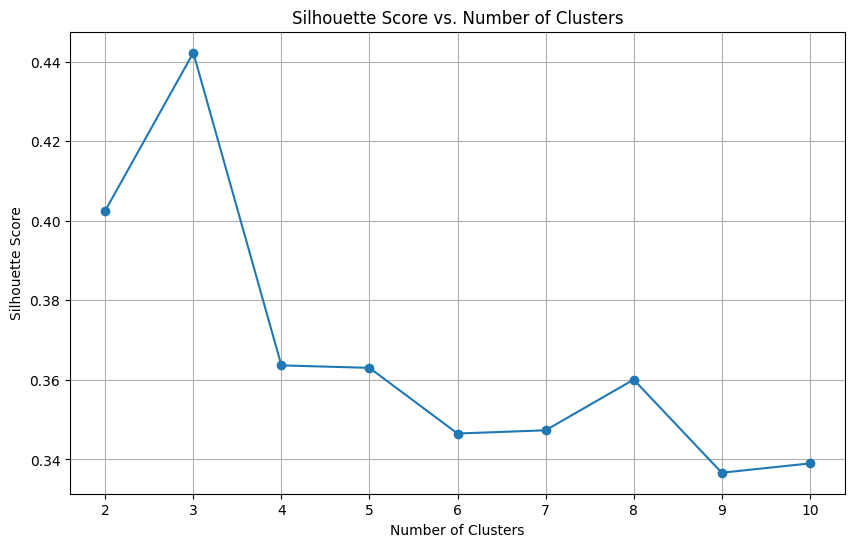

In [106]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate sample data with 3 features
X, _ = make_blobs(n_samples=300, centers=4, n_features=2, random_state=19324476)

# Initialize variables to store silhouette scores
silhouette_scores = []

# Range of clusters to try
range_n_clusters = list(range(2, 11))

# Loop over the range of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=19324476)
    cluster_labels = kmeans.fit_predict(visualization_lda_df[['LDA1', 'LDA2']])

    # Calculate silhouette score
    silhouette_avg = silhouette_score(visualization_lda_df[['LDA1', 'LDA2']], cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is {silhouette_avg:.4f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is 0.4423


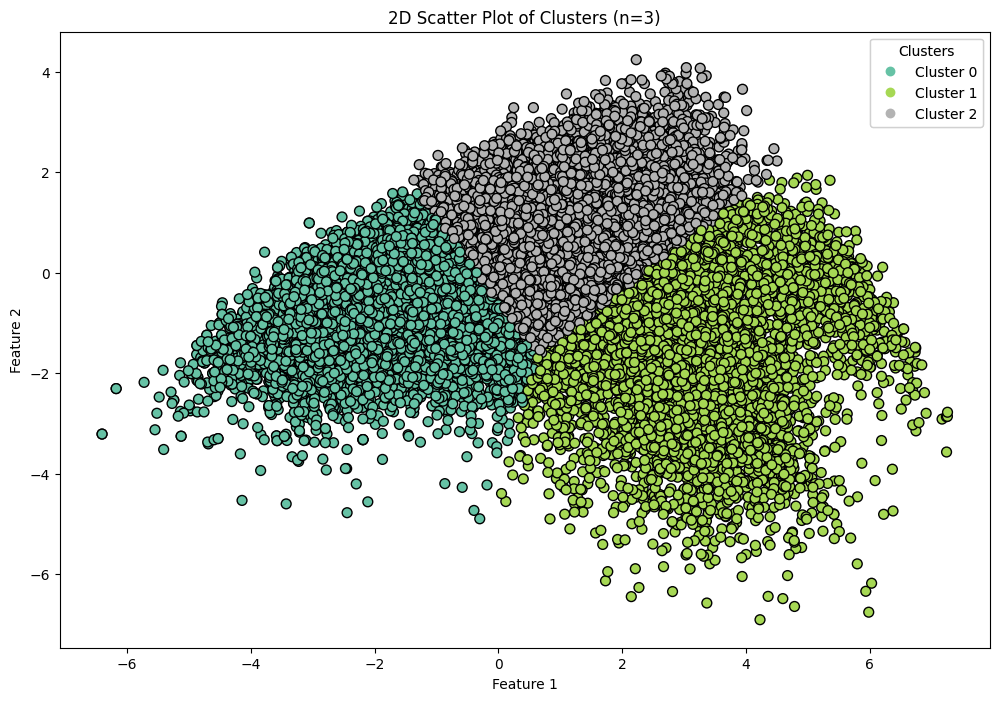

In [107]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt




# Set the number of clusters to 3
n_clusters = 3

# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=19324476)
cluster_labels = kmeans.fit_predict(visualization_lda_df[['LDA1', 'LDA2']])

# Calculate silhouette score for 3 clusters
silhouette_avg = silhouette_score(visualization_lda_df[['LDA1', 'LDA2']], cluster_labels)
print(f"For n_clusters = {n_clusters}, the average silhouette_score is {silhouette_avg:.4f}")

# 2D Plot of clusters
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot
scatter = ax.scatter(visualization_lda_df['LDA1'], visualization_lda_df['LDA2'], c=cluster_labels, cmap='Set2', s=50, edgecolor='k')

# Labeling the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# Adding legend
handles, labels = scatter.legend_elements()
legend = ax.legend(handles, [f"Cluster {i}" for i in range(n_clusters)], loc="upper right", title="Clusters")
ax.add_artist(legend)

plt.title('2D Scatter Plot of Clusters (n=3)')
plt.show()


# Non-Linear Dimensionality Reduction

##t-SNE

In [108]:
#we dont need to worry about standardizing encoded variavles from t-SNE - WE DO ACTUALLY, TSNE RUNS PCA FIRST - MENTION IN REPORT THAT WHEREVER PCA WAS RUN, WE STANDARDIZED KEY
#for tsne, we have to fit it on the entire dataset
#here i append x_test onto x_train and then later slice it in that order



In [109]:
tsne_x_train = x_train.copy()
tsne_x_test = x_test.copy()

In [110]:
# Standardizing key because it might be an issie
tsne_scaler = StandardScaler()
tsne_x_train['key'] = tsne_scaler.fit_transform(tsne_x_train[['key']])
tsne_x_test['key'] = tsne_scaler.transform(tsne_x_test[['key']])
#Theoretically, these should be discrete, hence, scaling here retains the encoded values kinda, just scaled it with everything else.
tsne_x_test['key']

8741     1.129856
37086   -1.344266
44752    1.129856
29101   -0.416470
6425    -0.725736
           ...   
27440   -0.725736
37604   -0.107205
22810   -0.416470
5814    -0.107205
21284    0.202060
Name: key, Length: 5000, dtype: float64

In [111]:
tsne_x = np.append(tsne_x_train, tsne_x_test, axis = 0)
tsne_y = np.append(y_train, y_test, axis = 0)
print(tsne_x[-1] == np.array(x_test.iloc[-1]))
print(tsne_x[44999] == np.array(x_train.iloc[-1]))
print(tsne_y[-1] == np.array(y_test.iloc[-1]))
print(tsne_y[44999] == np.array(y_train.iloc[-1]))

[ True  True  True  True  True  True False  True  True  True  True  True
  True]
[ True  True  True  True  True  True False  True  True  True  True  True
  True]
True
True


In [112]:
tsne_2d = TSNE(n_components = 2)


In [113]:
tsne_x_2d = tsne_2d.fit_transform(tsne_x)

In [114]:
visualization_tsne_2d_df = pd.DataFrame(tsne_x_2d, columns = ['T1', 'T2'])
visualization_tsne_2d_df['labels'] = tsne_y


In [115]:
visualization_tsne_2d_df

T1         T2  labels
0     -47.463524  41.023392     2.0
1     -19.286747  -8.437096     6.0
2      39.306770  -8.404556     4.0
3      52.419895  84.938934     1.0
4     -12.612682  57.141850     1.0
...          ...        ...     ...
49995 -87.837105  -1.168958     5.0
49996 -36.133163   7.417126     7.0
49997   2.218606  84.177063     4.0
49998 -36.316238  57.392437     1.0
49999  48.281044 -32.630512     4.0

[50000 rows x 3 columns]

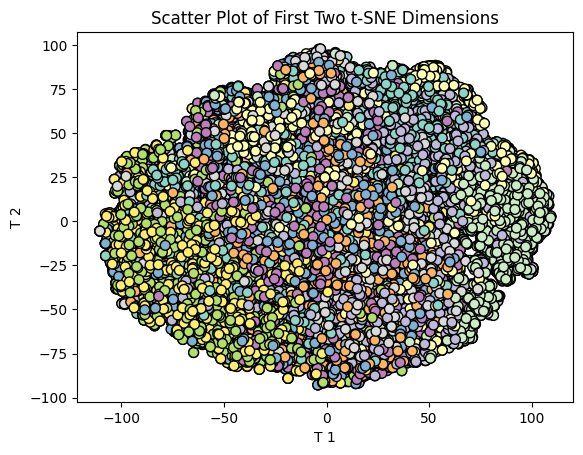

In [116]:
import matplotlib.pyplot as plt

# Assuming pca_2d is your DataFrame containing the first two principal components

plt.scatter(visualization_tsne_2d_df['T1'], visualization_tsne_2d_df['T2'], c= tsne_y, cmap='Set3', edgecolor='k', s=50)
plt.xlabel('T 1')
plt.ylabel('T 2')
plt.title('Scatter Plot of First Two t-SNE Dimensions')
plt.show()


In [117]:
print(tsne_x.shape)
print(tsne_y.shape)
tsne_2d_x_train = tsne_x_2d[0:45001 -1, :]
tsne_2d_x_test = tsne_x_2d[45001:-1, :]
tsne_2d_y_train = tsne_y[0:45001]
tsne_2d_y_test = tsne_y[45001:-1]

(50000, 13)
(50000,)


In [118]:
tsne_2d_x_train = tsne_x_2d[0:45000 :]
tsne_2d_x_test = tsne_x_2d[45000:, :]
tsne_2d_y_train = tsne_y[0:45000]
tsne_2d_y_test = tsne_y[45000:]
print(tsne_2d_x_train.shape)
print(tsne_2d_x_test.shape)
print(tsne_2d_y_train.shape)
print(tsne_2d_y_test.shape)

(45000, 2)
(5000, 2)
(45000,)
(5000,)


In [119]:
tsne_2d_x_train = torch.tensor(tsne_2d_x_train, dtype=torch.double)
tsne_2d_x_test = torch.tensor(tsne_2d_x_test, dtype=torch.double)
tsne_2d_y_train = torch.tensor(tsne_2d_y_train, dtype=torch.long)
tsne_2d_y_test = torch.tensor(tsne_2d_y_test, dtype=torch.long)




# Apply one-hot encoding to y_train and y_test
tsne_2d_y_train_one_hot = torch.nn.functional.one_hot(tsne_2d_y_train, num_classes=10)
tsne_2d_y_test_one_hot = torch.nn.functional.one_hot(tsne_2d_y_test, num_classes=10)

# Print shapes to verify
print("Shape of y_train_one_hot:", tsne_2d_y_train_one_hot.shape)
print("Shape of y_test_one_hot:", tsne_2d_y_test_one_hot.shape)






Shape of y_train_one_hot: torch.Size([45000, 10])
Shape of y_test_one_hot: torch.Size([5000, 10])


In [120]:
tsne_2d_y_test.shape


torch.Size([5000])

In [121]:
tsne_3d = TSNE(n_components= 3, perplexity= 50)
tsne_x_3d = tsne_3d.fit_transform(tsne_x)


In [122]:
visualization_tsne_3d_df = pd.DataFrame(tsne_x_3d, columns = ['T1', 'T2', 'T3'])
visualization_tsne_3d_df['labels'] = tsne_y

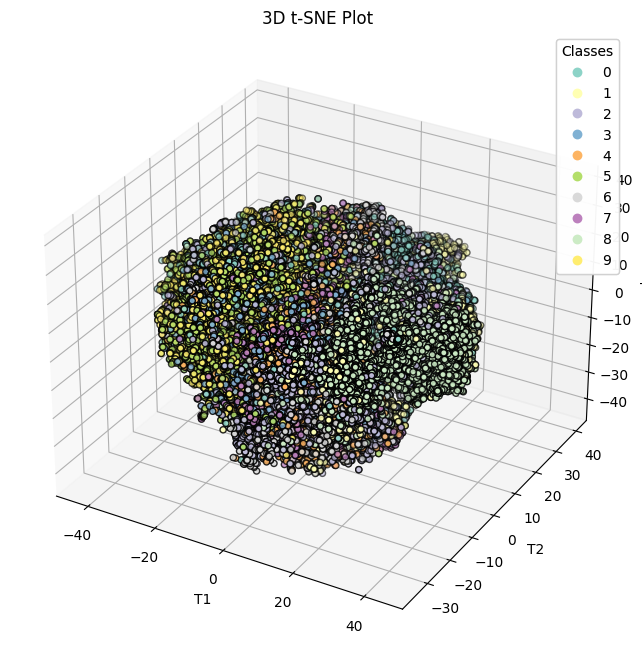

In [123]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(visualization_tsne_3d_df['T1'], visualization_tsne_3d_df['T2'], visualization_tsne_3d_df['T3'], c = tsne_y, cmap='Set3', edgecolor='k', s=20)

# Labeling the axes
ax.set_xlabel("T1")
ax.set_ylabel("T2")
ax.set_zlabel("T3")

# Legend
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.add_artist(legend)

plt.title('3D t-SNE Plot')
plt.show()


In [124]:
tsne_3d_x_train = tsne_x_3d[0:45000 :]
tsne_3d_x_test = tsne_x_3d[45000:, :]
tsne_3d_y_train = tsne_y[0:45000]
tsne_3d_y_test = tsne_y[45000:]
print(tsne_3d_x_train.shape)
print(tsne_3d_x_test.shape)
print(tsne_3d_y_train.shape)
print(tsne_3d_y_test.shape)

(45000, 3)
(5000, 3)
(45000,)
(5000,)


In [125]:
tsne_3d_x_train = torch.tensor(tsne_3d_x_train, dtype=torch.double)
tsne_3d_x_test = torch.tensor(tsne_3d_x_test, dtype=torch.double)
tsne_3d_y_train = torch.tensor(tsne_3d_y_train, dtype=torch.long)
tsne_3d_y_test = torch.tensor(tsne_3d_y_test, dtype=torch.long)




# Apply one-hot encoding to y_train and y_test
tsne_3d_y_train_one_hot = torch.nn.functional.one_hot(tsne_3d_y_train, num_classes=10)
tsne_3d_y_test_one_hot = torch.nn.functional.one_hot(tsne_3d_y_test, num_classes=10)

# Print shapes to verify
print("Shape of y_train_one_hot:", tsne_3d_y_train_one_hot.shape)
print("Shape of y_test_one_hot:", tsne_3d_y_test_one_hot.shape)






Shape of y_train_one_hot: torch.Size([45000, 10])
Shape of y_test_one_hot: torch.Size([5000, 10])


In [126]:
tsne_3d_y_test.shape


torch.Size([5000])

#Model Building and Validation

## All Features

In [127]:
import torch

x_train = torch.tensor(x_train.values, dtype=torch.double)
x_test = torch.tensor(x_test.values, dtype=torch.double)
y_train = torch.tensor(y_train.values, dtype=torch.long)  # Assuming y_train contains class labels (integers)
y_test = torch.tensor(y_test.values, dtype=torch.long)  # Assuming y_test contains class labels (integers)

# Apply one-hot encoding to y_train and y_test
y_train_one_hot = torch.nn.functional.one_hot(y_train, num_classes=10)
y_test_one_hot = torch.nn.functional.one_hot(y_test, num_classes=10)

# Print shapes to verify
print("Shape of y_train_one_hot:", y_train_one_hot.shape)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)





#converting the data into tensors

Shape of y_train_one_hot: torch.Size([45000, 10])
Shape of y_test_one_hot: torch.Size([5000, 10])


In [128]:
y_train.shape
y_train.unique()
y_test.shape
y_test.unique()
y_train.shape

#checking if the conversions were alright

torch.Size([45000])

In [129]:
#model with log softmax fixed, so it is not redundant and we only softmax before sending to roc_auroc
class AllFeatureClassifier(nn.Module):
  def __init__(self,activation):
    super().__init__()
    self.fc1 = nn.Linear(13, 20, dtype = torch.double)
    self.fc2 = nn.Linear(20, 15, dtype = torch.double)
    self.fc3 = nn.Linear(15,10, dtype = torch.double)
    if activation == 'relu':
      self.activation = nn.ReLU()
    elif activation == 'sigmoid':
      self.activation = nn.Sigmoid()
    elif activation == 'softmax':
      self.activation = nn.Softmax(dim = -1)
    else:
      self.activation = None

  def forward(self, x):
    x = self.fc1(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.fc2(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.fc3(x)
    #final_softmax = nn.Softmax(dim = 1)
    #x = final_softmax(x)
    return x


In [130]:
nn_classifier = AllFeatureClassifier('relu')
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = nn_classifier.parameters(), lr = 0.1)
print(nn_classifier)

AllFeatureClassifier(
  (fc1): Linear(in_features=13, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=15, bias=True)
  (fc3): Linear(in_features=15, out_features=10, bias=True)
  (activation): ReLU()
)


In [131]:
start_time = time.time()
epochs = 200
train_auroc = []
test_auroc = []
train_losses = []
test_losses = []
epoch_list = list(range(0,200))

for epoch in range(epochs):
  nn_classifier.train()
  y_pred_train = nn_classifier(x_train)
  loss = loss_fn(y_pred_train, y_train) #nn.CrossEntropy will apply softmax
  train_losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  y_pred_train_softmax = nn.Softmax(dim = 1)(y_pred_train) #need to softmax the pred tensors for sklearn AUROC
  y_pred_train_softmax = y_pred_train_softmax.detach().numpy()
  train_auc = roc_auc_score(y_train_one_hot,y_pred_train_softmax, average = 'macro', multi_class = 'ovr')
  train_auroc.append(train_auc)



  with torch.no_grad():
    nn_classifier.eval()
    y_pred_test = nn_classifier(x_test)
    test_loss = loss_fn(y_pred_test, y_test)
    test_losses.append(test_loss.item())
    y_pred_test_softmax = nn.Softmax(dim = 1)(y_pred_test) #need to softmax test_preds for sklearn AUROC
    y_pred_test_softmax = y_pred_test_softmax.detach().numpy()
    test_auc = roc_auc_score(y_test_one_hot,y_pred_test_softmax , average= 'macro' ,multi_class = 'ovr')
    test_auroc.append(test_auc)



    print(f'Epoch: {epoch} | Train Loss: {loss} | Test Loss : {test_loss} | Train AUC: {train_auc} | Test AUC {test_auc} |')

end_time = time.time()
print(f'Train time is {end_time - start_time}seconds.')

Epoch: 0 | Train Loss: 2.3583475548140744 | Test Loss : 2.293115881799253 | Train AUC: 0.46502675253772285 | Test AUC 0.6675138444444445 |
Epoch: 1 | Train Loss: 2.289000022390786 | Test Loss : 2.105424315897698 | Train AUC: 0.6721078312757202 | Test AUC 0.7061694444444444 |
Epoch: 2 | Train Loss: 2.0994033437717876 | Test Loss : 1.9676605364053528 | Train AUC: 0.7079725028806584 | Test AUC 0.7529169111111111 |
Epoch: 3 | Train Loss: 1.96787341220295 | Test Loss : 1.8609911668287724 | Train AUC: 0.7517543692729768 | Test AUC 0.7902157111111111 |
Epoch: 4 | Train Loss: 1.8603669345365461 | Test Loss : 1.7367970924043417 | Train AUC: 0.7899594510288066 | Test AUC 0.8239007111111111 |
Epoch: 5 | Train Loss: 1.7352468422750933 | Test Loss : 1.690794486022458 | Train AUC: 0.8238354167352538 | Test AUC 0.8393784666666667 |
Epoch: 6 | Train Loss: 1.6932789183790793 | Test Loss : 1.5882244260445795 | Train AUC: 0.8386629764060357 | Test AUC 0.8515340222222223 |
Epoch: 7 | Train Loss: 1.5859654

In [132]:
y_pred_test_softmax[0].sum()
#checking if softmax was applied properly

1.0

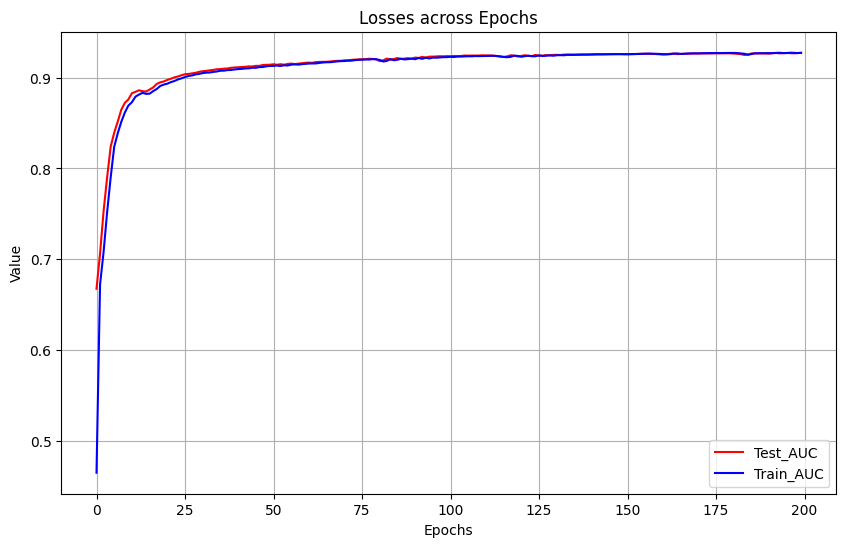

In [133]:

plt.figure(figsize=(10, 6))

# Plotting AUPRCs against epochs
plt.plot(epoch_list, test_auroc, label='Test_AUC', color ='red')

# Plotting losses against epochs
plt.plot(epoch_list, train_auroc, label='Train_AUC', color ='blue')





plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Losses across Epochs')
plt.legend()
plt.grid(True)
plt.show()



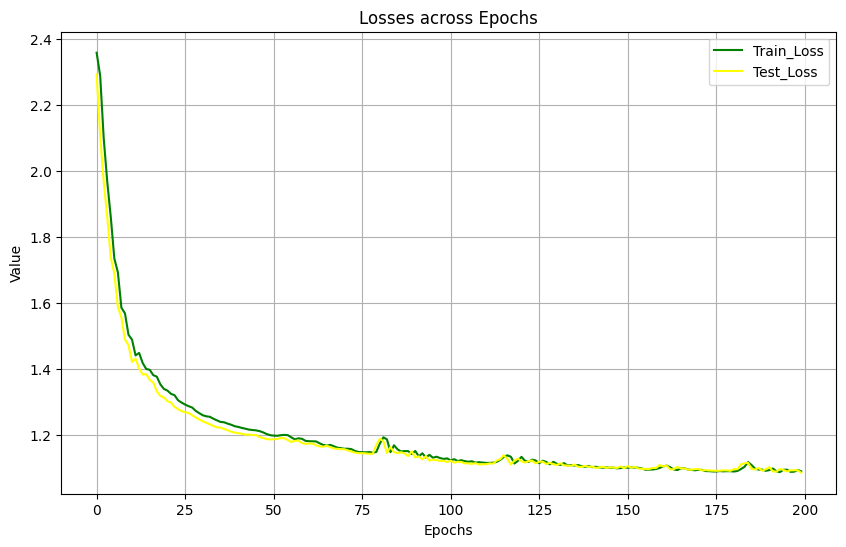

In [134]:

plt.figure(figsize=(10, 6))


plt.plot(epoch_list, train_losses, label='Train_Loss', color ='green')

plt.plot(epoch_list, test_losses, label='Test_Loss', color ='yellow')




plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Losses across Epochs')
plt.legend()
plt.grid(True)
plt.show()



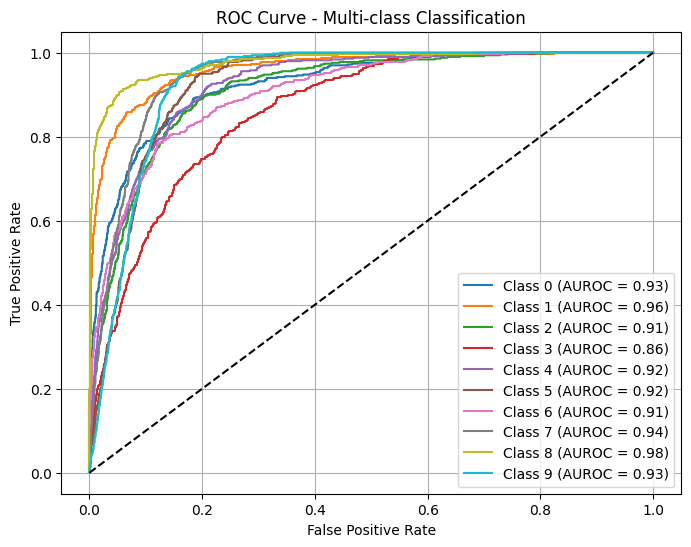

In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming y_test and y_pred_proba are defined with 10 columns per row

n_classes = 10  # Number of classes

# Initialize lists to store fpr and tpr for each class
fpr_list = []
tpr_list = []
roc_auc_list = []

# Compute ROC curve and AUROC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred_test_softmax[:, i])
    roc_auc = roc_auc_score(y_test_one_hot[:, i], y_pred_test_softmax[:, i])

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Class {i} (AUROC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


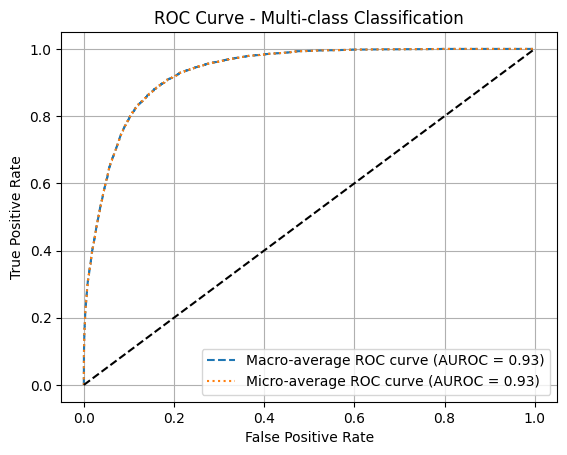

In [136]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming y_test and y_pred_proba are defined with 10 columns per row

n_classes = 10  # Number of classes

# Initialize lists to store fpr and tpr for each class

# Plot macro-average ROC curve
fpr_macro, tpr_macro, _ = roc_curve(y_test_one_hot.ravel(), y_pred_test_softmax.ravel())
roc_auc_macro = roc_auc_score(y_test_one_hot, y_pred_test_softmax, average='macro')
plt.plot(fpr_macro, tpr_macro, label=f'Macro-average ROC curve (AUROC = {roc_auc_macro:.2f})', linestyle='--')

# Compute micro-average ROC curve
fpr_micro, tpr_micro, _ = roc_curve(y_test_one_hot.ravel(), y_pred_test_softmax.ravel())
roc_auc_micro = roc_auc_score(y_test_one_hot, y_pred_test_softmax, average='micro')
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC curve (AUROC = {roc_auc_micro:.2f})', linestyle=':')

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [137]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming y_test_one_hot and y_pred_test_val are defined with 10 columns per row

# Compute macro-average ROC curve
fpr_macro, tpr_macro, thresholds_macro = roc_curve(y_test_one_hot.ravel(), y_pred_test_softmax.ravel())

# Find optimal threshold for macro-average ROC
optimal_idx_macro = np.argmax(tpr_macro - fpr_macro)
optimal_threshold_macro = thresholds_macro[optimal_idx_macro]

# Print optimal threshold for macro-average ROC
print(f'Optimal Threshold for Macro-average ROC: {optimal_threshold_macro:.2f}')


Optimal Threshold for Macro-average ROC: 0.11


In [138]:
y_test_check = y_test.detach().numpy()
y_pred_test_softmax[500].argmax()
y_test_check[500]

4

In [139]:
check = pd.DataFrame(y_test_check, [val.argmax() for val in y_pred_test_softmax])
check.reset_index(inplace = True)
check.columns = ['true', 'pred']
check

true  pred
0        5     1
1        7     7
2        8     8
3        9     5
4        1     1
...    ...   ...
4995     9     5
4996     7     7
4997     6     4
4998     1     1
4999     2     4

[5000 rows x 2 columns]

In [140]:
count = 0
for i, rows in check.iterrows():
  if rows[0] == rows[1]:
    count +=1

print(count/5000)

0.5634


In [141]:
y_train_check = y_train.detach().numpy()
check = pd.DataFrame(y_train_check, [val.argmax() for val in y_pred_train_softmax])
check.reset_index(inplace = True)
check.columns = ['true', 'pred']
check

true  pred
0         0     2
1         3     6
2         4     4
3         1     1
4         1     1
...     ...   ...
44995     7     3
44996     7     5
44997     9     9
44998     8     8
44999     2     4

[45000 rows x 2 columns]

In [142]:
count = 0
for i, rows in check.iterrows():
  if rows[0] == rows[1]:
    count +=1

print(count/45000)

0.5766


## PCA Model

In [143]:
pca_x_train.shape

torch.Size([45000, 4])

In [144]:
#model with log softmax fixed, so it is not redundant and we only softmax before sending to roc_auroc
class PCAClassifier(nn.Module):
  def __init__(self,activation):
    super().__init__()
    self.fc1 = nn.Linear(4, 25, dtype = torch.double)
    self.fc2 = nn.Linear(25, 15, dtype = torch.double)
    self.fc3 = nn.Linear(15,10, dtype = torch.double)
    if activation == 'relu':
      self.activation = nn.ReLU()
    elif activation == 'sigmoid':
      self.activation = nn.Sigmoid()
    elif activation == 'softmax':
      self.activation = nn.Softmax(dim = -1)
    else:
      self.activation = None

  def forward(self, x):
    x = self.fc1(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.fc2(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.fc3(x)
    #final_softmax = nn.Softmax(dim = 1)
    #x = final_softmax(x)
    return x


In [145]:
nn_pca_classifier = PCAClassifier('relu')
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = nn_pca_classifier.parameters(), lr = 0.1)
print(nn_pca_classifier)

PCAClassifier(
  (fc1): Linear(in_features=4, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=15, bias=True)
  (fc3): Linear(in_features=15, out_features=10, bias=True)
  (activation): ReLU()
)


In [146]:

epochs =100
train_auroc = []
test_auroc = []
train_losses = []
test_losses = []
epoch_list = list(range(0,epochs))

for epoch in range(epochs):
  nn_pca_classifier.train()
  y_pred_train = nn_pca_classifier(pca_x_train)
  loss = loss_fn(y_pred_train, pca_y_train)
  train_losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  pca_y_pred_train_softmax = nn.Softmax(dim = 1)(y_pred_train)
  pca_y_pred_train_softmax = pca_y_pred_train_softmax.detach().numpy()
  train_auc = roc_auc_score(pca_y_train_one_hot,pca_y_pred_train_softmax, average = 'macro', multi_class = 'ovr')
  train_auroc.append(train_auc)



  with torch.no_grad():
    nn_pca_classifier.eval()
    y_pred_test = nn_pca_classifier(pca_x_test)
    test_loss = loss_fn(y_pred_test, pca_y_test)
    test_losses.append(test_loss.item())
    pca_y_pred_test_softmax = nn.Softmax(dim = 1)(y_pred_test)
    pca_y_pred_test_softmax = pca_y_pred_test_softmax.detach().numpy()
    test_auc = roc_auc_score(pca_y_test_one_hot,pca_y_pred_test_softmax , average= 'macro' ,multi_class = 'ovr')
    test_auroc.append(test_auc)



    print(f'Epoch: {epoch} | Train Loss: {loss} | Test Loss : {test_loss} | Train AUC: {train_auc} | Test AUC {test_auc} |')


Epoch: 0 | Train Loss: 2.296550939485197 | Test Loss : 2.0794896289535436 | Train AUC: 0.5470030631001371 | Test AUC 0.7406383999999999 |
Epoch: 1 | Train Loss: 2.075538950308301 | Test Loss : 1.9041885771648177 | Train AUC: 0.74597272345679 | Test AUC 0.7817577111111111 |
Epoch: 2 | Train Loss: 1.8996374444440538 | Test Loss : 1.810377721815183 | Train AUC: 0.7836884825788752 | Test AUC 0.7988388888888889 |
Epoch: 3 | Train Loss: 1.7909832696804855 | Test Loss : 1.771240688265966 | Train AUC: 0.8028209563786008 | Test AUC 0.7927668222222222 |
Epoch: 4 | Train Loss: 1.7625794160908994 | Test Loss : 1.702446577167605 | Train AUC: 0.7964431185185183 | Test AUC 0.8121580444444444 |
Epoch: 5 | Train Loss: 1.6959708096188273 | Test Loss : 1.6929790520883012 | Train AUC: 0.8150112850480109 | Test AUC 0.8196907999999998 |
Epoch: 6 | Train Loss: 1.6814355449496496 | Test Loss : 1.6855472424970688 | Train AUC: 0.8216001377229081 | Test AUC 0.820702 |
Epoch: 7 | Train Loss: 1.6761829988090353 | 

In [147]:
pca_y_pred_test_softmax[0].sum()
#checking if softmax was applied properly

1.0000000000000002

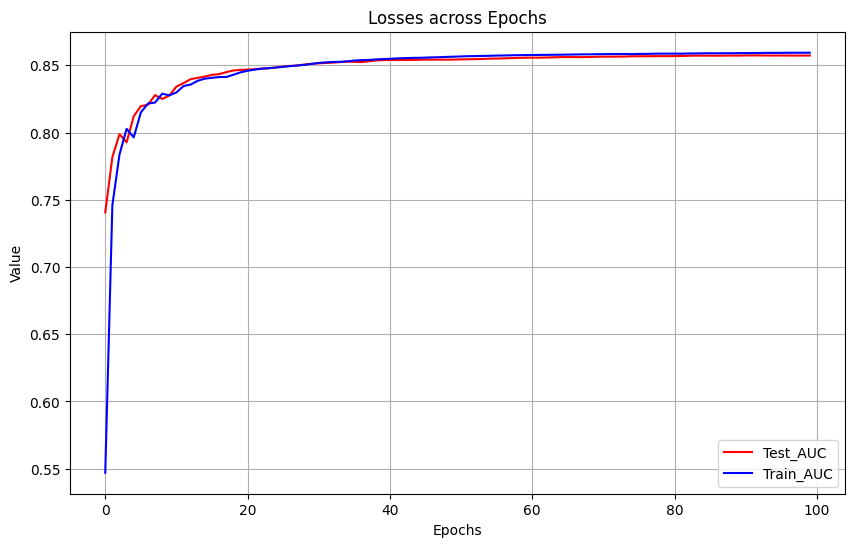

In [148]:

plt.figure(figsize=(10, 6))

# Plotting AUPRCs against epochs
plt.plot(epoch_list, test_auroc, label='Test_AUC', color ='red')

# Plotting losses against epochs
plt.plot(epoch_list, train_auroc, label='Train_AUC', color ='blue')





plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Losses across Epochs')
plt.legend()
plt.grid(True)
plt.show()



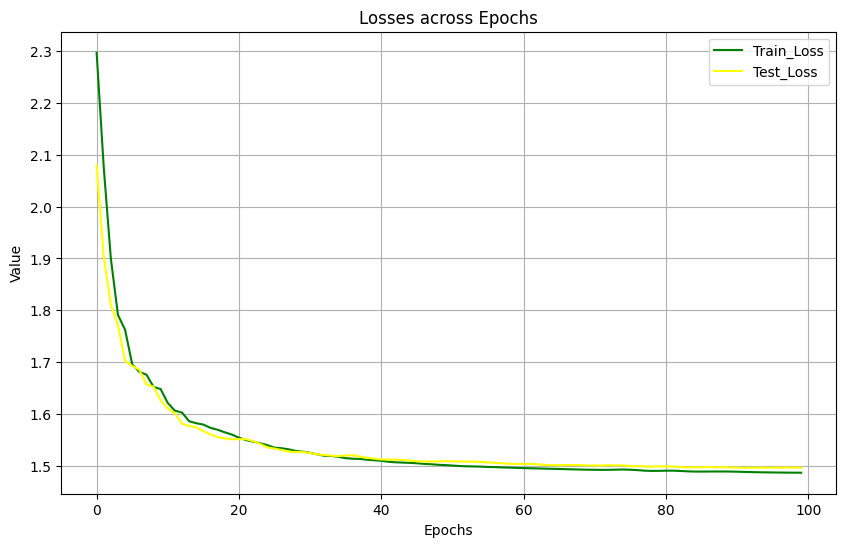

In [149]:

plt.figure(figsize=(10, 6))


plt.plot(epoch_list, train_losses, label='Train_Loss', color ='green')

plt.plot(epoch_list, test_losses, label='Test_Loss', color ='yellow')




plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Losses across Epochs')
plt.legend()
plt.grid(True)
plt.show()



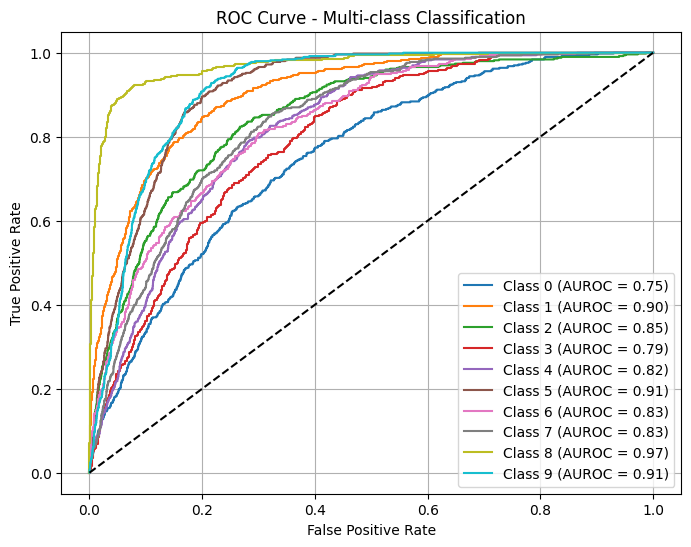

In [150]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming y_test and y_pred_proba are defined with 10 columns per row

n_classes = 10  # Number of classes

# Initialize lists to store fpr and tpr for each class
fpr_list = []
tpr_list = []
roc_auc_list = []

# Compute ROC curve and AUROC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(pca_y_test_one_hot[:, i], pca_y_pred_test_softmax[:, i])
    roc_auc = roc_auc_score(pca_y_test_one_hot[:, i], pca_y_pred_test_softmax[:, i])

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Class {i} (AUROC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


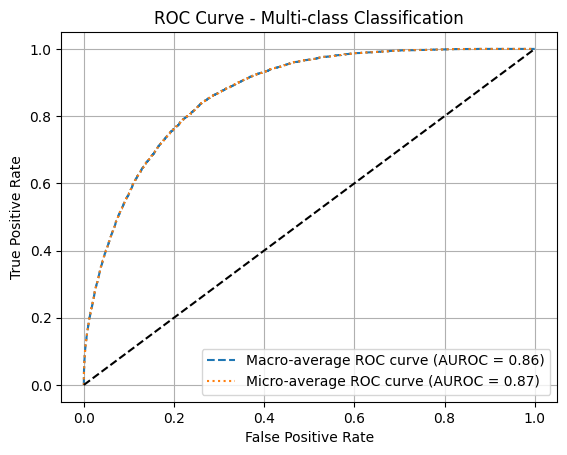

In [151]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming y_test and y_pred_proba are defined with 10 columns per row

n_classes = 10  # Number of classes

# Initialize lists to store fpr and tpr for each class

# Plot macro-average ROC curve
fpr_macro, tpr_macro, _ = roc_curve(pca_y_test_one_hot.ravel(), pca_y_pred_test_softmax.ravel())
roc_auc_macro = roc_auc_score(pca_y_test_one_hot, pca_y_pred_test_softmax, average='macro')
plt.plot(fpr_macro, tpr_macro, label=f'Macro-average ROC curve (AUROC = {roc_auc_macro:.2f})', linestyle='--')

# Compute micro-average ROC curve
fpr_micro, tpr_micro, _ = roc_curve(pca_y_test_one_hot.ravel(), pca_y_pred_test_softmax.ravel())
roc_auc_micro = roc_auc_score(pca_y_test_one_hot, pca_y_pred_test_softmax, average='micro')
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC curve (AUROC = {roc_auc_micro:.2f})', linestyle=':')

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [152]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming y_test_one_hot and y_pred_test_val are defined with 10 columns per row

# Compute macro-average ROC curve
fpr_macro, tpr_macro, thresholds_macro = roc_curve(pca_y_test_one_hot.ravel(), pca_y_pred_test_softmax.ravel())

# Find optimal threshold for macro-average ROC
optimal_idx_macro = np.argmax(tpr_macro - fpr_macro)
optimal_threshold_macro = thresholds_macro[optimal_idx_macro]

# Print optimal threshold for macro-average ROC
print(f'Optimal Threshold for Macro-average ROC: {optimal_threshold_macro:.2f}')


Optimal Threshold for Macro-average ROC: 0.10


In [153]:
pca_y_test_check = pca_y_test.detach().numpy()
pca_y_pred_test_softmax[500].argmax()
pca_y_test_check[500]

4

In [154]:
check = pd.DataFrame(pca_y_test_check, [val.argmax() for val in pca_y_pred_test_softmax])
check.reset_index(inplace = True)
check.columns = ['true', 'pred']
check

true  pred
0        5     1
1        3     7
2        8     8
3        5     5
4        8     1
...    ...   ...
4995     9     5
4996     7     7
4997     6     4
4998     1     1
4999     4     4

[5000 rows x 2 columns]

In [155]:
count = 0
for i, rows in check.iterrows():
  if rows[0] == rows[1]:
    count +=1

print(count/5000)

0.4206


In [156]:
pca_y_train_check = pca_y_train.detach().numpy()
pca_y_pred_train_softmax[500].argmax()
pca_y_train_check[500]

4

In [157]:
check = pd.DataFrame(pca_y_train_check, [val.argmax() for val in pca_y_pred_train_softmax])
check.reset_index(inplace = True)
check.columns = ['true', 'pred']
check

true  pred
0         4     2
1         0     6
2         0     4
3         1     1
4         1     1
...     ...   ...
44995     5     3
44996     7     5
44997     5     9
44998     1     8
44999     2     4

[45000 rows x 2 columns]

In [158]:
count = 0
for i, rows in check.iterrows():
  if rows[0] == rows[1]:
    count +=1

print(count/45000)

0.41962222222222223


In [159]:
#TO CHECK DEVIATIONS IN THE DATA

## LDA 3d Data - Epic Model

In [160]:
lda_x_train.shape


torch.Size([45000, 3])

In [161]:
#model with log softmax fixed, so it is not redundant and we only softmax before sending to roc_auroc
class LDAClassifier(nn.Module):
  def __init__(self,activation):
    super().__init__()
    self.fc1 = nn.Linear(3, 15, dtype = torch.double)
    self.fc2 = nn.Linear(15, 10, dtype = torch.double)
    #self.fc3 = nn.Linear(15,10, dtype = torch.double)
    if activation == 'relu':
      self.activation = nn.ReLU()
    elif activation == 'sigmoid':
      self.activation = nn.Sigmoid()
    elif activation == 'softmax':
      self.activation = nn.Softmax(dim = -1)
    else:
      self.activation = None

  def forward(self, x):
    x = self.fc1(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.fc2(x)
    #if self.activation != None:
      #x = self.activation(x)
    #x = self.fc3(x)
    #final_softmax = nn.Softmax(dim = 1)
    #x = final_softmax(x)
    return x


In [162]:
nn_lda_classifier = LDAClassifier('relu')
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = nn_lda_classifier.parameters(), lr = 0.5)
print(nn_lda_classifier)

LDAClassifier(
  (fc1): Linear(in_features=3, out_features=15, bias=True)
  (fc2): Linear(in_features=15, out_features=10, bias=True)
  (activation): ReLU()
)


In [163]:
start_time = time.time()
epochs = 150
train_auroc = []
test_auroc = []
train_losses = []
test_losses = []
epoch_list = list(range(0,epochs))

for epoch in range(epochs):
  nn_lda_classifier.train()
  y_pred_train = nn_lda_classifier(lda_x_train)
  loss = loss_fn(y_pred_train, lda_y_train)
  train_losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  lda_y_pred_train_softmax = nn.Softmax(dim = 1)(y_pred_train)
  lda_y_pred_train_softmax = lda_y_pred_train_softmax.detach().numpy()
  train_auc = roc_auc_score(lda_y_train_one_hot,lda_y_pred_train_softmax, average = 'macro', multi_class = 'ovr')
  train_auroc.append(train_auc)



  with torch.no_grad():
    nn_lda_classifier.eval()
    y_pred_test = nn_lda_classifier(lda_x_test)
    test_loss = loss_fn(y_pred_test, lda_y_test)
    test_losses.append(test_loss.item())
    lda_y_pred_test_softmax = nn.Softmax(dim = 1)(y_pred_test)
    lda_y_pred_test_softmax = lda_y_pred_test_softmax.detach().numpy()
    test_auc = roc_auc_score(lda_y_test_one_hot,lda_y_pred_test_softmax , average= 'macro' ,multi_class = 'ovr')
    test_auroc.append(test_auc)



    print(f'Epoch: {epoch} | Train Loss: {loss} | Test Loss : {test_loss} | Train AUC: {train_auc} | Test AUC {test_auc} |')

end_time = time.time()
print(f'Train Time for the NN with LDA Features is {end_time - start_time} seconds.')

Epoch: 0 | Train Loss: 2.3594545883967104 | Test Loss : 2.2846405503765252 | Train AUC: 0.46991680713305894 | Test AUC 0.7924164444444444 |
Epoch: 1 | Train Loss: 2.2649322244101806 | Test Loss : 2.599958744962514 | Train AUC: 0.7914478792866941 | Test AUC 0.7822615333333334 |
Epoch: 2 | Train Loss: 2.6273701702833834 | Test Loss : 2.2710564826178063 | Train AUC: 0.7786834323731139 | Test AUC 0.8019296222222222 |
Epoch: 3 | Train Loss: 2.265233158020786 | Test Loss : 2.0648224985036383 | Train AUC: 0.8029949196159121 | Test AUC 0.8033034666666665 |
Epoch: 4 | Train Loss: 2.0465026436274605 | Test Loss : 1.7872011476282226 | Train AUC: 0.8060342400548697 | Test AUC 0.834042488888889 |
Epoch: 5 | Train Loss: 1.7830464676264735 | Test Loss : 1.7550085728390687 | Train AUC: 0.8345968016460906 | Test AUC 0.8476368000000001 |
Epoch: 6 | Train Loss: 1.767862943790885 | Test Loss : 1.7094268013052403 | Train AUC: 0.8456227187928669 | Test AUC 0.8474649333333332 |
Epoch: 7 | Train Loss: 1.72080

In [164]:
lda_y_pred_test_softmax[0].sum()
#checking if softmax was applied properly

1.0

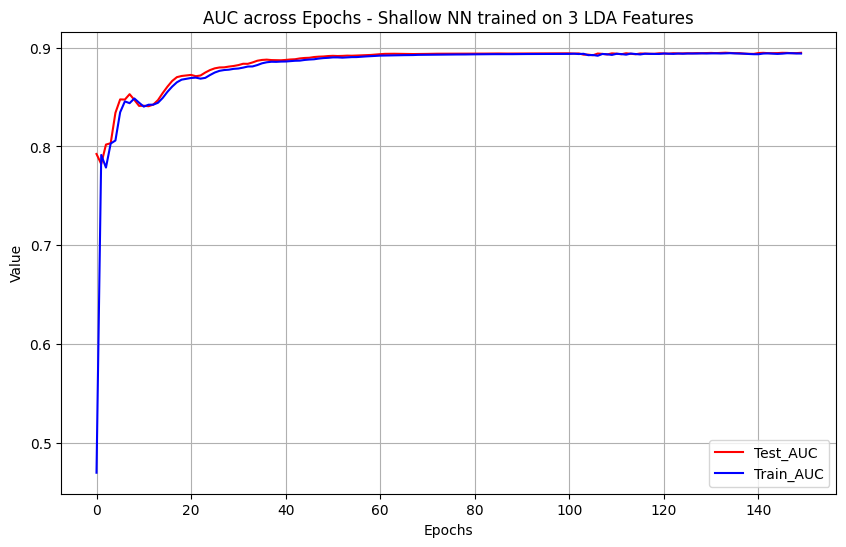

In [165]:

plt.figure(figsize=(10, 6))

# Plotting AUPRCs against epochs
plt.plot(epoch_list, test_auroc, label='Test_AUC', color ='red')

# Plotting losses against epochs
plt.plot(epoch_list, train_auroc, label='Train_AUC', color ='blue')





plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('AUC across Epochs - Shallow NN trained on 3 LDA Features')
plt.legend()
plt.grid(True)
plt.show()



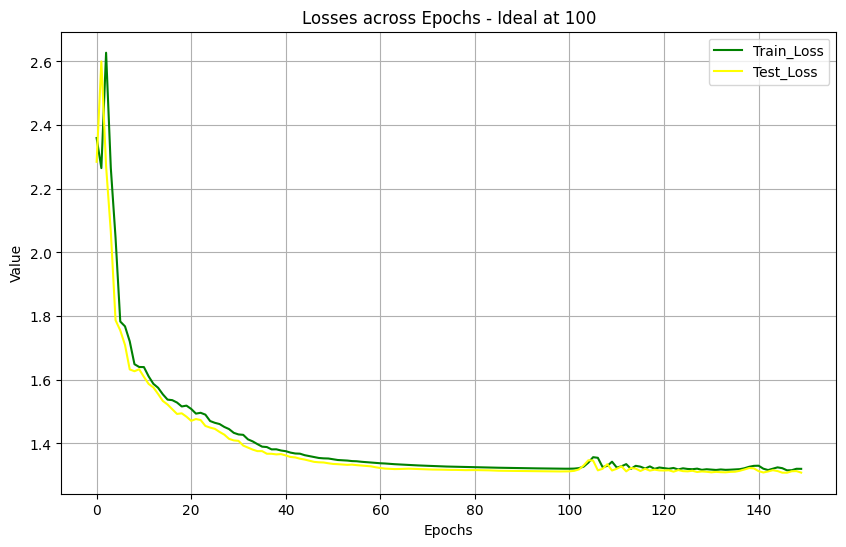

In [166]:

plt.figure(figsize=(10, 6))


plt.plot(epoch_list, train_losses, label='Train_Loss', color ='green')

plt.plot(epoch_list, test_losses, label='Test_Loss', color ='yellow')




plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title("Losses across Epochs - Ideal at 100")
plt.legend()
plt.grid(True)
plt.show()



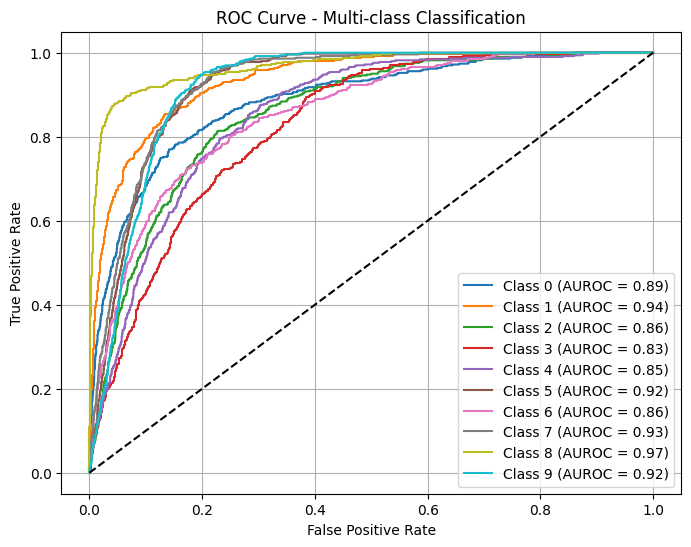

In [167]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming y_test and y_pred_proba are defined with 10 columns per row

n_classes = 10  # Number of classes

# Initialize lists to store fpr and tpr for each class
fpr_list = []
tpr_list = []
roc_auc_list = []

# Compute ROC curve and AUROC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(lda_y_test_one_hot[:, i], lda_y_pred_test_softmax[:, i])
    roc_auc = roc_auc_score(lda_y_test_one_hot[:, i], lda_y_pred_test_softmax[:, i])

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Class {i} (AUROC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


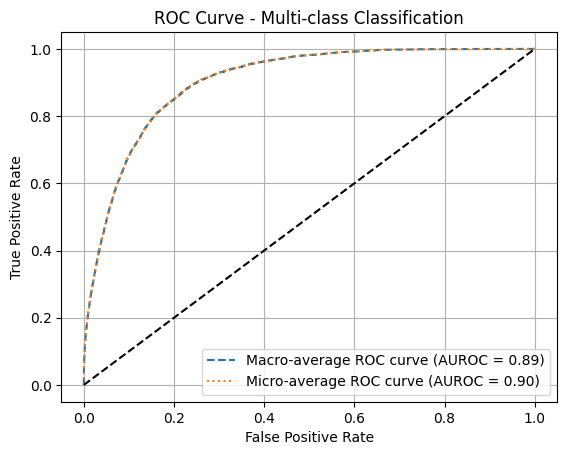

In [168]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming y_test and y_pred_proba are defined with 10 columns per row

n_classes = 10  # Number of classes

# Initialize lists to store fpr and tpr for each class

# Plot macro-average ROC curve
fpr_macro, tpr_macro, _ = roc_curve(lda_y_test_one_hot.ravel(), lda_y_pred_test_softmax.ravel())
roc_auc_macro = roc_auc_score(lda_y_test_one_hot, lda_y_pred_test_softmax, average='macro')
plt.plot(fpr_macro, tpr_macro, label=f'Macro-average ROC curve (AUROC = {roc_auc_macro:.2f})', linestyle='--')

# Compute micro-average ROC curve
fpr_micro, tpr_micro, _ = roc_curve(lda_y_test_one_hot.ravel(), lda_y_pred_test_softmax.ravel())
roc_auc_micro = roc_auc_score(lda_y_test_one_hot, lda_y_pred_test_softmax, average='micro')
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC curve (AUROC = {roc_auc_micro:.2f})', linestyle=':')

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [169]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming y_test_one_hot and y_pred_test_val are defined with 10 columns per row

# Compute macro-average ROC curve
fpr_macro, tpr_macro, thresholds_macro = roc_curve(lda_y_test_one_hot.ravel(), lda_y_pred_test_softmax.ravel())

# Find optimal threshold for macro-average ROC
optimal_idx_macro = np.argmax(tpr_macro - fpr_macro)
optimal_threshold_macro = thresholds_macro[optimal_idx_macro]

# Print optimal threshold for macro-average ROC
print(f'Optimal Threshold for Macro-average ROC: {optimal_threshold_macro:.2f}')


Optimal Threshold for Macro-average ROC: 0.09


In [170]:
lda_y_test_check= lda_y_test.detach().numpy()
lda_y_pred_test_softmax[500].argmax()
lda_y_test_check[500]

4

In [171]:

check = pd.DataFrame(lda_y_test_check, [val.argmax() for val in lda_y_pred_test_softmax])
check.reset_index(inplace = True)
check.columns = ['true', 'pred']
check

true  pred
0        5     1
1        7     7
2        8     8
3        5     5
4        1     1
...    ...   ...
4995     5     5
4996     7     7
4997     6     4
4998     1     1
4999     6     4

[5000 rows x 2 columns]

In [172]:


count = 0
for i, rows in check.iterrows():
  if rows[0] == rows[1]:
    count +=1

print(count/5000)

0.4886


In [173]:
lda_y_train_check = lda_y_train.detach().numpy()
lda_y_pred_train_softmax[500].argmax()
lda_y_train_check[200]
lda_y_train_check


array([2, 6, 4, ..., 9, 8, 4])

In [174]:
check = pd.DataFrame(zip(lda_y_train_check, [val.argmax() for val in lda_y_pred_train_softmax]))
check.reset_index(inplace = True, drop = True)

check



0  1
0      2  0
1      6  6
2      4  4
3      1  1
4      1  1
...   .. ..
44995  3  7
44996  5  7
44997  9  9
44998  8  8
44999  4  2

[45000 rows x 2 columns]

In [175]:
count = 0
for i, rows in check.iterrows():
  if rows[0] == rows[1]:
    count +=1

print(count/45000)

0.4920888888888889


## Ensembles for Benchmarking

In [176]:
lda_tree = RandomForestClassifier(n_estimators = 50)
lda_tree.fit(lda_x_train.detach().numpy(), lda_y_train.detach().numpy())


RandomForestClassifier(n_estimators=50)

In [177]:
lda_tree_test_y_pred = lda_tree.predict_proba(lda_x_test.detach().numpy())
lda_tree_train_y_pred = lda_tree.predict_proba(lda_x_train.detach().numpy())

In [178]:
macro_auroc_train = roc_auc_score(lda_y_train_one_hot.detach().numpy(), lda_tree_train_y_pred, average='macro', multi_class = 'ovr')
macro_auroc_test = roc_auc_score(lda_y_test_one_hot.detach().numpy(), lda_tree_test_y_pred, average='macro', multi_class = 'ovr')
macro_auroc_train


0.999375869410151

In [179]:
lda_ada_tree = AdaBoostClassifier(n_estimators = 50)
lda_ada_tree.fit(lda_x_train.detach().numpy(), lda_y_train.detach().numpy())

AdaBoostClassifier()

In [180]:
lda_ada_tree_test_y_pred = lda_ada_tree.predict_proba(lda_x_test.detach().numpy())
lda_ada_tree_train_y_pred = lda_ada_tree.predict_proba(lda_x_train.detach().numpy())

In [181]:
macro_auroc_train = roc_auc_score(lda_y_train.detach().numpy(), lda_ada_tree_train_y_pred, average='macro', multi_class = 'ovr')
macro_auroc_test = roc_auc_score(lda_y_test.detach().numpy(), lda_ada_tree_test_y_pred, average='macro', multi_class = 'ovr')



In [182]:
macro_auroc_train

0.7534645053497943

In [183]:
start_time = time.time()
lda_gradientboost_tree = GradientBoostingClassifier(n_estimators = 50)
lda_gradientboost_tree.fit(lda_x_train.detach().numpy(), lda_y_train.detach().numpy())
end_time = time.time()
print(f'Train Time for GradientBoostingClassifier is {end_time - start_time} seconds.')

Train Time for GradientBoostingClassifier is 32.627819299697876 seconds.


In [184]:
lda_gradientboost_tree_test_y_pred = lda_gradientboost_tree.predict_proba(lda_x_test.detach().numpy())
lda_gradientboost_tree_train_y_pred = lda_gradientboost_tree.predict_proba(lda_x_train.detach().numpy())

In [185]:
macro_auroc_train = roc_auc_score(lda_y_train.detach().numpy(), lda_gradientboost_tree_train_y_pred, average='macro', multi_class = 'ovr')
macro_auroc_test = roc_auc_score(lda_y_test.detach().numpy(), lda_gradientboost_tree_test_y_pred, average='macro', multi_class = 'ovr')

lda_gradientboost_tree.score(lda_x_test, lda_y_test.detach().numpy())

0.498

In [186]:
macro_auroc_test
macro_auroc_test

0.8974788444444444

## LDA 2D and 1D - To Test Feature Importance

In [187]:
#iteratively dropping features
#i even tried running the model with the best feature
lda_2d_x_train = lda_x_train[:, [0]]
lda_2d_x_test = lda_x_test[:, [0]]
print(lda_2d_x_train.shape)
print(lda_2d_x_test.shape)

torch.Size([45000, 1])
torch.Size([5000, 1])


In [188]:
#model with log softmax fixed, so it is not redundant and we only softmax before sending to roc_auroc
class LDA2DClassifier(nn.Module):
  def __init__(self,activation):
    super().__init__()
    self.fc1 = nn.Linear(1, 15, dtype = torch.double)
    self.fc2 = nn.Linear(15, 10, dtype = torch.double)
    #self.fc3 = nn.Linear(15,10, dtype = torch.double)
    if activation == 'relu':
      self.activation = nn.ReLU()
    elif activation == 'sigmoid':
      self.activation = nn.Sigmoid()
    elif activation == 'softmax':
      self.activation = nn.Softmax(dim = -1)
    else:
      self.activation = None

  def forward(self, x):
    x = self.fc1(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.fc2(x)
    #if self.activation != None:
      #x = self.activation(x)
    #x = self.fc3(x)
    #final_softmax = nn.Softmax(dim = 1)
    #x = final_softmax(x)
    return x


In [189]:
nn_lda_2d_classifier = LDA2DClassifier('relu')
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = nn_lda_2d_classifier.parameters(), lr = 0.1)
print(nn_lda_2d_classifier)

LDA2DClassifier(
  (fc1): Linear(in_features=1, out_features=15, bias=True)
  (fc2): Linear(in_features=15, out_features=10, bias=True)
  (activation): ReLU()
)


In [190]:
start_time = time.time()
epochs = 100
train_auroc = []
test_auroc = []
train_losses = []
test_losses = []
epoch_list = list(range(0,epochs))

for epoch in range(epochs):
  nn_lda_2d_classifier.train()
  y_pred_train = nn_lda_2d_classifier(lda_2d_x_train)
  loss = loss_fn(y_pred_train, lda_y_train)
  train_losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  lda_y_pred_train_softmax = nn.Softmax(dim = 1)(y_pred_train)
  lda_y_pred_train_softmax = lda_y_pred_train_softmax.detach().numpy()
  train_auc = roc_auc_score(lda_y_train_one_hot,lda_y_pred_train_softmax, average = 'macro', multi_class = 'ovr')
  train_auroc.append(train_auc)



  with torch.no_grad():
    nn_lda_2d_classifier.eval()
    y_pred_test = nn_lda_2d_classifier(lda_2d_x_test)
    test_loss = loss_fn(y_pred_test, lda_y_test)
    test_losses.append(test_loss.item())
    lda_y_pred_test_softmax = nn.Softmax(dim = 1)(y_pred_test)
    lda_y_pred_test_softmax = lda_y_pred_test_softmax.detach().numpy()
    test_auc = roc_auc_score(lda_y_test_one_hot,lda_y_pred_test_softmax , average= 'macro' ,multi_class = 'ovr')
    test_auroc.append(test_auc)



    print(f'Epoch: {epoch} | Train Loss: {loss} | Test Loss : {test_loss} | Train AUC: {train_auc} | Test AUC {test_auc} |')

end_time = time.time()
print(f'Train Time for the NN with LDA Features is {end_time - start_time} seconds.')

Epoch: 0 | Train Loss: 2.7513859033898855 | Test Loss : 2.141864913090315 | Train AUC: 0.39752145541838135 | Test AUC 0.7038509555555555 |
Epoch: 1 | Train Loss: 2.146858030624119 | Test Loss : 1.9152158859504882 | Train AUC: 0.7024776172839505 | Test AUC 0.8071488888888888 |
Epoch: 2 | Train Loss: 1.9236789146907667 | Test Loss : 1.8284982390115525 | Train AUC: 0.8051026238683129 | Test AUC 0.8134287555555554 |
Epoch: 3 | Train Loss: 1.8375239482447243 | Test Loss : 1.7906820531023342 | Train AUC: 0.8120666941015088 | Test AUC 0.8153001555555555 |
Epoch: 4 | Train Loss: 1.7988988763186278 | Test Loss : 1.7629223403942296 | Train AUC: 0.8143699871056242 | Test AUC 0.8108984666666667 |
Epoch: 5 | Train Loss: 1.7700745521758448 | Test Loss : 1.7306563861337654 | Train AUC: 0.8101660993141289 | Test AUC 0.8095811999999999 |
Epoch: 6 | Train Loss: 1.7383142187994012 | Test Loss : 1.6981720338306305 | Train AUC: 0.8088348219478737 | Test AUC 0.8154025111111111 |
Epoch: 7 | Train Loss: 1.707

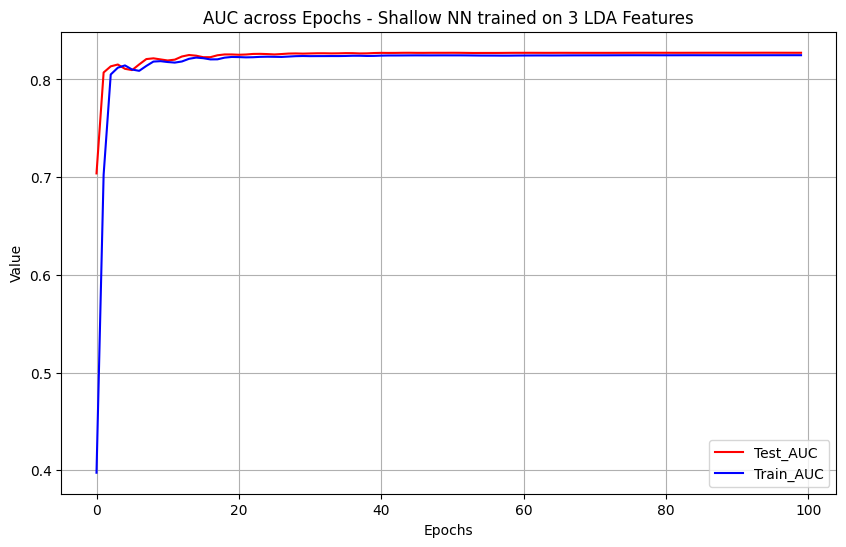

In [191]:

plt.figure(figsize=(10, 6))

# Plotting AUPRCs against epochs
plt.plot(epoch_list, test_auroc, label='Test_AUC', color ='red')

# Plotting losses against epochs
plt.plot(epoch_list, train_auroc, label='Train_AUC', color ='blue')





plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('AUC across Epochs - Shallow NN trained on 3 LDA Features')
plt.legend()
plt.grid(True)
plt.show()



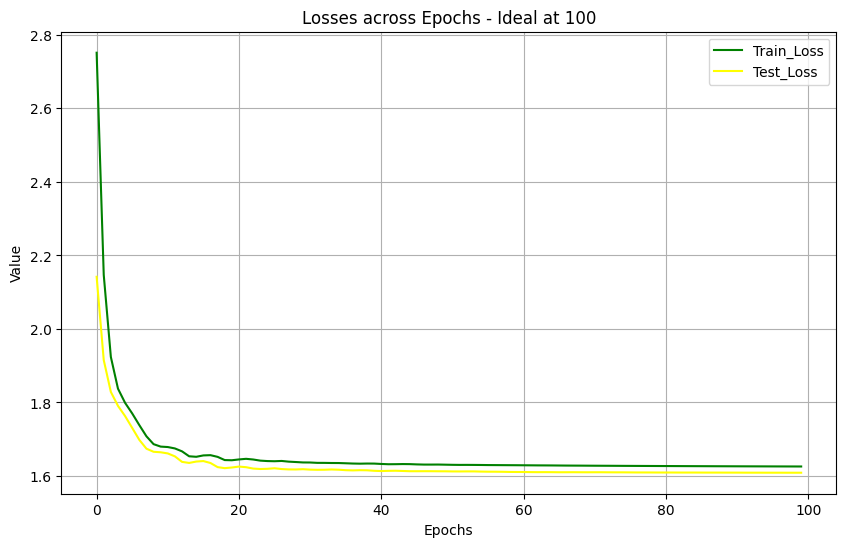

In [192]:

plt.figure(figsize=(10, 6))


plt.plot(epoch_list, train_losses, label='Train_Loss', color ='green')

plt.plot(epoch_list, test_losses, label='Test_Loss', color ='yellow')




plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title("Losses across Epochs - Ideal at 100")
plt.legend()
plt.grid(True)
plt.show()



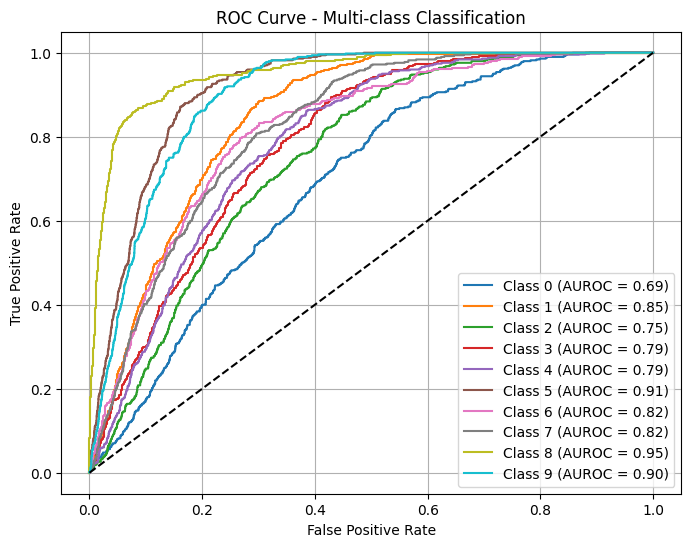

In [193]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming y_test and y_pred_proba are defined with 10 columns per row

n_classes = 10  # Number of classes

# Initialize lists to store fpr and tpr for each class
fpr_list = []
tpr_list = []
roc_auc_list = []

# Compute ROC curve and AUROC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(lda_y_test_one_hot[:, i], lda_y_pred_test_softmax[:, i])
    roc_auc = roc_auc_score(lda_y_test_one_hot[:, i], lda_y_pred_test_softmax[:, i])

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Class {i} (AUROC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


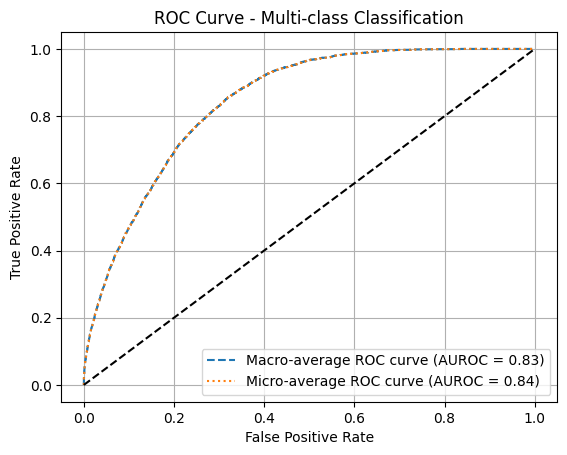

In [194]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming y_test and y_pred_proba are defined with 10 columns per row

n_classes = 10  # Number of classes

# Initialize lists to store fpr and tpr for each class

# Plot macro-average ROC curve
fpr_macro, tpr_macro, _ = roc_curve(lda_y_test_one_hot.ravel(), lda_y_pred_test_softmax.ravel())
roc_auc_macro = roc_auc_score(lda_y_test_one_hot, lda_y_pred_test_softmax, average='macro')
plt.plot(fpr_macro, tpr_macro, label=f'Macro-average ROC curve (AUROC = {roc_auc_macro:.2f})', linestyle='--')

# Compute micro-average ROC curve
fpr_micro, tpr_micro, _ = roc_curve(lda_y_test_one_hot.ravel(), lda_y_pred_test_softmax.ravel())
roc_auc_micro = roc_auc_score(lda_y_test_one_hot, lda_y_pred_test_softmax, average='micro')
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC curve (AUROC = {roc_auc_micro:.2f})', linestyle=':')

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [195]:
lda_y_test_check= lda_y_test.detach().numpy()
lda_y_pred_test_softmax[500].argmax()
lda_y_test_check[500]

check = pd.DataFrame(lda_y_test_check, [val.argmax() for val in lda_y_pred_test_softmax])
check.reset_index(inplace = True)
check.columns = ['true', 'pred']
check

count = 0
for i, rows in check.iterrows():
  if rows[0] == rows[1]:
    count +=1

print(count/5000)

0.3438


## TSNE 2d - Suboptimal

In [196]:
#model with log softmax fixed, so it is not redundant and we only softmax before sending to roc_auroc
class TSNE2DClassifier(nn.Module):
  def __init__(self,activation):
    super().__init__()
    self.fc1 = nn.Linear(2, 20, dtype = torch.double)
    self.fc2 = nn.Linear(20, 15, dtype = torch.double)
    self.fc3 = nn.Linear(15,10, dtype = torch.double)
    if activation == 'relu':
      self.activation = nn.ReLU()
    elif activation == 'sigmoid':
      self.activation = nn.Sigmoid()
    elif activation == 'softmax':
      self.activation = nn.Softmax(dim = -1)
    else:
      self.activation = None

  def forward(self, x):
    x = self.fc1(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.fc2(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.fc3(x)
    #final_softmax = nn.Softmax(dim = 1)
    #x = final_softmax(x)
    return x


In [197]:
tsne_2d_classifier = TSNE2DClassifier('relu')
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = tsne_2d_classifier.parameters(), lr = 0.0205)
print(tsne_2d_classifier)

TSNE2DClassifier(
  (fc1): Linear(in_features=2, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=15, bias=True)
  (fc3): Linear(in_features=15, out_features=10, bias=True)
  (activation): ReLU()
)


In [198]:

epochs = 150
train_auroc = []
test_auroc = []
train_losses = []
test_losses = []
epoch_list = list(range(0,epochs))

for epoch in range(epochs):
  tsne_2d_classifier.train()
  y_pred_train = tsne_2d_classifier(tsne_2d_x_train)
  loss = loss_fn(y_pred_train, tsne_2d_y_train)
  train_losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  tsne_2d_y_pred_train_softmax = nn.Softmax(dim = 1)(y_pred_train)
  tsne_2d_y_pred_train_softmax =  tsne_2d_y_pred_train_softmax.detach().numpy()
  train_auc = roc_auc_score(tsne_2d_y_train_one_hot,tsne_2d_y_pred_train_softmax, average = 'macro', multi_class = 'ovr')
  train_auroc.append(train_auc)



  with torch.no_grad():
    tsne_2d_classifier.eval()
    y_pred_test = tsne_2d_classifier(tsne_2d_x_test)
    test_loss = loss_fn(y_pred_test, tsne_2d_y_test)
    test_losses.append(test_loss.item())
    tsne_2d_y_pred_test_softmax = nn.Softmax(dim = 1)(y_pred_test)
    tsne_2d_y_pred_test_softmax = tsne_2d_y_pred_test_softmax.detach().numpy()
    test_auc = roc_auc_score(tsne_2d_y_test_one_hot,tsne_2d_y_pred_test_softmax , average= 'macro' ,multi_class = 'ovr')
    test_auroc.append(test_auc)



    print(f'Epoch: {epoch} | Train Loss: {loss} | Test Loss : {test_loss} | Train AUC: {train_auc} | Test AUC {test_auc} |')


#Does not work with less layers, has high bias. I tried 2 layers, they either had high variance or bias (depending on model), or sometimes even failed to converge.

#Goals with the Project - Prevent Data Leakage, Compact Models, High AUROC and High Generalization (Low Variance), Exploit Neural Networks

#Change neurons from 20-25 - there is a sweetspot based on input features

#I tuned every single model's hyperparameters by FOFO - the goal was to increase AUROC, while keeping the disparity between train and test loss low

Epoch: 0 | Train Loss: 7.548570108484463 | Test Loss : 3.9967982552849257 | Train AUC: 0.46536179533607686 | Test AUC 0.5675881333333332 |
Epoch: 1 | Train Loss: 3.94081545345833 | Test Loss : 3.0716979602479046 | Train AUC: 0.5666380386831276 | Test AUC 0.6453731111111112 |
Epoch: 2 | Train Loss: 3.010944982006338 | Test Loss : 2.7537778640566497 | Train AUC: 0.6437815766803842 | Test AUC 0.6727628444444443 |
Epoch: 3 | Train Loss: 2.7045298558695547 | Test Loss : 2.39133422596249 | Train AUC: 0.6733592139917696 | Test AUC 0.6828461777777777 |
Epoch: 4 | Train Loss: 2.362026383973362 | Test Loss : 2.184862350884051 | Train AUC: 0.6836668510288065 | Test AUC 0.6802716888888889 |
Epoch: 5 | Train Loss: 2.174626074431219 | Test Loss : 2.183565392257863 | Train AUC: 0.6783441300411522 | Test AUC 0.6716661555555554 |
Epoch: 6 | Train Loss: 2.180650146149369 | Test Loss : 2.1786946756861996 | Train AUC: 0.6710177736625514 | Test AUC 0.6660053333333333 |
Epoch: 7 | Train Loss: 2.176931731842

In [199]:
#THESE WILL OVERFIT SINCE THERE ARE SO LITTLE FEATURES - SO USE BIGGER MODELS

##TSNE 3d - 0.79 so the better model is the LDA. This has a tendency to overfit very fast in the training

In [200]:
#model with log softmax fixed, so it is not redundant and we only softmax before sending to roc_auroc
class TSNE3DClassifier(nn.Module):
  def __init__(self,activation):
    super().__init__()
    self.fc1 = nn.Linear(3, 20, dtype = torch.double)
    self.fc2 = nn.Linear(20, 15, dtype = torch.double)
    self.fc3 = nn.Linear(15,10, dtype = torch.double)
    if activation == 'relu':
      self.activation = nn.ReLU()
    elif activation == 'sigmoid':
      self.activation = nn.Sigmoid()
    elif activation == 'softmax':
      self.activation = nn.Softmax(dim = -1)
    else:
      self.activation = None

  def forward(self, x):
    x = self.fc1(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.fc2(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.fc3(x)
    #final_softmax = nn.Softmax(dim = 1)
    #x = final_softmax(x)
    return x


In [201]:
tsne_3d_classifier = TSNE3DClassifier('relu')
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = tsne_3d_classifier.parameters(), lr = 0.05)
print(tsne_3d_classifier)

TSNE3DClassifier(
  (fc1): Linear(in_features=3, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=15, bias=True)
  (fc3): Linear(in_features=15, out_features=10, bias=True)
  (activation): ReLU()
)


In [202]:

epochs = 150
train_auroc = []
test_auroc = []
train_losses = []
test_losses = []
epoch_list = list(range(0,epochs))

for epoch in range(epochs):
  tsne_3d_classifier.train()
  y_pred_train = tsne_3d_classifier(tsne_3d_x_train)
  loss = loss_fn(y_pred_train, tsne_3d_y_train)
  train_losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  tsne_3d_y_pred_train_softmax = nn.Softmax(dim = 1)(y_pred_train)
  tsne_3d_y_pred_train_softmax =  tsne_3d_y_pred_train_softmax.detach().numpy()
  train_auc = roc_auc_score(tsne_3d_y_train_one_hot,tsne_3d_y_pred_train_softmax, average = 'macro', multi_class = 'ovr')
  train_auroc.append(train_auc)



  with torch.no_grad():
    tsne_3d_classifier.eval()
    y_pred_test = tsne_3d_classifier(tsne_3d_x_test)
    test_loss = loss_fn(y_pred_test, tsne_3d_y_test)
    test_losses.append(test_loss.item())
    tsne_3d_y_pred_test_softmax = nn.Softmax(dim = 1)(y_pred_test)
    tsne_3d_y_pred_test_softmax = tsne_3d_y_pred_test_softmax.detach().numpy()
    test_auc = roc_auc_score(tsne_3d_y_test_one_hot,tsne_3d_y_pred_test_softmax , average= 'macro' ,multi_class = 'ovr')
    test_auroc.append(test_auc)



    print(f'Epoch: {epoch} | Train Loss: {loss} | Test Loss : {test_loss} | Train AUC: {train_auc} | Test AUC {test_auc} |')

    #Mess around w LR 0.01 and LR 0.1
    # RAN A 2 LAYER MODEL FOR THIS, AND IT OVERFIT VERY QUICKLY AND THE AUC WAS LOW - SO WE NEED MORE LAYERS FOR GENERALIZABILITY.
    #WE CAN SEE THIS OVERFITS QUICKLY - SO, THE NEED FOR 3 LAYERS IN NNS AND THE NEED FOR NEURONS - GENERALIZABILITY - TALK ABOUT THIS IN MODEL DESIGN


Epoch: 0 | Train Loss: 3.3255785634064083 | Test Loss : 2.6769964590489663 | Train AUC: 0.4438606839506173 | Test AUC 0.6002112000000002 |
Epoch: 1 | Train Loss: 2.6718385508611853 | Test Loss : 2.2903724977763726 | Train AUC: 0.6009702732510289 | Test AUC 0.6702655555555556 |
Epoch: 2 | Train Loss: 2.280594685021546 | Test Loss : 2.0842143655195797 | Train AUC: 0.6733518510288066 | Test AUC 0.7103925999999999 |
Epoch: 3 | Train Loss: 2.0732312052980904 | Test Loss : 2.031559841897973 | Train AUC: 0.7140010762688613 | Test AUC 0.7296992 |
Epoch: 4 | Train Loss: 2.0147671860265763 | Test Loss : 1.9969546147724235 | Train AUC: 0.7358603015089162 | Test AUC 0.7470447111111111 |
Epoch: 5 | Train Loss: 1.9775882566572205 | Test Loss : 1.977208073720047 | Train AUC: 0.7531380378600823 | Test AUC 0.7618956444444446 |
Epoch: 6 | Train Loss: 1.9562925202055006 | Test Loss : 1.9417621792543767 | Train AUC: 0.7675005160493826 | Test AUC 0.7645744888888888 |
Epoch: 7 | Train Loss: 1.92517717370883

In [203]:
tsne_3d_x_train

tensor([[-18.4459,  11.2467,   3.5347],
        [  1.3376,   0.8220,   3.9406],
        [  4.8506,  -8.5042,  14.4647],
        ...,
        [ -3.8746, -13.3039, -16.4661],
        [ 20.9541,  -5.6824,  22.1742],
        [ 16.3213, -15.6710, -15.4017]], dtype=torch.float64)

# Extra Credit - NLP to Vectorize Artist Names and Song Names and Engineer Features for the Classifier

## Word Features

In [204]:
import spacy
import string
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-3.0.0/en_core_web_lg-3.0.0.tar.gz
nlp = spacy.load('en_core_web_lg')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.7/778.7 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


/usr/local/lib/python3.10/dist-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


In [205]:
y_train

tensor([2, 6, 4,  ..., 9, 8, 4])

In [206]:


def preprocess(text):
    text = text.lower()  # convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    return text

words_train['artist_name'] = words_train['artist_name'].apply(preprocess)
words_train['track_name'] = words_train['track_name'].apply(preprocess)
words_test['artist_name'] = words_test['artist_name'].apply(preprocess)
words_test['track_name'] = words_test['track_name'].apply(preprocess)


In [207]:
def vectorize(text):
    return nlp(text).vector



words_train['artist_name'] = words_train['artist_name'].apply(vectorize)
words_train['track_name'] = words_train['track_name'].apply(vectorize)
words_test['artist_name'] = words_test['artist_name'].apply(vectorize)
words_test['track_name'] = words_test['track_name'].apply(vectorize)





In [208]:
# Assuming words_train and words_test are your dataframes
# Concatenate artist and track vectors into a single feature vector for both training and test sets
words_train['features'] = words_train.apply(lambda x: np.concatenate([x['artist_name'], x['track_name']]), axis=1)
words_test['features'] = words_test.apply(lambda x: np.concatenate([x['artist_name'], x['track_name']]), axis=1)


In [209]:
words_train['features']

12176    [0.042255007, -0.295605, 0.031845003, 0.051586...
34223    [0.19069001, -0.064531, 0.034905, -0.1026175, ...
23604    [-0.2438965, 0.1588245, 0.205935, -0.07926001,...
8566     [-0.170975, 0.032109, 0.37048, 0.12976, -0.223...
5299     [-0.15624, 0.62975, 0.034259, -0.13761, -0.132...
                               ...                        
18190    [-0.008522503, 0.09676028, -0.18999001, -0.034...
27636    [-0.61585, -0.2376, -0.34077, -0.25744, -0.286...
47250    [-0.064233, 0.64038, 0.17491, 0.20572, -0.0246...
44827    [-0.46617502, 0.306, 0.19903451, 0.331775, -0....
23053    [-0.64715004, 0.139976, -0.15440999, -0.200038...
Name: features, Length: 45000, dtype: object

In [210]:
# Prepare input and output for training


words_x_train = np.array(list(words_train['features']))
words_y_train = y_train # Adjust this if your target column is named differently

# Prepare input for testing
words_x_test = np.array(list(words_test['features']))
words_y_test = y_test # Adjust this if your target column is named differently

words_y_train_one_hot = y_train_one_hot
words_y_test_one_hot = y_test_one_hot

In [211]:
#standardizing the word features
nlp_scaler = StandardScaler()
words_x_train = nlp_scaler.fit_transform(words_x_train)
words_x_test = nlp_scaler.transform(words_x_test)


In [212]:
words_x_train.shape

(45000, 600)

In [213]:
words_x_train = torch.tensor(words_x_train, dtype = torch.double)
words_x_test = torch.tensor(words_x_test, dtype = torch.double)

words_x_train.shape

torch.Size([45000, 600])

In [214]:
#model with log softmax fixed, so it is not redundant and we only softmax before sending to roc_auroc
class NLPClassifier(nn.Module):
  def __init__(self,activation):
    super().__init__()
    self.fc1 = nn.Linear(600, 200, dtype = torch.double)
    self.fc2 = nn.Linear(200, 100, dtype = torch.double)
    self.fc3 = nn.Linear(100,50, dtype = torch.double)
    self.fc4 = nn.Linear(50, 25, dtype = torch.double)
    self.fc5 = nn.Linear(25, 10, dtype = torch.double)

    if activation == 'relu':
      self.activation = nn.ReLU()
    elif activation == 'sigmoid':
      self.activation = nn.Sigmoid()
    elif activation == 'softmax':
      self.activation = nn.Softmax(dim = -1)
    else:
      self.activation = None

  def forward(self, x):
    x = self.fc1(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.fc2(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.fc3(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.fc4(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.fc5(x)


    #final_softmax = nn.Softmax(dim = 1)
    #x = final_softmax(x)
    return x


In [215]:
nlp_classifier = NLPClassifier('relu')
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = nlp_classifier.parameters(), lr = 0.001)
print(nlp_classifier)

NLPClassifier(
  (fc1): Linear(in_features=600, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=25, bias=True)
  (fc5): Linear(in_features=25, out_features=10, bias=True)
  (activation): ReLU()
)


In [216]:
total_params = sum(p.numel() for p in nlp_classifier.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params}")


Total trainable parameters: 146885


In [217]:
start_time = time.time()
epochs = 40
train_auroc = []
test_auroc = []
train_losses = []
test_losses = []
epoch_list = list(range(0,epochs))

for epoch in range(epochs):
  nlp_classifier.train()
  y_pred_train = nlp_classifier(words_x_train)
  loss = loss_fn(y_pred_train, words_y_train)
  train_losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  words_y_pred_train_softmax = nn.Softmax(dim = 1)(y_pred_train)
  words_y_pred_train_softmax = words_y_pred_train_softmax.detach().numpy()
  train_auc = roc_auc_score(words_y_train_one_hot,words_y_pred_train_softmax, average = 'macro', multi_class = 'ovr')
  train_auroc.append(train_auc)



  with torch.no_grad():
    nlp_classifier.eval()
    y_pred_test = nlp_classifier(words_x_test)
    test_loss = loss_fn(y_pred_test, words_y_test)
    test_losses.append(test_loss.item())
    words_y_pred_test_softmax = nn.Softmax(dim = 1)(y_pred_test)
    words_y_pred_test_softmax = words_y_pred_test_softmax.detach().numpy()
    test_auc = roc_auc_score(words_y_test_one_hot,words_y_pred_test_softmax , average= 'macro' ,multi_class = 'ovr')
    test_auroc.append(test_auc)



    print(f'Epoch: {epoch} | Train Loss: {loss} | Test Loss : {test_loss} | Train AUC: {train_auc} | Test AUC {test_auc} |')

end_time = time.time()
print(f'Train Time for the NN with LDA Features is {end_time - start_time} seconds.')

Epoch: 0 | Train Loss: 2.3095698953933623 | Test Loss : 2.3024466552445864 | Train AUC: 0.4962182641975309 | Test AUC 0.6534707777777778 |
Epoch: 1 | Train Loss: 2.302313627785922 | Test Loss : 2.2955292561190124 | Train AUC: 0.6547133470507545 | Test AUC 0.7009602 |
Epoch: 2 | Train Loss: 2.295209158481619 | Test Loss : 2.2877349057219805 | Train AUC: 0.703968162962963 | Test AUC 0.7214232222222222 |
Epoch: 3 | Train Loss: 2.2873255707584472 | Test Loss : 2.278329855666775 | Train AUC: 0.7248747207133059 | Test AUC 0.7323647999999999 |
Epoch: 4 | Train Loss: 2.277862147535878 | Test Loss : 2.2669921615860784 | Train AUC: 0.7360204699588478 | Test AUC 0.7388150666666666 |
Epoch: 5 | Train Loss: 2.2664121622231033 | Test Loss : 2.2535375428386324 | Train AUC: 0.7426870021947873 | Test AUC 0.7428464888888888 |
Epoch: 6 | Train Loss: 2.252811754300002 | Test Loss : 2.2378425231187853 | Train AUC: 0.7467782098765432 | Test AUC 0.7460886 |
Epoch: 7 | Train Loss: 2.23698343833967 | Test Loss

In [218]:
words_y_pred_test_softmax[0].sum()

0.9999999999999999

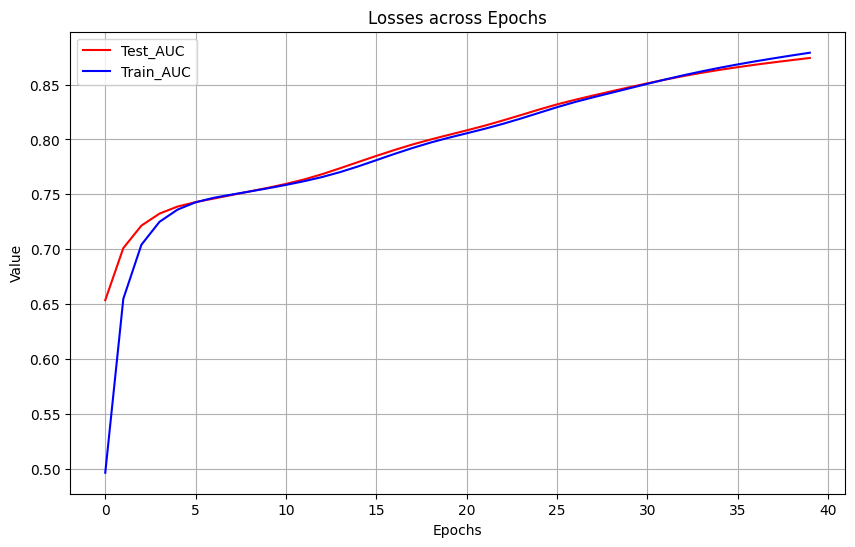

In [219]:

plt.figure(figsize=(10, 6))

# Plotting AUPRCs against epochs
plt.plot(epoch_list, test_auroc, label='Test_AUC', color ='red')

# Plotting losses against epochs
plt.plot(epoch_list, train_auroc, label='Train_AUC', color ='blue')





plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Losses across Epochs')
plt.legend()
plt.grid(True)
plt.show()



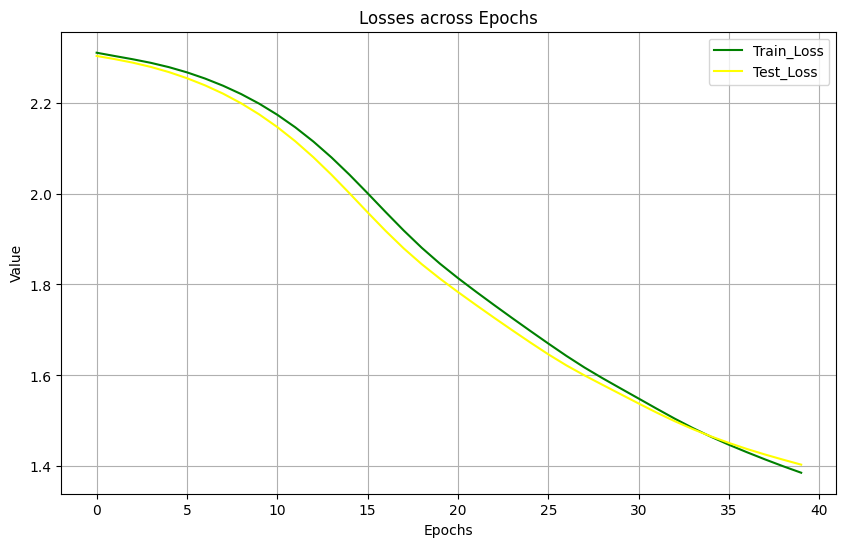

In [220]:

plt.figure(figsize=(10, 6))


plt.plot(epoch_list, train_losses, label='Train_Loss', color ='green')

plt.plot(epoch_list, test_losses, label='Test_Loss', color ='yellow')




plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Losses across Epochs')
plt.legend()
plt.grid(True)
plt.show()



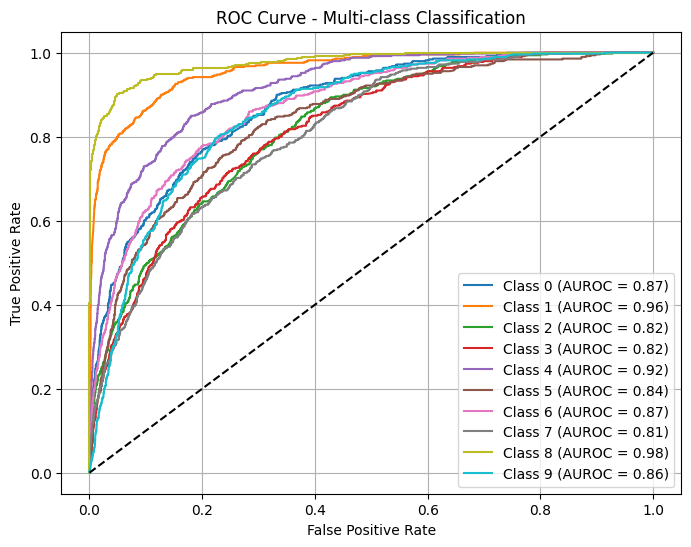

In [221]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming y_test and y_pred_proba are defined with 10 columns per row

n_classes = 10  # Number of classes

# Initialize lists to store fpr and tpr for each class
fpr_list = []
tpr_list = []
roc_auc_list = []

# Compute ROC curve and AUROC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(words_y_test_one_hot[:, i], words_y_pred_test_softmax[:, i])
    roc_auc = roc_auc_score(words_y_test_one_hot[:, i], words_y_pred_test_softmax[:, i])

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Class {i} (AUROC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


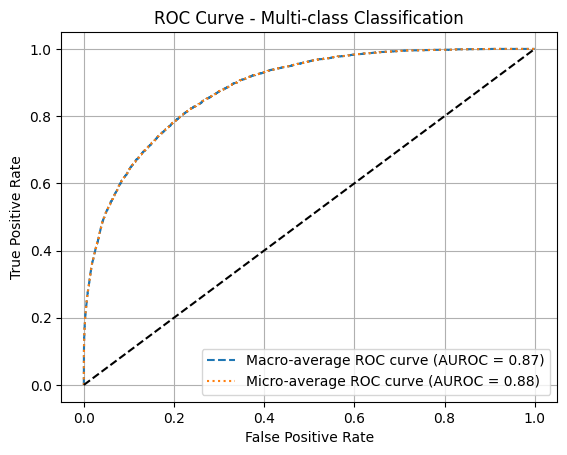

In [222]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming y_test and y_pred_proba are defined with 10 columns per row

n_classes = 10  # Number of classes

# Initialize lists to store fpr and tpr for each class

# Plot macro-average ROC curve
fpr_macro, tpr_macro, _ = roc_curve(words_y_test_one_hot.ravel(), words_y_pred_test_softmax.ravel())
roc_auc_macro = roc_auc_score(words_y_test_one_hot, words_y_pred_test_softmax, average='macro')
plt.plot(fpr_macro, tpr_macro, label=f'Macro-average ROC curve (AUROC = {roc_auc_macro:.2f})', linestyle='--')

# Compute micro-average ROC curve
fpr_micro, tpr_micro, _ = roc_curve(words_y_test_one_hot.ravel(), words_y_pred_test_softmax.ravel())
roc_auc_micro = roc_auc_score(words_y_test_one_hot, words_y_pred_test_softmax, average='micro')
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC curve (AUROC = {roc_auc_micro:.2f})', linestyle=':')

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [223]:
words_y_test_check= words_y_test.detach().numpy()
words_y_pred_test_softmax[500].argmax()


6

In [224]:
check = pd.DataFrame(words_y_test_check, [val.argmax() for val in words_y_pred_test_softmax])
check.reset_index(inplace = True)
check.columns = ['true', 'pred']
check

count = 0
for i, rows in check.iterrows():
  if rows[0] == rows[1]:
    count +=1

print(count/5000)

0.49


## Word Features + Original Features

In [225]:
nlp_master_x_train = torch.cat((words_x_train, x_train), dim = 1)
nlp_master_x_test = torch.cat((words_x_test, x_test), dim = 1)

In [226]:
print(nlp_master_x_train.shape)
print(nlp_master_x_test.shape)

torch.Size([45000, 613])
torch.Size([5000, 613])


In [227]:
#model with log softmax fixed, so it is not redundant and we only softmax before sending to roc_auroc
class NLPMasterClassifier(nn.Module):
  def __init__(self,activation):
    super().__init__()
    self.fc1 = nn.Linear(613, 200, dtype = torch.double)
    self.fc2 = nn.Linear(200, 100, dtype = torch.double)
    self.fc3 = nn.Linear(100, 50, dtype = torch.double)
    self.fc4 = nn.Linear(50, 25, dtype = torch.double) #Going to less features immediately
    self.fc5 = nn.Linear(25, 10, dtype = torch.double)

    if activation == 'relu':
      self.activation = nn.ReLU()
    elif activation == 'sigmoid':
      self.activation = nn.Sigmoid()
    elif activation == 'softmax':
      self.activation = nn.Softmax(dim = -1)
    else:
      self.activation = None

    self.dropout = nn.Dropout(p = 0.5)

  def forward(self, x):
    x = self.fc1(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.dropout(x)
    x = self.fc2(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.dropout(x)
    x = self.fc3(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.dropout(x)
    x = self.fc4(x)
    if self.activation != None:
      x = self.activation(x)
    x = self.dropout(x)
    x = self.fc5(x)


    #final_softmax = nn.Softmax(dim = 1)
    #x = final_softmax(x)
    return x


In [228]:
nlp_master_classifier = NLPMasterClassifier('relu')
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = nlp_master_classifier.parameters(), lr = 0.012)
print(nlp_master_classifier)

NLPMasterClassifier(
  (fc1): Linear(in_features=613, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=25, bias=True)
  (fc5): Linear(in_features=25, out_features=10, bias=True)
  (activation): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)


In [229]:
total_params = sum(p.numel() for p in nlp_master_classifier.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params}")


Total trainable parameters: 149485


In [230]:
start_time = time.time()
epochs = 90
train_auroc = []
test_auroc = []
train_losses = []
test_losses = []
epoch_list = list(range(0,epochs))

for epoch in range(epochs):
  nlp_master_classifier.train()
  y_pred_train = nlp_master_classifier(nlp_master_x_train)
  loss = loss_fn(y_pred_train, words_y_train)
  train_losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  master_words_y_pred_train_softmax = nn.Softmax(dim = 1)(y_pred_train)
  master_words_y_pred_train_softmax = master_words_y_pred_train_softmax.detach().numpy()
  train_auc = roc_auc_score(words_y_train_one_hot,master_words_y_pred_train_softmax, average = 'macro', multi_class = 'ovr')
  train_auroc.append(train_auc)



  with torch.no_grad():
    nlp_master_classifier.eval()
    y_pred_test = nlp_master_classifier(nlp_master_x_test)
    test_loss = loss_fn(y_pred_test, words_y_test)
    test_losses.append(test_loss.item())
    master_words_y_pred_test_softmax = nn.Softmax(dim = 1)(y_pred_test)
    master_words_y_pred_test_softmax = master_words_y_pred_test_softmax.detach().numpy()
    test_auc = roc_auc_score(words_y_test_one_hot,master_words_y_pred_test_softmax , average= 'macro' ,multi_class = 'ovr')
    test_auroc.append(test_auc)



    print(f'Epoch: {epoch} | Train Loss: {loss} | Test Loss : {test_loss} | Train AUC: {train_auc} | Test AUC {test_auc} |')

end_time = time.time()
print(f'Train Time for the NN with LDA Features is {end_time - start_time} seconds.')

Epoch: 0 | Train Loss: 2.3105314301701956 | Test Loss : 2.3006123808852568 | Train AUC: 0.4995160054869684 | Test AUC 0.6278050222222222 |
Epoch: 1 | Train Loss: 2.2996482671514644 | Test Loss : 2.2401204684644975 | Train AUC: 0.5356412175582991 | Test AUC 0.7288874666666667 |
Epoch: 2 | Train Loss: 2.254356528505815 | Test Loss : 2.0690609856982713 | Train AUC: 0.6099546688614541 | Test AUC 0.7602441555555556 |
Epoch: 3 | Train Loss: 2.156239500947379 | Test Loss : 1.905761431326413 | Train AUC: 0.665586343484225 | Test AUC 0.7792264444444444 |
Epoch: 4 | Train Loss: 2.0678317934603787 | Test Loss : 1.8314193099416443 | Train AUC: 0.6994232444444444 | Test AUC 0.8017228 |
Epoch: 5 | Train Loss: 1.9713910889334083 | Test Loss : 1.7616998088128855 | Train AUC: 0.7300633207133058 | Test AUC 0.8242667555555556 |
Epoch: 6 | Train Loss: 1.9217227497127767 | Test Loss : 1.7047451125341202 | Train AUC: 0.7572144587105624 | Test AUC 0.8377204 |
Epoch: 7 | Train Loss: 1.849813735488759 | Test L

In [231]:
master_words_y_pred_test_softmax[0].sum()

1.0000000000000002

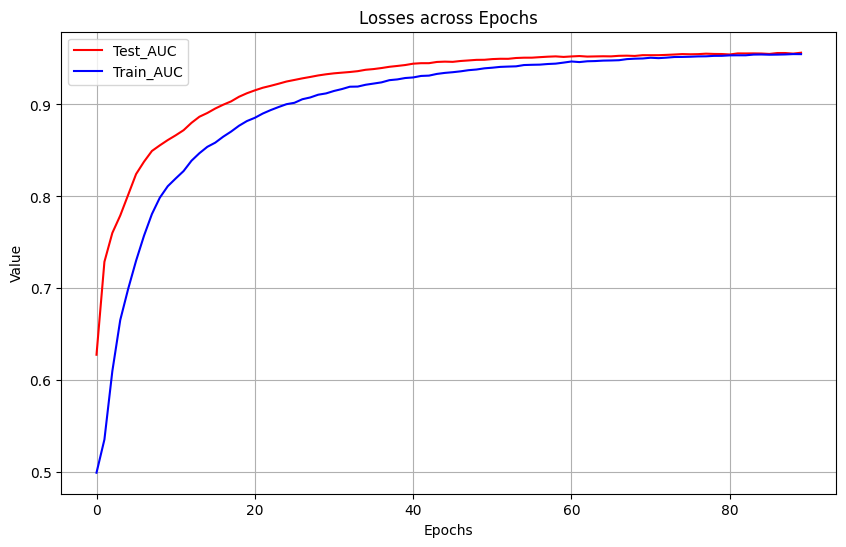

In [232]:

plt.figure(figsize=(10, 6))

# Plotting AUPRCs against epochs
plt.plot(epoch_list, test_auroc, label='Test_AUC', color ='red')

# Plotting losses against epochs
plt.plot(epoch_list, train_auroc, label='Train_AUC', color ='blue')





plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Losses across Epochs')
plt.legend()
plt.grid(True)
plt.show()



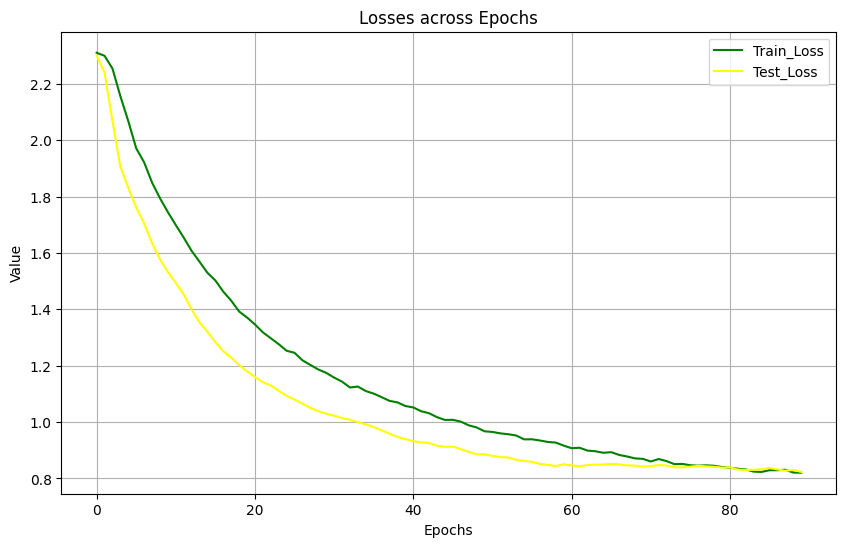

In [233]:

plt.figure(figsize=(10, 6))


plt.plot(epoch_list, train_losses, label='Train_Loss', color ='green')

plt.plot(epoch_list, test_losses, label='Test_Loss', color ='yellow')




plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Losses across Epochs')
plt.legend()
plt.grid(True)
plt.show()



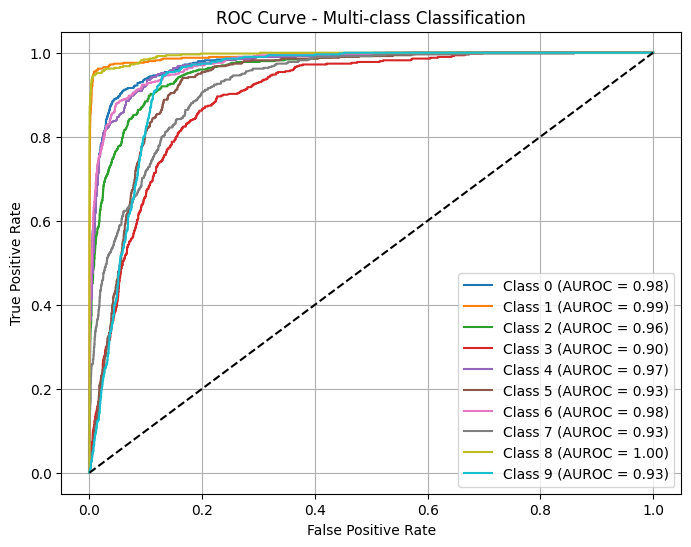

In [234]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming y_test and y_pred_proba are defined with 10 columns per row

n_classes = 10  # Number of classes

# Initialize lists to store fpr and tpr for each class
fpr_list = []
tpr_list = []
roc_auc_list = []

# Compute ROC curve and AUROC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(words_y_test_one_hot[:, i], master_words_y_pred_test_softmax[:, i])
    roc_auc = roc_auc_score(words_y_test_one_hot[:, i], master_words_y_pred_test_softmax[:, i])

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Class {i} (AUROC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


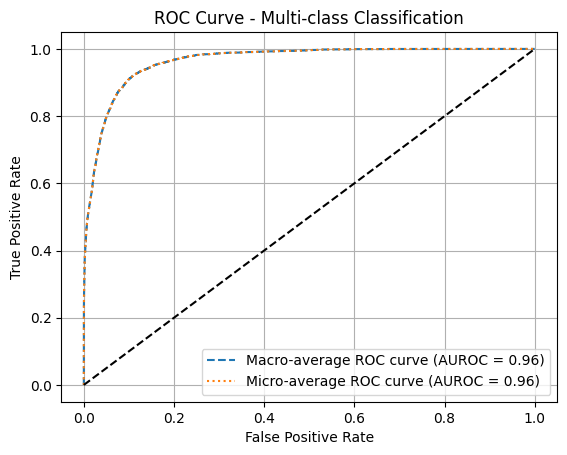

In [235]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming y_test and y_pred_proba are defined with 10 columns per row

n_classes = 10  # Number of classes

# Initialize lists to store fpr and tpr for each class

# Plot macro-average ROC curve
fpr_macro, tpr_macro, _ = roc_curve(words_y_test_one_hot.ravel(), master_words_y_pred_test_softmax.ravel())
roc_auc_macro = roc_auc_score(words_y_test_one_hot, master_words_y_pred_test_softmax, average='macro')
plt.plot(fpr_macro, tpr_macro, label=f'Macro-average ROC curve (AUROC = {roc_auc_macro:.2f})', linestyle='--')

# Compute micro-average ROC curve
fpr_micro, tpr_micro, _ = roc_curve(words_y_test_one_hot.ravel(), master_words_y_pred_test_softmax.ravel())
roc_auc_micro = roc_auc_score(words_y_test_one_hot, master_words_y_pred_test_softmax, average='micro')
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC curve (AUROC = {roc_auc_micro:.2f})', linestyle=':')

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [236]:
words_y_test_check= words_y_test.detach().numpy()
master_words_y_pred_test_softmax[500].argmax()


4

In [237]:
check = pd.DataFrame(words_y_test_check, [val.argmax() for val in master_words_y_pred_test_softmax])
check.reset_index(inplace = True)
check.columns = ['true', 'pred']
check

count = 0
for i, rows in check.iterrows():
  if rows[0] == rows[1]:
    count +=1

print(count/5000)

0.6896
